# <span style="color:green">Brazil Cases</span>

### source: https://covid.saude.gov.br/

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# import plotly.graph_objects as go
# import plotly.express as px

# import tensorflow as tf
# from tensorflow import keras

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error

# import seaborn as seabornInstance 
# from sklearn.model_selection import train_test_split 
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn import metrics

plt.rcParams.update({'font.size': 16})

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
dfMS = pd.read_csv('HIST_PAINEL_COVIDBR_17ago2020.csv', low_memory=False)
dfMS['data'] = pd.to_datetime(dfMS['data'], dayfirst=True)

In [4]:
dfMS = dfMS.loc[:,['data','estado','municipio','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos']]
# dfMS = dfMS.loc[:,['data','estado','municipio','casosNovos','obitosNovos']]
dfMS = dfMS.sort_values(by=['estado','municipio'], ascending=True)
dfMS = dfMS.dropna()
dfMS

data estado   municipio  casosAcumulado  casosNovos  \
12532 2020-03-27     AC  Acrelândia               0           0   
12533 2020-03-28     AC  Acrelândia               0           0   
12534 2020-03-29     AC  Acrelândia               2           2   
12535 2020-03-30     AC  Acrelândia               6           4   
12536 2020-03-31     AC  Acrelândia               7           1   
...          ...    ...         ...             ...         ...   
70127 2020-08-13     TO     Xambioá             602           1   
70128 2020-08-14     TO     Xambioá             608           6   
70129 2020-08-15     TO     Xambioá             611           3   
70130 2020-08-16     TO     Xambioá             611           0   
70131 2020-08-17     TO     Xambioá             611           0   

       obitosAcumulado  obitosNovos  
12532                0            0  
12533                0            0  
12534                0            0  
12535                0            0  
12536                0            0  
...                ...          ...  
70127                8            0  
70128                8            0  
70129                8            0  
70130                8            0  
70131                8            0  

[799056 rows x 7 columns]

In [5]:
listCity = dfMS['municipio'].astype(str).unique()
listCity

array(['Acrelândia', 'Assis Brasil', 'Brasiléia', ..., 'Tupiratins',
       'Wanderlândia', 'Xambioá'], dtype=object)

In [6]:
listState = dfMS['estado'].astype(str).unique()
listState

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [7]:
dfToday = dfMS[dfMS['data'] == dfMS['data'].max()]
dfToday

data estado     municipio  casosAcumulado  casosNovos  \
12675 2020-08-17     AC    Acrelândia             378           5   
12819 2020-08-17     AC  Assis Brasil             439           1   
12963 2020-08-17     AC     Brasiléia             942           6   
13107 2020-08-17     AC        Bujari             352           0   
13251 2020-08-17     AC      Capixaba             239           0   
...          ...    ...           ...             ...         ...   
69411 2020-08-17     TO    Tocantínia             312           0   
69699 2020-08-17     TO      Tupirama              45           0   
69843 2020-08-17     TO    Tupiratins               7           0   
69987 2020-08-17     TO  Wanderlândia             212          12   
70131 2020-08-17     TO       Xambioá             611           0   

       obitosAcumulado  obitosNovos  
12675                8            0  
12819                9            0  
12963               14            0  
13107                6            0  
13251                7            0  
...                ...          ...  
69411                4            0  
69699                1            0  
69843                0            0  
69987                5            0  
70131                8            0  

[5549 rows x 7 columns]

In [8]:
# dEstado = {}
# for index in range(len(listState)):
#     dEstado[index] = dfMS[dfMS['estado'] == listState[index]]
#     dEstado[index] = dEstado[index].dropna()
#     dEstado[index].reset_index(drop=True, inplace=True)

In [9]:
# testMun = []
# dMunicipio = []
# for index in range(len(listState)):
#     testMun = dEstado[index]['municipio'].astype(str).unique()
#     dMunicipio.append(testMun)

### Coleta dos dados por municipio de cada estado

In [10]:
testMun = []
dMunicipio = []
dEstado = {}

dTest = {}

for index in range(len(listState)):
    
    dEstado[index] = dfMS[dfMS['estado'] == listState[index]]
    dEstado[index] = dEstado[index].dropna()
    dEstado[index].reset_index(drop=True, inplace=True)
    
    testMun = dEstado[index]['municipio'].astype(str).unique()
    dMunicipio.append(testMun)

    for jindex in range(len(dMunicipio[index])):
        dTest[jindex] = dfMS[dfMS['municipio'] == testMun[jindex]]
        dTest[jindex] = dTest[jindex].dropna()
        dTest[jindex].reset_index(drop=True, inplace=True)
        print(dTest[jindex])

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     AC  Acrelândia               0           0   
1   2020-03-28     AC  Acrelândia               0           0   
2   2020-03-29     AC  Acrelândia               2           2   
3   2020-03-30     AC  Acrelândia               6           4   
4   2020-03-31     AC  Acrelândia               7           1   
..         ...    ...         ...             ...         ...   
139 2020-08-13     AC  Acrelândia             363          31   
140 2020-08-14     AC  Acrelândia             371           8   
141 2020-08-15     AC  Acrelândia             373           2   
142 2020-08-16     AC  Acrelândia             373           0   
143 2020-08-17     AC  Acrelândia             378           5   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     AC    Jordão               0           0                0   
1   2020-03-28     AC    Jordão               0           0                0   
2   2020-03-29     AC    Jordão               0           0                0   
3   2020-03-30     AC    Jordão               0           0                0   
4   2020-03-31     AC    Jordão               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     AC    Jordão             112           8                1   
140 2020-08-14     AC    Jordão             115           3                1   
141 2020-08-15     AC    Jordão             115           0                1   
142 2020-08-16     AC    Jordão             115           0                1   
143 2020-08-17     AC    Jordão             115           0                1   

     obitosNovos  
0              0  
1

          data estado            municipio  casosAcumulado  casosNovos  \
0   2020-03-27     AC  Santa Rosa do Purus               0           0   
1   2020-03-28     AC  Santa Rosa do Purus               0           0   
2   2020-03-29     AC  Santa Rosa do Purus               0           0   
3   2020-03-30     AC  Santa Rosa do Purus               0           0   
4   2020-03-31     AC  Santa Rosa do Purus               0           0   
..         ...    ...                  ...             ...         ...   
139 2020-08-13     AC  Santa Rosa do Purus             196           1   
140 2020-08-14     AC  Santa Rosa do Purus             196           0   
141 2020-08-15     AC  Santa Rosa do Purus             199           3   
142 2020-08-16     AC  Santa Rosa do Purus             199           0   
143 2020-08-17     AC  Santa Rosa do Purus             199           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     AL   Atalaia               0           0                0   
1   2020-03-28     AL   Atalaia               0           0                0   
2   2020-03-29     AL   Atalaia               0           0                0   
3   2020-03-30     AL   Atalaia               0           0                0   
4   2020-03-31     AL   Atalaia               0           0                0   
..         ...    ...       ...             ...         ...              ...   
283 2020-08-13     PR   Atalaia              54           1                1   
284 2020-08-14     PR   Atalaia              56           2                1   
285 2020-08-15     PR   Atalaia              56           0                1   
286 2020-08-16     PR   Atalaia              57           1                1   
287 2020-08-17     PR   Atalaia              58           1                1   

     obitosNovos  
0              0  
1

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     AL  Cacimbinhas               0           0   
1   2020-03-28     AL  Cacimbinhas               0           0   
2   2020-03-29     AL  Cacimbinhas               0           0   
3   2020-03-30     AL  Cacimbinhas               0           0   
4   2020-03-31     AL  Cacimbinhas               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     AL  Cacimbinhas             195          21   
140 2020-08-14     AL  Cacimbinhas             195           0   
141 2020-08-15     AL  Cacimbinhas             215          20   
142 2020-08-16     AL  Cacimbinhas             215           0   
143 2020-08-17     AL  Cacimbinhas             215           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     AL  Chã Preta               0           0                0   
1   2020-03-28     AL  Chã Preta               0           0                0   
2   2020-03-29     AL  Chã Preta               0           0                0   
3   2020-03-30     AL  Chã Preta               0           0                0   
4   2020-03-31     AL  Chã Preta               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     AL  Chã Preta              33           0                0   
140 2020-08-14     AL  Chã Preta              33           0                0   
141 2020-08-15     AL  Chã Preta              33           0                0   
142 2020-08-16     AL  Chã Preta              34           1                0   
143 2020-08-17     AL  Chã Preta              34           0                0   

     obitosNovos  
0       

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     AL  Feliz Deserto               0           0   
1   2020-03-28     AL  Feliz Deserto               0           0   
2   2020-03-29     AL  Feliz Deserto               0           0   
3   2020-03-30     AL  Feliz Deserto               0           0   
4   2020-03-31     AL  Feliz Deserto               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     AL  Feliz Deserto              66           1   
140 2020-08-14     AL  Feliz Deserto              70           4   
141 2020-08-15     AL  Feliz Deserto              70           0   
142 2020-08-16     AL  Feliz Deserto              70           0   
143 2020-08-17     AL  Feliz Deserto              70           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     AL  Japaratinga               0           0   
1   2020-03-28     AL  Japaratinga               0           0   
2   2020-03-29     AL  Japaratinga               0           0   
3   2020-03-30     AL  Japaratinga               0           0   
4   2020-03-31     AL  Japaratinga               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     AL  Japaratinga             140           3   
140 2020-08-14     AL  Japaratinga             142           2   
141 2020-08-15     AL  Japaratinga             142           0   
142 2020-08-16     AL  Japaratinga             142           0   
143 2020-08-17     AL  Japaratinga             142           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     AL  Major Isidoro               0           0   
1   2020-03-28     AL  Major Isidoro               0           0   
2   2020-03-29     AL  Major Isidoro               0           0   
3   2020-03-30     AL  Major Isidoro               0           0   
4   2020-03-31     AL  Major Isidoro               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     AL  Major Isidoro             329          11   
140 2020-08-14     AL  Major Isidoro             329           0   
141 2020-08-15     AL  Major Isidoro             330           1   
142 2020-08-16     AL  Major Isidoro             330           0   
143 2020-08-17     AL  Major Isidoro             330           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     AL   Messias               0           0                0   
1   2020-03-28     AL   Messias               0           0                0   
2   2020-03-29     AL   Messias               0           0                0   
3   2020-03-30     AL   Messias               0           0                0   
4   2020-03-31     AL   Messias               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     AL   Messias             468           7               12   
140 2020-08-14     AL   Messias             473           5               12   
141 2020-08-15     AL   Messias             474           1               14   
142 2020-08-16     AL   Messias             475           1               14   
143 2020-08-17     AL   Messias             475           0               14   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     AL  Olivença               0           0                0   
1   2020-03-28     AL  Olivença               0           0                0   
2   2020-03-29     AL  Olivença               0           0                0   
3   2020-03-30     AL  Olivença               0           0                0   
4   2020-03-31     AL  Olivença               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     AL  Olivença             116           1                2   
140 2020-08-14     AL  Olivença             116           0                2   
141 2020-08-15     AL  Olivença             116           0                2   
142 2020-08-16     AL  Olivença             117           1                2   
143 2020-08-17     AL  Olivença             118           1                2   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     AL    Penedo               0           0                0   
1   2020-03-28     AL    Penedo               0           0                0   
2   2020-03-29     AL    Penedo               0           0                0   
3   2020-03-30     AL    Penedo               0           0                0   
4   2020-03-31     AL    Penedo               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     AL    Penedo             859          41               12   
140 2020-08-14     AL    Penedo             867           8               12   
141 2020-08-15     AL    Penedo             885          18               12   
142 2020-08-16     AL    Penedo             913          28               12   
143 2020-08-17     AL    Penedo             944          31               12   

     obitosNovos  
0              0  
1

          data estado             municipio  casosAcumulado  casosNovos  \
0   2020-03-27     AL  Poço das Trincheiras               0           0   
1   2020-03-28     AL  Poço das Trincheiras               0           0   
2   2020-03-29     AL  Poço das Trincheiras               0           0   
3   2020-03-30     AL  Poço das Trincheiras               0           0   
4   2020-03-31     AL  Poço das Trincheiras               0           0   
..         ...    ...                   ...             ...         ...   
139 2020-08-13     AL  Poço das Trincheiras              45           3   
140 2020-08-14     AL  Poço das Trincheiras              48           3   
141 2020-08-15     AL  Poço das Trincheiras              48           0   
142 2020-08-16     AL  Poço das Trincheiras              51           3   
143 2020-08-17     AL  Poço das Trincheiras              51           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0       

          data estado             municipio  casosAcumulado  casosNovos  \
0   2020-03-27     AL  Senador Rui Palmeira               0           0   
1   2020-03-28     AL  Senador Rui Palmeira               0           0   
2   2020-03-29     AL  Senador Rui Palmeira               0           0   
3   2020-03-30     AL  Senador Rui Palmeira               0           0   
4   2020-03-31     AL  Senador Rui Palmeira               0           0   
..         ...    ...                   ...             ...         ...   
139 2020-08-13     AL  Senador Rui Palmeira              65           0   
140 2020-08-14     AL  Senador Rui Palmeira              65           0   
141 2020-08-15     AL  Senador Rui Palmeira              66           1   
142 2020-08-16     AL  Senador Rui Palmeira              66           0   
143 2020-08-17     AL  Senador Rui Palmeira              66           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0       

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     AL  Taquarana               0           0                0   
1   2020-03-28     AL  Taquarana               0           0                0   
2   2020-03-29     AL  Taquarana               0           0                0   
3   2020-03-30     AL  Taquarana               0           0                0   
4   2020-03-31     AL  Taquarana               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     AL  Taquarana             232           3                3   
140 2020-08-14     AL  Taquarana             232           0                3   
141 2020-08-15     AL  Taquarana             232           0                3   
142 2020-08-16     AL  Taquarana             232           0                3   
143 2020-08-17     AL  Taquarana             233           1                3   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     AM     Anori               0           0                0   
1   2020-03-28     AM     Anori               0           0                0   
2   2020-03-29     AM     Anori               1           1                0   
3   2020-03-30     AM     Anori               1           0                0   
4   2020-03-31     AM     Anori               1           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     AM     Anori             715           0               11   
140 2020-08-14     AM     Anori             715           0               11   
141 2020-08-15     AM     Anori             724           9               11   
142 2020-08-16     AM     Anori             724           0               11   
143 2020-08-17     AM     Anori             724           0               11   

     obitosNovos  
0              0  
1

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     AM  Boca do Acre               0           0   
1   2020-03-28     AM  Boca do Acre               1           1   
2   2020-03-29     AM  Boca do Acre               1           0   
3   2020-03-30     AM  Boca do Acre               1           0   
4   2020-03-31     AM  Boca do Acre               1           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     AM  Boca do Acre             988          11   
140 2020-08-14     AM  Boca do Acre            1001          13   
141 2020-08-15     AM  Boca do Acre            1009           8   
142 2020-08-16     AM  Boca do Acre            1023          14   
143 2020-08-17     AM  Boca do Acre            1023           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     AM    Envira               0           0                0   
1   2020-03-28     AM    Envira               0           0                0   
2   2020-03-29     AM    Envira               0           0                0   
3   2020-03-30     AM    Envira               0           0                0   
4   2020-03-31     AM    Envira               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     AM    Envira             122           3                1   
140 2020-08-14     AM    Envira             125           3                1   
141 2020-08-15     AM    Envira             125           0                1   
142 2020-08-16     AM    Envira             129           4                1   
143 2020-08-17     AM    Envira             129           0                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     AM     Juruá               0           0                0   
1   2020-03-28     AM     Juruá               0           0                0   
2   2020-03-29     AM     Juruá               0           0                0   
3   2020-03-30     AM     Juruá               0           0                0   
4   2020-03-31     AM     Juruá               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     AM     Juruá             473          11                7   
140 2020-08-14     AM     Juruá             473           0                7   
141 2020-08-15     AM     Juruá             473           0                7   
142 2020-08-16     AM     Juruá             473           0                7   
143 2020-08-17     AM     Juruá             473           0                7   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     AM     Maués               0           0                0   
1   2020-03-28     AM     Maués               0           0                0   
2   2020-03-29     AM     Maués               0           0                0   
3   2020-03-30     AM     Maués               0           0                0   
4   2020-03-31     AM     Maués               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     AM     Maués            1233           0               33   
140 2020-08-14     AM     Maués            1233           0               33   
141 2020-08-15     AM     Maués            1233           0               33   
142 2020-08-16     AM     Maués            1263          30               33   
143 2020-08-17     AM     Maués            1268           5               33   

     obitosNovos  
0              0  
1

          data estado             municipio  casosAcumulado  casosNovos  \
0   2020-03-27     AM  Santo Antônio do Içá               0           0   
1   2020-03-28     AM  Santo Antônio do Içá               1           1   
2   2020-03-29     AM  Santo Antônio do Içá               1           0   
3   2020-03-30     AM  Santo Antônio do Içá               1           0   
4   2020-03-31     AM  Santo Antônio do Içá               1           0   
..         ...    ...                   ...             ...         ...   
139 2020-08-13     AM  Santo Antônio do Içá            1151           1   
140 2020-08-14     AM  Santo Antônio do Içá            1161          10   
141 2020-08-15     AM  Santo Antônio do Içá            1161           0   
142 2020-08-16     AM  Santo Antônio do Içá            1163           2   
143 2020-08-17     AM  Santo Antônio do Içá            1163           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     AM   Urucará               0           0                0   
1   2020-03-28     AM   Urucará               0           0                0   
2   2020-03-29     AM   Urucará               0           0                0   
3   2020-03-30     AM   Urucará               0           0                0   
4   2020-03-31     AM   Urucará               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     AM   Urucará             527           6                6   
140 2020-08-14     AM   Urucará             532           5                6   
141 2020-08-15     AM   Urucará             535           3                6   
142 2020-08-16     AM   Urucará             535           0                6   
143 2020-08-17     AM   Urucará             539           4                6   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     AP    Macapá               0           0                0   
1   2020-03-28     AP    Macapá               4           4                0   
2   2020-03-29     AP    Macapá               4           0                0   
3   2020-03-30     AP    Macapá               8           4                0   
4   2020-03-31     AP    Macapá              10           2                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     AP    Macapá           16044          48              409   
140 2020-08-14     AP    Macapá           16122          78              412   
141 2020-08-15     AP    Macapá           16159          37              413   
142 2020-08-16     AP    Macapá           16188          29              413   
143 2020-08-17     AP    Macapá           16229          41              416   

     obitosNovos  
0              0  
1

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     AP  Vitória do Jari               0           0   
1   2020-03-28     AP  Vitória do Jari               0           0   
2   2020-03-29     AP  Vitória do Jari               0           0   
3   2020-03-30     AP  Vitória do Jari               0           0   
4   2020-03-31     AP  Vitória do Jari               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     AP  Vitória do Jari            1702          24   
140 2020-08-14     AP  Vitória do Jari            1720          18   
141 2020-08-15     AP  Vitória do Jari            1720           0   
142 2020-08-16     AP  Vitória do Jari            1720           0   
143 2020-08-17     AP  Vitória do Jari            1762          42   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA  Alcobaça               0           0                0   
1   2020-03-28     BA  Alcobaça               0           0                0   
2   2020-03-29     BA  Alcobaça               0           0                0   
3   2020-03-30     BA  Alcobaça               0           0                0   
4   2020-03-31     BA  Alcobaça               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA  Alcobaça             341           4                3   
140 2020-08-14     BA  Alcobaça             341           0                3   
141 2020-08-15     BA  Alcobaça             346           5                3   
142 2020-08-16     BA  Alcobaça             348           2                3   
143 2020-08-17     BA  Alcobaça             348           0                4   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA   Anguera               0           0                0   
1   2020-03-28     BA   Anguera               0           0                0   
2   2020-03-29     BA   Anguera               0           0                0   
3   2020-03-30     BA   Anguera               0           0                0   
4   2020-03-31     BA   Anguera               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA   Anguera              52           0                0   
140 2020-08-14     BA   Anguera              52           0                0   
141 2020-08-15     BA   Anguera              53           1                0   
142 2020-08-16     BA   Anguera              53           0                0   
143 2020-08-17     BA   Anguera              53           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA    Araçás               0           0                0   
1   2020-03-28     BA    Araçás               0           0                0   
2   2020-03-29     BA    Araçás               0           0                0   
3   2020-03-30     BA    Araçás               0           0                0   
4   2020-03-31     BA    Araçás               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA    Araçás              68           3                1   
140 2020-08-14     BA    Araçás              81          13                1   
141 2020-08-15     BA    Araçás              81           0                1   
142 2020-08-16     BA    Araçás              81           0                1   
143 2020-08-17     BA    Araçás              83           2                1   

     obitosNovos  
0              0  
1

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Barra do Mendes               0           0   
1   2020-03-28     BA  Barra do Mendes               0           0   
2   2020-03-29     BA  Barra do Mendes               0           0   
3   2020-03-30     BA  Barra do Mendes               0           0   
4   2020-03-31     BA  Barra do Mendes               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     BA  Barra do Mendes               8           0   
140 2020-08-14     BA  Barra do Mendes               8           0   
141 2020-08-15     BA  Barra do Mendes               9           1   
142 2020-08-16     BA  Barra do Mendes              10           1   
143 2020-08-17     BA  Barra do Mendes              10           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA  Boa Nova               0           0                0   
1   2020-03-28     BA  Boa Nova               0           0                0   
2   2020-03-29     BA  Boa Nova               0           0                0   
3   2020-03-30     BA  Boa Nova               0           0                0   
4   2020-03-31     BA  Boa Nova               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA  Boa Nova              53           0                2   
140 2020-08-14     BA  Boa Nova              61           8                2   
141 2020-08-15     BA  Boa Nova              62           1                2   
142 2020-08-16     BA  Boa Nova              63           1                2   
143 2020-08-17     BA  Boa Nova              63           0                2   

     obitosNovos  
0              0  
1

          data estado           municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Brotas de Macaúbas               0           0   
1   2020-03-28     BA  Brotas de Macaúbas               0           0   
2   2020-03-29     BA  Brotas de Macaúbas               0           0   
3   2020-03-30     BA  Brotas de Macaúbas               0           0   
4   2020-03-31     BA  Brotas de Macaúbas               0           0   
..         ...    ...                 ...             ...         ...   
139 2020-08-13     BA  Brotas de Macaúbas               1           1   
140 2020-08-14     BA  Brotas de Macaúbas               0          -1   
141 2020-08-15     BA  Brotas de Macaúbas               0           0   
142 2020-08-16     BA  Brotas de Macaúbas               0           0   
143 2020-08-17     BA  Brotas de Macaúbas               0           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA   Caetité               0           0                0   
1   2020-03-28     BA   Caetité               0           0                0   
2   2020-03-29     BA   Caetité               0           0                0   
3   2020-03-30     BA   Caetité               0           0                0   
4   2020-03-31     BA   Caetité               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA   Caetité              96           4                3   
140 2020-08-14     BA   Caetité              98           2                3   
141 2020-08-15     BA   Caetité              98           0                3   
142 2020-08-16     BA   Caetité              99           1                3   
143 2020-08-17     BA   Caetité              99           0                3   

     obitosNovos  
0              0  
1

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Campo Formoso               0           0   
1   2020-03-28     BA  Campo Formoso               0           0   
2   2020-03-29     BA  Campo Formoso               0           0   
3   2020-03-30     BA  Campo Formoso               0           0   
4   2020-03-31     BA  Campo Formoso               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     BA  Campo Formoso             815           9   
140 2020-08-14     BA  Campo Formoso             825          10   
141 2020-08-15     BA  Campo Formoso             837          12   
142 2020-08-16     BA  Campo Formoso             843           6   
143 2020-08-17     BA  Campo Formoso             843           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Capela do Alto Alegre               0           0   
1   2020-03-28     BA  Capela do Alto Alegre               0           0   
2   2020-03-29     BA  Capela do Alto Alegre               0           0   
3   2020-03-30     BA  Capela do Alto Alegre               0           0   
4   2020-03-31     BA  Capela do Alto Alegre               0           0   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     BA  Capela do Alto Alegre             133           1   
140 2020-08-14     BA  Capela do Alto Alegre             133           0   
141 2020-08-15     BA  Capela do Alto Alegre             138           5   
142 2020-08-16     BA  Capela do Alto Alegre             138           0   
143 2020-08-17     BA  Capela do Alto Alegre             138           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Castro Alves               0           0   
1   2020-03-28     BA  Castro Alves               0           0   
2   2020-03-29     BA  Castro Alves               0           0   
3   2020-03-30     BA  Castro Alves               0           0   
4   2020-03-31     BA  Castro Alves               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     BA  Castro Alves             267           2   
140 2020-08-14     BA  Castro Alves             268           1   
141 2020-08-15     BA  Castro Alves             271           3   
142 2020-08-16     BA  Castro Alves             271           0   
143 2020-08-17     BA  Castro Alves             272           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA     Cocos               0           0                0   
1   2020-03-28     BA     Cocos               0           0                0   
2   2020-03-29     BA     Cocos               0           0                0   
3   2020-03-30     BA     Cocos               0           0                0   
4   2020-03-31     BA     Cocos               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA     Cocos              50           0                2   
140 2020-08-14     BA     Cocos              51           1                2   
141 2020-08-15     BA     Cocos              51           0                2   
142 2020-08-16     BA     Cocos              51           0                2   
143 2020-08-17     BA     Cocos              54           3                2   

     obitosNovos  
0              0  
1

          data estado         municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Coração de Maria               0           0   
1   2020-03-28     BA  Coração de Maria               0           0   
2   2020-03-29     BA  Coração de Maria               0           0   
3   2020-03-30     BA  Coração de Maria               0           0   
4   2020-03-31     BA  Coração de Maria               0           0   
..         ...    ...               ...             ...         ...   
139 2020-08-13     BA  Coração de Maria             190           1   
140 2020-08-14     BA  Coração de Maria             197           7   
141 2020-08-15     BA  Coração de Maria             204           7   
142 2020-08-16     BA  Coração de Maria             205           1   
143 2020-08-17     BA  Coração de Maria             208           3   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3  

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Cruz das Almas               0           0   
1   2020-03-28     BA  Cruz das Almas               0           0   
2   2020-03-29     BA  Cruz das Almas               0           0   
3   2020-03-30     BA  Cruz das Almas               0           0   
4   2020-03-31     BA  Cruz das Almas               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     BA  Cruz das Almas             505          10   
140 2020-08-14     BA  Cruz das Almas             525          20   
141 2020-08-15     BA  Cruz das Almas             528           3   
142 2020-08-16     BA  Cruz das Almas             530           2   
143 2020-08-17     BA  Cruz das Almas             533           3   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Elísio Medrado               0           0   
1   2020-03-28     BA  Elísio Medrado               0           0   
2   2020-03-29     BA  Elísio Medrado               0           0   
3   2020-03-30     BA  Elísio Medrado               0           0   
4   2020-03-31     BA  Elísio Medrado               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     BA  Elísio Medrado              50          -1   
140 2020-08-14     BA  Elísio Medrado              51           1   
141 2020-08-15     BA  Elísio Medrado              51           0   
142 2020-08-16     BA  Elísio Medrado              51           0   
143 2020-08-17     BA  Elísio Medrado              52           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Firmino Alves               0           0   
1   2020-03-28     BA  Firmino Alves               0           0   
2   2020-03-29     BA  Firmino Alves               0           0   
3   2020-03-30     BA  Firmino Alves               0           0   
4   2020-03-31     BA  Firmino Alves               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     BA  Firmino Alves              36           0   
140 2020-08-14     BA  Firmino Alves              36           0   
141 2020-08-15     BA  Firmino Alves              36           0   
142 2020-08-16     BA  Firmino Alves              38           2   
143 2020-08-17     BA  Firmino Alves              38           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA   Guajeru               0           0                0   
1   2020-03-28     BA   Guajeru               0           0                0   
2   2020-03-29     BA   Guajeru               0           0                0   
3   2020-03-30     BA   Guajeru               0           0                0   
4   2020-03-31     BA   Guajeru               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA   Guajeru               7           0                0   
140 2020-08-14     BA   Guajeru               7           0                0   
141 2020-08-15     BA   Guajeru               5          -2                0   
142 2020-08-16     BA   Guajeru               5           0                0   
143 2020-08-17     BA   Guajeru               5           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA    Ibicuí               0           0                0   
1   2020-03-28     BA    Ibicuí               0           0                0   
2   2020-03-29     BA    Ibicuí               0           0                0   
3   2020-03-30     BA    Ibicuí               0           0                0   
4   2020-03-31     BA    Ibicuí               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA    Ibicuí             295          13                1   
140 2020-08-14     BA    Ibicuí             337          42                1   
141 2020-08-15     BA    Ibicuí             371          34                1   
142 2020-08-16     BA    Ibicuí             371           0                1   
143 2020-08-17     BA    Ibicuí             371           0                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA      Ichu               0           0                0   
1   2020-03-28     BA      Ichu               0           0                0   
2   2020-03-29     BA      Ichu               0           0                0   
3   2020-03-30     BA      Ichu               0           0                0   
4   2020-03-31     BA      Ichu               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA      Ichu               7           1                1   
140 2020-08-14     BA      Ichu               7           0                1   
141 2020-08-15     BA      Ichu               7           0                1   
142 2020-08-16     BA      Ichu               8           1                1   
143 2020-08-17     BA      Ichu               8           0                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA     Ipirá               0           0                0   
1   2020-03-28     BA     Ipirá               0           0                0   
2   2020-03-29     BA     Ipirá               0           0                0   
3   2020-03-30     BA     Ipirá               0           0                0   
4   2020-03-31     BA     Ipirá               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA     Ipirá             255           1                3   
140 2020-08-14     BA     Ipirá             260           5                3   
141 2020-08-15     BA     Ipirá             269           9                3   
142 2020-08-16     BA     Ipirá             273           4                3   
143 2020-08-17     BA     Ipirá             280           7                3   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA  Itaberaba               0           0                0   
1   2020-03-28     BA  Itaberaba               0           0                0   
2   2020-03-29     BA  Itaberaba               0           0                0   
3   2020-03-30     BA  Itaberaba               0           0                0   
4   2020-03-31     BA  Itaberaba               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     BA  Itaberaba            1287          21               25   
140 2020-08-14     BA  Itaberaba            1348          61               25   
141 2020-08-15     BA  Itaberaba            1379          31               26   
142 2020-08-16     BA  Itaberaba            1404          25               27   
143 2020-08-17     BA  Itaberaba            1404           0               27   

     obitosNovos  
0       

          data estado         municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Itaju do Colônia               0           0   
1   2020-03-28     BA  Itaju do Colônia               0           0   
2   2020-03-29     BA  Itaju do Colônia               0           0   
3   2020-03-30     BA  Itaju do Colônia               0           0   
4   2020-03-31     BA  Itaju do Colônia               0           0   
..         ...    ...               ...             ...         ...   
139 2020-08-13     BA  Itaju do Colônia              65           0   
140 2020-08-14     BA  Itaju do Colônia              67           2   
141 2020-08-15     BA  Itaju do Colônia              67           0   
142 2020-08-16     BA  Itaju do Colônia              67           0   
143 2020-08-17     BA  Itaju do Colônia              67           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA   Itapebi               0           0                0   
1   2020-03-28     BA   Itapebi               0           0                0   
2   2020-03-29     BA   Itapebi               0           0                0   
3   2020-03-30     BA   Itapebi               0           0                0   
4   2020-03-31     BA   Itapebi               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA   Itapebi             134           1                4   
140 2020-08-14     BA   Itapebi             138           4                4   
141 2020-08-15     BA   Itapebi             138           0                4   
142 2020-08-16     BA   Itapebi             138           0                4   
143 2020-08-17     BA   Itapebi             139           1                4   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA   Itiruçu               0           0                0   
1   2020-03-28     BA   Itiruçu               0           0                0   
2   2020-03-29     BA   Itiruçu               0           0                0   
3   2020-03-30     BA   Itiruçu               0           0                0   
4   2020-03-31     BA   Itiruçu               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA   Itiruçu              47           0                1   
140 2020-08-14     BA   Itiruçu              49           2                1   
141 2020-08-15     BA   Itiruçu              52           3                1   
142 2020-08-16     BA   Itiruçu              52           0                1   
143 2020-08-17     BA   Itiruçu              52           0                1   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA  Jaguarari               0           0                0   
1   2020-03-28     BA  Jaguarari               0           0                0   
2   2020-03-29     BA  Jaguarari               0           0                0   
3   2020-03-30     BA  Jaguarari               0           0                0   
4   2020-03-31     BA  Jaguarari               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     BA  Jaguarari             298           4                2   
140 2020-08-14     BA  Jaguarari             304           6                2   
141 2020-08-15     BA  Jaguarari             309           5                2   
142 2020-08-16     BA  Jaguarari             309           0                2   
143 2020-08-17     BA  Jaguarari             309           0                2   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA  Jucuruçu               0           0                0   
1   2020-03-28     BA  Jucuruçu               0           0                0   
2   2020-03-29     BA  Jucuruçu               0           0                0   
3   2020-03-30     BA  Jucuruçu               0           0                0   
4   2020-03-31     BA  Jucuruçu               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA  Jucuruçu              82           0                0   
140 2020-08-14     BA  Jucuruçu              82           0                0   
141 2020-08-15     BA  Jucuruçu              85           3                0   
142 2020-08-16     BA  Jucuruçu              85           0                0   
143 2020-08-17     BA  Jucuruçu              85           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA   Lajedão               0           0                0   
1   2020-03-28     BA   Lajedão               0           0                0   
2   2020-03-29     BA   Lajedão               0           0                0   
3   2020-03-30     BA   Lajedão               0           0                0   
4   2020-03-31     BA   Lajedão               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA   Lajedão              42           3                0   
140 2020-08-14     BA   Lajedão              43           1                0   
141 2020-08-15     BA   Lajedão              43           0                0   
142 2020-08-16     BA   Lajedão              47           4                0   
143 2020-08-17     BA   Lajedão              47           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA  Macajuba               0           0                0   
1   2020-03-28     BA  Macajuba               0           0                0   
2   2020-03-29     BA  Macajuba               0           0                0   
3   2020-03-30     BA  Macajuba               0           0                0   
4   2020-03-31     BA  Macajuba               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA  Macajuba             228           8                0   
140 2020-08-14     BA  Macajuba             228           0                0   
141 2020-08-15     BA  Macajuba             233           5                0   
142 2020-08-16     BA  Macajuba             233           0                0   
143 2020-08-17     BA  Macajuba             233           0                0   

     obitosNovos  
0              0  
1

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Malhada de Pedras               0           0   
1   2020-03-28     BA  Malhada de Pedras               0           0   
2   2020-03-29     BA  Malhada de Pedras               0           0   
3   2020-03-30     BA  Malhada de Pedras               0           0   
4   2020-03-31     BA  Malhada de Pedras               0           0   
..         ...    ...                ...             ...         ...   
139 2020-08-13     BA  Malhada de Pedras               6           0   
140 2020-08-14     BA  Malhada de Pedras               6           0   
141 2020-08-15     BA  Malhada de Pedras               6           0   
142 2020-08-16     BA  Malhada de Pedras               7           1   
143 2020-08-17     BA  Malhada de Pedras               8           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA    Matina               0           0                0   
1   2020-03-28     BA    Matina               0           0                0   
2   2020-03-29     BA    Matina               0           0                0   
3   2020-03-30     BA    Matina               0           0                0   
4   2020-03-31     BA    Matina               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA    Matina               4           0                0   
140 2020-08-14     BA    Matina               4           0                0   
141 2020-08-15     BA    Matina               4           0                0   
142 2020-08-16     BA    Matina               4           0                0   
143 2020-08-17     BA    Matina               4           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA    Mucugê               0           0                0   
1   2020-03-28     BA    Mucugê               0           0                0   
2   2020-03-29     BA    Mucugê               0           0                0   
3   2020-03-30     BA    Mucugê               0           0                0   
4   2020-03-31     BA    Mucugê               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA    Mucugê              49           1                1   
140 2020-08-14     BA    Mucugê              49           0                1   
141 2020-08-15     BA    Mucugê              49           0                1   
142 2020-08-16     BA    Mucugê              49           0                1   
143 2020-08-17     BA    Mucugê              51           2                1   

     obitosNovos  
0              0  
1

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Nilo Peçanha               0           0   
1   2020-03-28     BA  Nilo Peçanha               0           0   
2   2020-03-29     BA  Nilo Peçanha               0           0   
3   2020-03-30     BA  Nilo Peçanha               0           0   
4   2020-03-31     BA  Nilo Peçanha               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     BA  Nilo Peçanha             235           9   
140 2020-08-14     BA  Nilo Peçanha             235           0   
141 2020-08-15     BA  Nilo Peçanha             237           2   
142 2020-08-16     BA  Nilo Peçanha             238           1   
143 2020-08-17     BA  Nilo Peçanha             241           3   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Nova Viçosa               0           0   
1   2020-03-28     BA  Nova Viçosa               0           0   
2   2020-03-29     BA  Nova Viçosa               0           0   
3   2020-03-30     BA  Nova Viçosa               0           0   
4   2020-03-31     BA  Nova Viçosa               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     BA  Nova Viçosa             360           8   
140 2020-08-14     BA  Nova Viçosa             362           2   
141 2020-08-15     BA  Nova Viçosa             364           2   
142 2020-08-16     BA  Nova Viçosa             373           9   
143 2020-08-17     BA  Nova Viçosa             376           3   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA  Paratinga               0           0                0   
1   2020-03-28     BA  Paratinga               0           0                0   
2   2020-03-29     BA  Paratinga               0           0                0   
3   2020-03-30     BA  Paratinga               0           0                0   
4   2020-03-31     BA  Paratinga               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     BA  Paratinga              34           0                1   
140 2020-08-14     BA  Paratinga              35           1                1   
141 2020-08-15     BA  Paratinga              35           0                1   
142 2020-08-16     BA  Paratinga              35           0                1   
143 2020-08-17     BA  Paratinga              35           0                1   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA    Pindaí               0           0                0   
1   2020-03-28     BA    Pindaí               0           0                0   
2   2020-03-29     BA    Pindaí               0           0                0   
3   2020-03-30     BA    Pindaí               0           0                0   
4   2020-03-31     BA    Pindaí               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA    Pindaí              21           2                0   
140 2020-08-14     BA    Pindaí              21           0                0   
141 2020-08-15     BA    Pindaí              22           1                0   
142 2020-08-16     BA    Pindaí              22           0                0   
143 2020-08-17     BA    Pindaí              23           1                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA    Pojuca               0           0                0   
1   2020-03-28     BA    Pojuca               0           0                0   
2   2020-03-29     BA    Pojuca               1           1                0   
3   2020-03-30     BA    Pojuca               1           0                0   
4   2020-03-31     BA    Pojuca               1           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA    Pojuca             608          13                7   
140 2020-08-14     BA    Pojuca             617           9                7   
141 2020-08-15     BA    Pojuca             625           8                7   
142 2020-08-16     BA    Pojuca             629           4                7   
143 2020-08-17     BA    Pojuca             634           5                7   

     obitosNovos  
0              0  
1

          data estado                  municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Presidente Tancredo Neves               0           0   
1   2020-03-28     BA  Presidente Tancredo Neves               0           0   
2   2020-03-29     BA  Presidente Tancredo Neves               0           0   
3   2020-03-30     BA  Presidente Tancredo Neves               0           0   
4   2020-03-31     BA  Presidente Tancredo Neves               0           0   
..         ...    ...                        ...             ...         ...   
139 2020-08-13     BA  Presidente Tancredo Neves             645           7   
140 2020-08-14     BA  Presidente Tancredo Neves             645           0   
141 2020-08-15     BA  Presidente Tancredo Neves             655          10   
142 2020-08-16     BA  Presidente Tancredo Neves             655           0   
143 2020-08-17     BA  Presidente Tancredo Neves             656           1   

     obitosAcumulado  obitosNovos  
0  

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Riacho de Santana               0           0   
1   2020-03-28     BA  Riacho de Santana               0           0   
2   2020-03-29     BA  Riacho de Santana               0           0   
3   2020-03-30     BA  Riacho de Santana               0           0   
4   2020-03-31     BA  Riacho de Santana               0           0   
..         ...    ...                ...             ...         ...   
283 2020-08-13     RN  Riacho de Santana              11           0   
284 2020-08-14     RN  Riacho de Santana              11           0   
285 2020-08-15     RN  Riacho de Santana              11           0   
286 2020-08-16     RN  Riacho de Santana              11           0   
287 2020-08-17     RN  Riacho de Santana              11           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Rio do Antônio               0           0   
1   2020-03-28     BA  Rio do Antônio               0           0   
2   2020-03-29     BA  Rio do Antônio               0           0   
3   2020-03-30     BA  Rio do Antônio               0           0   
4   2020-03-31     BA  Rio do Antônio               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     BA  Rio do Antônio              13           0   
140 2020-08-14     BA  Rio do Antônio              14           1   
141 2020-08-15     BA  Rio do Antônio              14           0   
142 2020-08-16     BA  Rio do Antônio              14           0   
143 2020-08-17     BA  Rio do Antônio              14           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Santa Cruz da Vitória               0           0   
1   2020-03-28     BA  Santa Cruz da Vitória               0           0   
2   2020-03-29     BA  Santa Cruz da Vitória               0           0   
3   2020-03-30     BA  Santa Cruz da Vitória               0           0   
4   2020-03-31     BA  Santa Cruz da Vitória               0           0   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     BA  Santa Cruz da Vitória              40           5   
140 2020-08-14     BA  Santa Cruz da Vitória              41           1   
141 2020-08-15     BA  Santa Cruz da Vitória              47           6   
142 2020-08-16     BA  Santa Cruz da Vitória              52           5   
143 2020-08-17     BA  Santa Cruz da Vitória              52           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado               municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Santo Antônio de Jesus               0           0   
1   2020-03-28     BA  Santo Antônio de Jesus               0           0   
2   2020-03-29     BA  Santo Antônio de Jesus               0           0   
3   2020-03-30     BA  Santo Antônio de Jesus               0           0   
4   2020-03-31     BA  Santo Antônio de Jesus               0           0   
..         ...    ...                     ...             ...         ...   
139 2020-08-13     BA  Santo Antônio de Jesus            1630          21   
140 2020-08-14     BA  Santo Antônio de Jesus            1654          24   
141 2020-08-15     BA  Santo Antônio de Jesus            1664          10   
142 2020-08-16     BA  Santo Antônio de Jesus            1670           6   
143 2020-08-17     BA  Santo Antônio de Jesus            1674           4   

     obitosAcumulado  obitosNovos  
0                  0            0  
1  

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Serra Preta               0           0   
1   2020-03-28     BA  Serra Preta               0           0   
2   2020-03-29     BA  Serra Preta               0           0   
3   2020-03-30     BA  Serra Preta               0           0   
4   2020-03-31     BA  Serra Preta               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     BA  Serra Preta             187           1   
140 2020-08-14     BA  Serra Preta             188           1   
141 2020-08-15     BA  Serra Preta             190           2   
142 2020-08-16     BA  Serra Preta             191           1   
143 2020-08-17     BA  Serra Preta             191           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  São Felipe               0           0   
1   2020-03-28     BA  São Felipe               0           0   
2   2020-03-29     BA  São Felipe               0           0   
3   2020-03-30     BA  São Felipe               0           0   
4   2020-03-31     BA  São Felipe               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     BA  São Felipe             226           0   
140 2020-08-14     BA  São Felipe             233           7   
141 2020-08-15     BA  São Felipe             236           3   
142 2020-08-16     BA  São Felipe             238           2   
143 2020-08-17     BA  São Felipe             243           5   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado               municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  São Sebastião do Passé               0           0   
1   2020-03-28     BA  São Sebastião do Passé               0           0   
2   2020-03-29     BA  São Sebastião do Passé               0           0   
3   2020-03-30     BA  São Sebastião do Passé               0           0   
4   2020-03-31     BA  São Sebastião do Passé               0           0   
..         ...    ...                     ...             ...         ...   
139 2020-08-13     BA  São Sebastião do Passé             775          15   
140 2020-08-14     BA  São Sebastião do Passé             790          15   
141 2020-08-15     BA  São Sebastião do Passé             799           9   
142 2020-08-16     BA  São Sebastião do Passé             803           4   
143 2020-08-17     BA  São Sebastião do Passé             807           4   

     obitosAcumulado  obitosNovos  
0                  0            0  
1  

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Teodoro Sampaio               0           0   
1   2020-03-28     BA  Teodoro Sampaio               0           0   
2   2020-03-29     BA  Teodoro Sampaio               0           0   
3   2020-03-30     BA  Teodoro Sampaio               0           0   
4   2020-03-31     BA  Teodoro Sampaio               0           0   
..         ...    ...              ...             ...         ...   
283 2020-08-13     SP  Teodoro Sampaio             152          11   
284 2020-08-14     SP  Teodoro Sampaio             154           2   
285 2020-08-15     SP  Teodoro Sampaio             156           2   
286 2020-08-16     SP  Teodoro Sampaio             156           0   
287 2020-08-17     SP  Teodoro Sampaio             156           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA     Uibaí               0           0                0   
1   2020-03-28     BA     Uibaí               0           0                0   
2   2020-03-29     BA     Uibaí               0           0                0   
3   2020-03-30     BA     Uibaí               0           0                0   
4   2020-03-31     BA     Uibaí               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA     Uibaí              13           0                1   
140 2020-08-14     BA     Uibaí              13           0                1   
141 2020-08-15     BA     Uibaí              14           1                1   
142 2020-08-16     BA     Uibaí              14           0                1   
143 2020-08-17     BA     Uibaí              14           0                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA    Vereda               0           0                0   
1   2020-03-28     BA    Vereda               0           0                0   
2   2020-03-29     BA    Vereda               0           0                0   
3   2020-03-30     BA    Vereda               0           0                0   
4   2020-03-31     BA    Vereda               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     BA    Vereda              86           0                3   
140 2020-08-14     BA    Vereda              86           0                3   
141 2020-08-15     BA    Vereda              86           0                3   
142 2020-08-16     BA    Vereda              87           1                3   
143 2020-08-17     BA    Vereda              88           1                3   

     obitosNovos  
0              0  
1

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Érico Cardoso               0           0   
1   2020-03-28     BA  Érico Cardoso               0           0   
2   2020-03-29     BA  Érico Cardoso               0           0   
3   2020-03-30     BA  Érico Cardoso               0           0   
4   2020-03-31     BA  Érico Cardoso               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     BA  Érico Cardoso               1           0   
140 2020-08-14     BA  Érico Cardoso               1           0   
141 2020-08-15     BA  Érico Cardoso               1           0   
142 2020-08-16     BA  Érico Cardoso               1           0   
143 2020-08-17     BA  Érico Cardoso               1           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     CE  Amontada               0           0                0   
1   2020-03-28     CE  Amontada               0           0                0   
2   2020-03-29     CE  Amontada               0           0                0   
3   2020-03-30     CE  Amontada               0           0                0   
4   2020-03-31     CE  Amontada               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     CE  Amontada             746           1               16   
140 2020-08-14     CE  Amontada             752           6               16   
141 2020-08-15     CE  Amontada             753           1               16   
142 2020-08-16     CE  Amontada             753           0               16   
143 2020-08-17     CE  Amontada             753           0               16   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     CE    Assaré               0           0                0   
1   2020-03-28     CE    Assaré               0           0                0   
2   2020-03-29     CE    Assaré               0           0                0   
3   2020-03-30     CE    Assaré               0           0                0   
4   2020-03-31     CE    Assaré               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     CE    Assaré             262           1                7   
140 2020-08-14     CE    Assaré             267           5                7   
141 2020-08-15     CE    Assaré             267           0                7   
142 2020-08-16     CE    Assaré             272           5                7   
143 2020-08-17     CE    Assaré             273           1                7   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     CE  Bela Cruz               0           0                0   
1   2020-03-28     CE  Bela Cruz               0           0                0   
2   2020-03-29     CE  Bela Cruz               0           0                0   
3   2020-03-30     CE  Bela Cruz               0           0                0   
4   2020-03-31     CE  Bela Cruz               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     CE  Bela Cruz            1141           1               19   
140 2020-08-14     CE  Bela Cruz            1143           2               19   
141 2020-08-15     CE  Bela Cruz            1146           3               19   
142 2020-08-16     CE  Bela Cruz            1146           0               19   
143 2020-08-17     CE  Bela Cruz            1148           2               19   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     CE    Cariús               0           0                0   
1   2020-03-28     CE    Cariús               0           0                0   
2   2020-03-29     CE    Cariús               0           0                0   
3   2020-03-30     CE    Cariús               0           0                0   
4   2020-03-31     CE    Cariús               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     CE    Cariús             301           5                4   
140 2020-08-14     CE    Cariús             314          13                4   
141 2020-08-15     CE    Cariús             332          18                4   
142 2020-08-16     CE    Cariús             332           0                5   
143 2020-08-17     CE    Cariús             335           3                5   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     CE    Coreaú               0           0                0   
1   2020-03-28     CE    Coreaú               0           0                0   
2   2020-03-29     CE    Coreaú               0           0                0   
3   2020-03-30     CE    Coreaú               0           0                0   
4   2020-03-31     CE    Coreaú               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     CE    Coreaú            1120           6               14   
140 2020-08-14     CE    Coreaú            1122           2               14   
141 2020-08-15     CE    Coreaú            1122           0               14   
142 2020-08-16     CE    Coreaú            1122           0               14   
143 2020-08-17     CE    Coreaú            1122           0               14   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     CE  Fortaleza               0           0                0   
1   2020-03-28     CE  Fortaleza             304         304                4   
2   2020-03-29     CE  Fortaleza             338          34                5   
3   2020-03-30     CE  Fortaleza             353          15                5   
4   2020-03-31     CE  Fortaleza             371          18                6   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     CE  Fortaleza           44660         162             3752   
140 2020-08-14     CE  Fortaleza           44879         219             3757   
141 2020-08-15     CE  Fortaleza           44905          26             3756   
142 2020-08-16     CE  Fortaleza           44930          25             3756   
143 2020-08-17     CE  Fortaleza           44971          41             3755   

     obitosNovos  
0       

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     CE  Guaramiranga               0           0   
1   2020-03-28     CE  Guaramiranga               0           0   
2   2020-03-29     CE  Guaramiranga               0           0   
3   2020-03-30     CE  Guaramiranga               0           0   
4   2020-03-31     CE  Guaramiranga               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     CE  Guaramiranga             119           1   
140 2020-08-14     CE  Guaramiranga             120           1   
141 2020-08-15     CE  Guaramiranga             120           0   
142 2020-08-16     CE  Guaramiranga             120           0   
143 2020-08-17     CE  Guaramiranga             120           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     CE  Ipaporanga               0           0   
1   2020-03-28     CE  Ipaporanga               0           0   
2   2020-03-29     CE  Ipaporanga               0           0   
3   2020-03-30     CE  Ipaporanga               0           0   
4   2020-03-31     CE  Ipaporanga               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     CE  Ipaporanga             129           2   
140 2020-08-14     CE  Ipaporanga             130           1   
141 2020-08-15     CE  Ipaporanga             133           3   
142 2020-08-16     CE  Ipaporanga             133           0   
143 2020-08-17     CE  Ipaporanga             133           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     CE  Itapiúna               0           0                0   
1   2020-03-28     CE  Itapiúna               0           0                0   
2   2020-03-29     CE  Itapiúna               0           0                0   
3   2020-03-30     CE  Itapiúna               0           0                0   
4   2020-03-31     CE  Itapiúna               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     CE  Itapiúna             307           9                9   
140 2020-08-14     CE  Itapiúna             310           3               10   
141 2020-08-15     CE  Itapiúna             313           3               10   
142 2020-08-16     CE  Itapiúna             310          -3               10   
143 2020-08-17     CE  Itapiúna             312           2               10   

     obitosNovos  
0              0  
1

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     CE  Juazeiro do Norte               0           0   
1   2020-03-28     CE  Juazeiro do Norte               1           1   
2   2020-03-29     CE  Juazeiro do Norte               1           0   
3   2020-03-30     CE  Juazeiro do Norte               1           0   
4   2020-03-31     CE  Juazeiro do Norte               1           0   
..         ...    ...                ...             ...         ...   
139 2020-08-13     CE  Juazeiro do Norte           12242         181   
140 2020-08-14     CE  Juazeiro do Norte           12443         201   
141 2020-08-15     CE  Juazeiro do Norte           12559         116   
142 2020-08-16     CE  Juazeiro do Norte           12565           6   
143 2020-08-17     CE  Juazeiro do Norte           12645          80   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     CE  Martinópole               0           0   
1   2020-03-28     CE  Martinópole               0           0   
2   2020-03-29     CE  Martinópole               0           0   
3   2020-03-30     CE  Martinópole               0           0   
4   2020-03-31     CE  Martinópole               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     CE  Martinópole             157           0   
140 2020-08-14     CE  Martinópole             157           0   
141 2020-08-15     CE  Martinópole             158           1   
142 2020-08-16     CE  Martinópole             158           0   
143 2020-08-17     CE  Martinópole             158           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     CE   Mombaça               0           0                0   
1   2020-03-28     CE   Mombaça               0           0                0   
2   2020-03-29     CE   Mombaça               0           0                0   
3   2020-03-30     CE   Mombaça               0           0                0   
4   2020-03-31     CE   Mombaça               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     CE   Mombaça             848           3               32   
140 2020-08-14     CE   Mombaça             852           4               32   
141 2020-08-15     CE   Mombaça             855           3               32   
142 2020-08-16     CE   Mombaça             855           0               32   
143 2020-08-17     CE   Mombaça             861           6               32   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     CE     Ocara               0           0                0   
1   2020-03-28     CE     Ocara               0           0                0   
2   2020-03-29     CE     Ocara               0           0                0   
3   2020-03-30     CE     Ocara               0           0                0   
4   2020-03-31     CE     Ocara               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     CE     Ocara             374          -1               21   
140 2020-08-14     CE     Ocara             375           1               21   
141 2020-08-15     CE     Ocara             376           1               21   
142 2020-08-16     CE     Ocara             376           0               21   
143 2020-08-17     CE     Ocara             376           0               21   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     CE   Parambu               0           0                0   
1   2020-03-28     CE   Parambu               0           0                0   
2   2020-03-29     CE   Parambu               0           0                0   
3   2020-03-30     CE   Parambu               0           0                0   
4   2020-03-31     CE   Parambu               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     CE   Parambu             241           1               17   
140 2020-08-14     CE   Parambu             241           0               17   
141 2020-08-15     CE   Parambu             241           0               17   
142 2020-08-16     CE   Parambu             242           1               17   
143 2020-08-17     CE   Parambu             242           0               17   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     CE  Porteiras               0           0                0   
1   2020-03-28     CE  Porteiras               0           0                0   
2   2020-03-29     CE  Porteiras               0           0                0   
3   2020-03-30     CE  Porteiras               0           0                0   
4   2020-03-31     CE  Porteiras               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     CE  Porteiras             241          13                3   
140 2020-08-14     CE  Porteiras             240          -1                3   
141 2020-08-15     CE  Porteiras             258          18                3   
142 2020-08-16     CE  Porteiras             258           0                3   
143 2020-08-17     CE  Porteiras             259           1                4   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     CE    Russas               0           0                0   
1   2020-03-28     CE    Russas               0           0                0   
2   2020-03-29     CE    Russas               0           0                0   
3   2020-03-30     CE    Russas               0           0                0   
4   2020-03-31     CE    Russas               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     CE    Russas            2395          14               49   
140 2020-08-14     CE    Russas            2434          39               51   
141 2020-08-15     CE    Russas            2444          10               51   
142 2020-08-16     CE    Russas            2444           0               51   
143 2020-08-17     CE    Russas            2445           1               51   

     obitosNovos  
0              0  
1

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     CE  São Benedito               0           0   
1   2020-03-28     CE  São Benedito               0           0   
2   2020-03-29     CE  São Benedito               0           0   
3   2020-03-30     CE  São Benedito               0           0   
4   2020-03-31     CE  São Benedito               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     CE  São Benedito             688           2   
140 2020-08-14     CE  São Benedito             700          12   
141 2020-08-15     CE  São Benedito             724          24   
142 2020-08-16     CE  São Benedito             724           0   
143 2020-08-17     CE  São Benedito             729           5   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     CE   Tianguá               0           0                0   
1   2020-03-28     CE   Tianguá               0           0                0   
2   2020-03-29     CE   Tianguá               0           0                0   
3   2020-03-30     CE   Tianguá               0           0                0   
4   2020-03-31     CE   Tianguá               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     CE   Tianguá            2986          13               70   
140 2020-08-14     CE   Tianguá            2994           8               69   
141 2020-08-15     CE   Tianguá            3004          10               69   
142 2020-08-16     CE   Tianguá            3004           0               69   
143 2020-08-17     CE   Tianguá            3008           4               69   

     obitosNovos  
0              0  
1

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     CE  Viçosa do Ceará               0           0   
1   2020-03-28     CE  Viçosa do Ceará               0           0   
2   2020-03-29     CE  Viçosa do Ceará               0           0   
3   2020-03-30     CE  Viçosa do Ceará               0           0   
4   2020-03-31     CE  Viçosa do Ceará               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     CE  Viçosa do Ceará            1512          22   
140 2020-08-14     CE  Viçosa do Ceará            1527          15   
141 2020-08-15     CE  Viçosa do Ceará            1530           3   
142 2020-08-16     CE  Viçosa do Ceará            1530           0   
143 2020-08-17     CE  Viçosa do Ceará            1529          -1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     ES  Anchieta               0           0                0   
1   2020-03-28     ES  Anchieta               0           0                0   
2   2020-03-29     ES  Anchieta               0           0                0   
3   2020-03-30     ES  Anchieta               0           0                0   
4   2020-03-31     ES  Anchieta               0           0                0   
..         ...    ...       ...             ...         ...              ...   
283 2020-08-13     SC  Anchieta              24           0                0   
284 2020-08-14     SC  Anchieta              24           0                1   
285 2020-08-15     SC  Anchieta              24           0                1   
286 2020-08-16     SC  Anchieta              24           0                1   
287 2020-08-17     SC  Anchieta              25           1                1   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     ES  Cariacica               0           0                0   
1   2020-03-28     ES  Cariacica               1           1                0   
2   2020-03-29     ES  Cariacica               1           0                0   
3   2020-03-30     ES  Cariacica               2           1                0   
4   2020-03-31     ES  Cariacica               3           1                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     ES  Cariacica            9684          22              358   
140 2020-08-14     ES  Cariacica            9724          40              360   
141 2020-08-15     ES  Cariacica            9782          58              364   
142 2020-08-16     ES  Cariacica            9830          48              366   
143 2020-08-17     ES  Cariacica            9906          76              370   

     obitosNovos  
0       

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     ES  Governador Lindenberg               0           0   
1   2020-03-28     ES  Governador Lindenberg               0           0   
2   2020-03-29     ES  Governador Lindenberg               0           0   
3   2020-03-30     ES  Governador Lindenberg               0           0   
4   2020-03-31     ES  Governador Lindenberg               0           0   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     ES  Governador Lindenberg             164          21   
140 2020-08-14     ES  Governador Lindenberg             165           1   
141 2020-08-15     ES  Governador Lindenberg             165           0   
142 2020-08-16     ES  Governador Lindenberg             175          10   
143 2020-08-17     ES  Governador Lindenberg             184           9   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     ES   Itarana               0           0                0   
1   2020-03-28     ES   Itarana               0           0                0   
2   2020-03-29     ES   Itarana               0           0                0   
3   2020-03-30     ES   Itarana               0           0                0   
4   2020-03-31     ES   Itarana               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     ES   Itarana              72           0                1   
140 2020-08-14     ES   Itarana             104          32                3   
141 2020-08-15     ES   Itarana             118          14                3   
142 2020-08-16     ES   Itarana             124           6                3   
143 2020-08-17     ES   Itarana             126           2                2   

     obitosNovos  
0              0  
1

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     ES  Marechal Floriano               0           0   
1   2020-03-28     ES  Marechal Floriano               0           0   
2   2020-03-29     ES  Marechal Floriano               0           0   
3   2020-03-30     ES  Marechal Floriano               0           0   
4   2020-03-31     ES  Marechal Floriano               0           0   
..         ...    ...                ...             ...         ...   
139 2020-08-13     ES  Marechal Floriano             641           5   
140 2020-08-14     ES  Marechal Floriano             649           8   
141 2020-08-15     ES  Marechal Floriano             649           0   
142 2020-08-16     ES  Marechal Floriano             651           2   
143 2020-08-17     ES  Marechal Floriano             656           5   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     ES    Pancas               0           0                0   
1   2020-03-28     ES    Pancas               0           0                0   
2   2020-03-29     ES    Pancas               0           0                0   
3   2020-03-30     ES    Pancas               0           0                0   
4   2020-03-31     ES    Pancas               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     ES    Pancas             421           3                6   
140 2020-08-14     ES    Pancas             427           6                6   
141 2020-08-15     ES    Pancas             427           0                6   
142 2020-08-16     ES    Pancas             428           1                6   
143 2020-08-17     ES    Pancas             433           5                6   

     obitosNovos  
0              0  
1

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     ES  Rio Novo do Sul               0           0   
1   2020-03-28     ES  Rio Novo do Sul               0           0   
2   2020-03-29     ES  Rio Novo do Sul               0           0   
3   2020-03-30     ES  Rio Novo do Sul               0           0   
4   2020-03-31     ES  Rio Novo do Sul               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     ES  Rio Novo do Sul             290           2   
140 2020-08-14     ES  Rio Novo do Sul             294           4   
141 2020-08-15     ES  Rio Novo do Sul             294           0   
142 2020-08-16     ES  Rio Novo do Sul             294           0   
143 2020-08-17     ES  Rio Novo do Sul             296           2   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado            municipio  casosAcumulado  casosNovos  \
0   2020-03-27     ES  São José do Calçado               0           0   
1   2020-03-28     ES  São José do Calçado               0           0   
2   2020-03-29     ES  São José do Calçado               0           0   
3   2020-03-30     ES  São José do Calçado               0           0   
4   2020-03-31     ES  São José do Calçado               0           0   
..         ...    ...                  ...             ...         ...   
139 2020-08-13     ES  São José do Calçado             249           3   
140 2020-08-14     ES  São José do Calçado             254           5   
141 2020-08-15     ES  São José do Calçado             257           3   
142 2020-08-16     ES  São José do Calçado             261           4   
143 2020-08-17     ES  São José do Calçado             263           2   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     ES   Vitória               0           0                0   
1   2020-03-28     ES   Vitória              18          18                0   
2   2020-03-29     ES   Vitória              20           2                0   
3   2020-03-30     ES   Vitória              21           1                0   
4   2020-03-31     ES   Vitória              26           5                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     ES   Vitória           12581         107              385   
140 2020-08-14     ES   Vitória           12673          92              384   
141 2020-08-15     ES   Vitória           12749          76              383   
142 2020-08-16     ES   Vitória           12805          56              382   
143 2020-08-17     ES   Vitória           12897          92              384   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     GO  Aloândia               0           0                0   
1   2020-03-28     GO  Aloândia               0           0                0   
2   2020-03-29     GO  Aloândia               0           0                0   
3   2020-03-30     GO  Aloândia               0           0                0   
4   2020-03-31     GO  Aloândia               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     GO  Aloândia              14           1                1   
140 2020-08-14     GO  Aloândia              14           0                1   
141 2020-08-15     GO  Aloândia              14           0                1   
142 2020-08-16     GO  Aloândia              14           0                1   
143 2020-08-17     GO  Aloândia              14           0                1   

     obitosNovos  
0              0  
1

          data estado             municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Aparecida de Goiânia               0           0   
1   2020-03-28     GO  Aparecida de Goiânia               2           2   
2   2020-03-29     GO  Aparecida de Goiânia               2           0   
3   2020-03-30     GO  Aparecida de Goiânia               3           1   
4   2020-03-31     GO  Aparecida de Goiânia               2          -1   
..         ...    ...                   ...             ...         ...   
139 2020-08-13     GO  Aparecida de Goiânia           14416         385   
140 2020-08-14     GO  Aparecida de Goiânia           14769         353   
141 2020-08-15     GO  Aparecida de Goiânia           14799          30   
142 2020-08-16     GO  Aparecida de Goiânia           15006         207   
143 2020-08-17     GO  Aparecida de Goiânia           15139         133   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0       

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Avelinópolis               0           0   
1   2020-03-28     GO  Avelinópolis               0           0   
2   2020-03-29     GO  Avelinópolis               0           0   
3   2020-03-30     GO  Avelinópolis               0           0   
4   2020-03-31     GO  Avelinópolis               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     GO  Avelinópolis              33           0   
140 2020-08-14     GO  Avelinópolis              50          17   
141 2020-08-15     GO  Avelinópolis              54           4   
142 2020-08-16     GO  Avelinópolis              54           0   
143 2020-08-17     GO  Avelinópolis              54           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Buriti Alegre               0           0   
1   2020-03-28     GO  Buriti Alegre               0           0   
2   2020-03-29     GO  Buriti Alegre               0           0   
3   2020-03-30     GO  Buriti Alegre               0           0   
4   2020-03-31     GO  Buriti Alegre               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     GO  Buriti Alegre             174           5   
140 2020-08-14     GO  Buriti Alegre             175           1   
141 2020-08-15     GO  Buriti Alegre             175           0   
142 2020-08-16     GO  Buriti Alegre             181           6   
143 2020-08-17     GO  Buriti Alegre             183           2   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Caldas Novas               0           0   
1   2020-03-28     GO  Caldas Novas               0           0   
2   2020-03-29     GO  Caldas Novas               0           0   
3   2020-03-30     GO  Caldas Novas               0           0   
4   2020-03-31     GO  Caldas Novas               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     GO  Caldas Novas             554          24   
140 2020-08-14     GO  Caldas Novas             597          43   
141 2020-08-15     GO  Caldas Novas             618          21   
142 2020-08-16     GO  Caldas Novas             619           1   
143 2020-08-17     GO  Caldas Novas             658          39   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Campos Verdes               0           0   
1   2020-03-28     GO  Campos Verdes               0           0   
2   2020-03-29     GO  Campos Verdes               0           0   
3   2020-03-30     GO  Campos Verdes               0           0   
4   2020-03-31     GO  Campos Verdes               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     GO  Campos Verdes              17           0   
140 2020-08-14     GO  Campos Verdes              17           0   
141 2020-08-15     GO  Campos Verdes              17           0   
142 2020-08-16     GO  Campos Verdes              18           1   
143 2020-08-17     GO  Campos Verdes              19           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado         municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Cidade Ocidental               0           0   
1   2020-03-28     GO  Cidade Ocidental               0           0   
2   2020-03-29     GO  Cidade Ocidental               0           0   
3   2020-03-30     GO  Cidade Ocidental               0           0   
4   2020-03-31     GO  Cidade Ocidental               0           0   
..         ...    ...               ...             ...         ...   
139 2020-08-13     GO  Cidade Ocidental            1535           2   
140 2020-08-14     GO  Cidade Ocidental            1568          33   
141 2020-08-15     GO  Cidade Ocidental            1647          79   
142 2020-08-16     GO  Cidade Ocidental            1655           8   
143 2020-08-17     GO  Cidade Ocidental            1628         -27   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     GO    Crixás               0           0                0   
1   2020-03-28     GO    Crixás               0           0                0   
2   2020-03-29     GO    Crixás               0           0                0   
3   2020-03-30     GO    Crixás               0           0                0   
4   2020-03-31     GO    Crixás               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     GO    Crixás             231           6                3   
140 2020-08-14     GO    Crixás             231           0                4   
141 2020-08-15     GO    Crixás             231           0                4   
142 2020-08-16     GO    Crixás             231           0                4   
143 2020-08-17     GO    Crixás             231           0                4   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     GO   Diorama               0           0                0   
1   2020-03-28     GO   Diorama               0           0                0   
2   2020-03-29     GO   Diorama               0           0                0   
3   2020-03-30     GO   Diorama               0           0                0   
4   2020-03-31     GO   Diorama               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     GO   Diorama              11           1                0   
140 2020-08-14     GO   Diorama              11           0                0   
141 2020-08-15     GO   Diorama              12           1                0   
142 2020-08-16     GO   Diorama              12           0                0   
143 2020-08-17     GO   Diorama              12           0                0   

     obitosNovos  
0              0  
1

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Firminópolis               0           0   
1   2020-03-28     GO  Firminópolis               0           0   
2   2020-03-29     GO  Firminópolis               0           0   
3   2020-03-30     GO  Firminópolis               0           0   
4   2020-03-31     GO  Firminópolis               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     GO  Firminópolis             115           1   
140 2020-08-14     GO  Firminópolis             115           0   
141 2020-08-15     GO  Firminópolis             117           2   
142 2020-08-16     GO  Firminópolis             117           0   
143 2020-08-17     GO  Firminópolis             116          -1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     GO  Goianésia               0           0                0   
1   2020-03-28     GO  Goianésia               1           1                0   
2   2020-03-29     GO  Goianésia               1           0                0   
3   2020-03-30     GO  Goianésia               1           0                0   
4   2020-03-31     GO  Goianésia               1           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     GO  Goianésia             789           8               19   
140 2020-08-14     GO  Goianésia             804          15               19   
141 2020-08-15     GO  Goianésia             839          35               19   
142 2020-08-16     GO  Goianésia             840           1               20   
143 2020-08-17     GO  Goianésia             840           0               20   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     GO  Heitoraí               0           0                0   
1   2020-03-28     GO  Heitoraí               0           0                0   
2   2020-03-29     GO  Heitoraí               0           0                0   
3   2020-03-30     GO  Heitoraí               0           0                0   
4   2020-03-31     GO  Heitoraí               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     GO  Heitoraí              18           1                1   
140 2020-08-14     GO  Heitoraí              18           0                1   
141 2020-08-15     GO  Heitoraí              18           0                1   
142 2020-08-16     GO  Heitoraí              18           0                1   
143 2020-08-17     GO  Heitoraí              18           0                1   

     obitosNovos  
0              0  
1

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Israelândia               0           0   
1   2020-03-28     GO  Israelândia               0           0   
2   2020-03-29     GO  Israelândia               0           0   
3   2020-03-30     GO  Israelândia               0           0   
4   2020-03-31     GO  Israelândia               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     GO  Israelândia              13           0   
140 2020-08-14     GO  Israelândia              13           0   
141 2020-08-15     GO  Israelândia              14           1   
142 2020-08-16     GO  Israelândia              14           0   
143 2020-08-17     GO  Israelândia              14           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     GO    Itauçu               0           0                0   
1   2020-03-28     GO    Itauçu               0           0                0   
2   2020-03-29     GO    Itauçu               0           0                0   
3   2020-03-30     GO    Itauçu               0           0                0   
4   2020-03-31     GO    Itauçu               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     GO    Itauçu              13           1                4   
140 2020-08-14     GO    Itauçu              13           0                4   
141 2020-08-15     GO    Itauçu              13           0                4   
142 2020-08-16     GO    Itauçu              13           0                4   
143 2020-08-17     GO    Itauçu              13           0                4   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA   Jussara               0           0                0   
1   2020-03-28     BA   Jussara               0           0                0   
2   2020-03-29     BA   Jussara               0           0                0   
3   2020-03-30     BA   Jussara               0           0                0   
4   2020-03-31     BA   Jussara               0           0                0   
..         ...    ...       ...             ...         ...              ...   
427 2020-08-13     PR   Jussara              85           0                2   
428 2020-08-14     PR   Jussara              85           0                2   
429 2020-08-15     PR   Jussara              85           0                2   
430 2020-08-16     PR   Jussara              85           0                2   
431 2020-08-17     PR   Jussara              85           0                2   

     obitosNovos  
0              0  
1

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Maurilândia               0           0   
1   2020-03-28     GO  Maurilândia               0           0   
2   2020-03-29     GO  Maurilândia               0           0   
3   2020-03-30     GO  Maurilândia               0           0   
4   2020-03-31     GO  Maurilândia               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     GO  Maurilândia             152          -1   
140 2020-08-14     GO  Maurilândia             152           0   
141 2020-08-15     GO  Maurilândia             153           1   
142 2020-08-16     GO  Maurilândia             153           0   
143 2020-08-17     GO  Maurilândia             153           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado            municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Montividiu do Norte               0           0   
1   2020-03-28     GO  Montividiu do Norte               0           0   
2   2020-03-29     GO  Montividiu do Norte               0           0   
3   2020-03-30     GO  Montividiu do Norte               0           0   
4   2020-03-31     GO  Montividiu do Norte               0           0   
..         ...    ...                  ...             ...         ...   
139 2020-08-13     GO  Montividiu do Norte              13           0   
140 2020-08-14     GO  Montividiu do Norte              14           1   
141 2020-08-15     GO  Montividiu do Norte              14           0   
142 2020-08-16     GO  Montividiu do Norte              14           0   
143 2020-08-17     GO  Montividiu do Norte              14           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2  

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Niquelândia               0           0   
1   2020-03-28     GO  Niquelândia               0           0   
2   2020-03-29     GO  Niquelândia               0           0   
3   2020-03-30     GO  Niquelândia               0           0   
4   2020-03-31     GO  Niquelândia               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     GO  Niquelândia             287          16   
140 2020-08-14     GO  Niquelândia             295           8   
141 2020-08-15     GO  Niquelândia             312          17   
142 2020-08-16     GO  Niquelândia             313           1   
143 2020-08-17     GO  Niquelândia             314           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Novo Planalto               0           0   
1   2020-03-28     GO  Novo Planalto               0           0   
2   2020-03-29     GO  Novo Planalto               0           0   
3   2020-03-30     GO  Novo Planalto               0           0   
4   2020-03-31     GO  Novo Planalto               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     GO  Novo Planalto               0           0   
140 2020-08-14     GO  Novo Planalto               0           0   
141 2020-08-15     GO  Novo Planalto               0           0   
142 2020-08-16     GO  Novo Planalto               0           0   
143 2020-08-17     GO  Novo Planalto               0           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     GO    Panamá               0           0                0   
1   2020-03-28     GO    Panamá               0           0                0   
2   2020-03-29     GO    Panamá               0           0                0   
3   2020-03-30     GO    Panamá               0           0                0   
4   2020-03-31     GO    Panamá               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     GO    Panamá              21          13                1   
140 2020-08-14     GO    Panamá              26           5                1   
141 2020-08-15     GO    Panamá              26           0                1   
142 2020-08-16     GO    Panamá              27           1                1   
143 2020-08-17     GO    Panamá              40          13                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     AL  Piranhas               0           0                0   
1   2020-03-28     AL  Piranhas               0           0                0   
2   2020-03-29     AL  Piranhas               0           0                0   
3   2020-03-30     AL  Piranhas               0           0                0   
4   2020-03-31     AL  Piranhas               0           0                0   
..         ...    ...       ...             ...         ...              ...   
283 2020-08-13     GO  Piranhas             110           1                5   
284 2020-08-14     GO  Piranhas             110           0                5   
285 2020-08-15     GO  Piranhas             110           0                5   
286 2020-08-16     GO  Piranhas             110           0                5   
287 2020-08-17     GO  Piranhas             110           0                5   

     obitosNovos  
0              0  
1

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Professor Jamil               0           0   
1   2020-03-28     GO  Professor Jamil               0           0   
2   2020-03-29     GO  Professor Jamil               0           0   
3   2020-03-30     GO  Professor Jamil               0           0   
4   2020-03-31     GO  Professor Jamil               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     GO  Professor Jamil              30           0   
140 2020-08-14     GO  Professor Jamil              31           1   
141 2020-08-15     GO  Professor Jamil              31           0   
142 2020-08-16     GO  Professor Jamil              31           0   
143 2020-08-17     GO  Professor Jamil              31           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado            municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Santa Cruz de Goiás               0           0   
1   2020-03-28     GO  Santa Cruz de Goiás               0           0   
2   2020-03-29     GO  Santa Cruz de Goiás               0           0   
3   2020-03-30     GO  Santa Cruz de Goiás               0           0   
4   2020-03-31     GO  Santa Cruz de Goiás               0           0   
..         ...    ...                  ...             ...         ...   
139 2020-08-13     GO  Santa Cruz de Goiás              24           0   
140 2020-08-14     GO  Santa Cruz de Goiás              25           1   
141 2020-08-15     GO  Santa Cruz de Goiás              25           0   
142 2020-08-16     GO  Santa Cruz de Goiás              25           0   
143 2020-08-17     GO  Santa Cruz de Goiás              25           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2  

          data estado               municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Santo Antônio da Barra               0           0   
1   2020-03-28     GO  Santo Antônio da Barra               0           0   
2   2020-03-29     GO  Santo Antônio da Barra               0           0   
3   2020-03-30     GO  Santo Antônio da Barra               0           0   
4   2020-03-31     GO  Santo Antônio da Barra               0           0   
..         ...    ...                     ...             ...         ...   
139 2020-08-13     GO  Santo Antônio da Barra              47           0   
140 2020-08-14     GO  Santo Antônio da Barra              48           1   
141 2020-08-15     GO  Santo Antônio da Barra              48           0   
142 2020-08-16     GO  Santo Antônio da Barra              48           0   
143 2020-08-17     GO  Santo Antônio da Barra              48           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1  

          data estado            municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  São João da Paraúna               0           0   
1   2020-03-28     GO  São João da Paraúna               0           0   
2   2020-03-29     GO  São João da Paraúna               0           0   
3   2020-03-30     GO  São João da Paraúna               0           0   
4   2020-03-31     GO  São João da Paraúna               0           0   
..         ...    ...                  ...             ...         ...   
139 2020-08-13     GO  São João da Paraúna               9           0   
140 2020-08-14     GO  São João da Paraúna               9           0   
141 2020-08-15     GO  São João da Paraúna               9           0   
142 2020-08-16     GO  São João da Paraúna               9           0   
143 2020-08-17     GO  São João da Paraúna               9           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2  

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Teresina de Goiás               0           0   
1   2020-03-28     GO  Teresina de Goiás               0           0   
2   2020-03-29     GO  Teresina de Goiás               0           0   
3   2020-03-30     GO  Teresina de Goiás               0           0   
4   2020-03-31     GO  Teresina de Goiás               0           0   
..         ...    ...                ...             ...         ...   
139 2020-08-13     GO  Teresina de Goiás               4           0   
140 2020-08-14     GO  Teresina de Goiás               4           0   
141 2020-08-15     GO  Teresina de Goiás               4           0   
142 2020-08-16     GO  Teresina de Goiás               4           0   
143 2020-08-17     GO  Teresina de Goiás               4           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     GO    Urutaí               0           0                0   
1   2020-03-28     GO    Urutaí               0           0                0   
2   2020-03-29     GO    Urutaí               0           0                0   
3   2020-03-30     GO    Urutaí               0           0                0   
4   2020-03-31     GO    Urutaí               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     GO    Urutaí              10           1                0   
140 2020-08-14     GO    Urutaí              10           0                0   
141 2020-08-15     GO    Urutaí              10           0                0   
142 2020-08-16     GO    Urutaí              10           0                0   
143 2020-08-17     GO    Urutaí              10           0                0   

     obitosNovos  
0              0  
1

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Água Limpa               0           0   
1   2020-03-28     GO  Água Limpa               0           0   
2   2020-03-29     GO  Água Limpa               0           0   
3   2020-03-30     GO  Água Limpa               0           0   
4   2020-03-31     GO  Água Limpa               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     GO  Água Limpa               0           0   
140 2020-08-14     GO  Água Limpa               0           0   
141 2020-08-15     GO  Água Limpa               0           0   
142 2020-08-16     GO  Água Limpa               0           0   
143 2020-08-17     GO  Água Limpa               0           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MA  Alto Parnaíba               0           0   
1   2020-03-28     MA  Alto Parnaíba               0           0   
2   2020-03-29     MA  Alto Parnaíba               0           0   
3   2020-03-30     MA  Alto Parnaíba               0           0   
4   2020-03-31     MA  Alto Parnaíba               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     MA  Alto Parnaíba             122           7   
140 2020-08-14     MA  Alto Parnaíba             125           3   
141 2020-08-15     MA  Alto Parnaíba             135          10   
142 2020-08-16     MA  Alto Parnaíba             150          15   
143 2020-08-17     MA  Alto Parnaíba             151           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MA     Arame               0           0                0   
1   2020-03-28     MA     Arame               0           0                0   
2   2020-03-29     MA     Arame               0           0                0   
3   2020-03-30     MA     Arame               0           0                0   
4   2020-03-31     MA     Arame               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MA     Arame             693           0                7   
140 2020-08-14     MA     Arame             693           0                7   
141 2020-08-15     MA     Arame             694           1                7   
142 2020-08-16     MA     Arame             715          21                7   
143 2020-08-17     MA     Arame             715           0                7   

     obitosNovos  
0              0  
1

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MA  Barra do Corda               0           0   
1   2020-03-28     MA  Barra do Corda               0           0   
2   2020-03-29     MA  Barra do Corda               0           0   
3   2020-03-30     MA  Barra do Corda               0           0   
4   2020-03-31     MA  Barra do Corda               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     MA  Barra do Corda            2923          64   
140 2020-08-14     MA  Barra do Corda            2932           9   
141 2020-08-15     MA  Barra do Corda            2932           0   
142 2020-08-16     MA  Barra do Corda            2934           2   
143 2020-08-17     MA  Barra do Corda            2987          53   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado            municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MA  Boa Vista do Gurupi               0           0   
1   2020-03-28     MA  Boa Vista do Gurupi               0           0   
2   2020-03-29     MA  Boa Vista do Gurupi               0           0   
3   2020-03-30     MA  Boa Vista do Gurupi               0           0   
4   2020-03-31     MA  Boa Vista do Gurupi               0           0   
..         ...    ...                  ...             ...         ...   
139 2020-08-13     MA  Boa Vista do Gurupi              13           0   
140 2020-08-14     MA  Boa Vista do Gurupi              13           0   
141 2020-08-15     MA  Boa Vista do Gurupi              13           0   
142 2020-08-16     MA  Boa Vista do Gurupi              13           0   
143 2020-08-17     MA  Boa Vista do Gurupi              13           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2  

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MA  Buriticupu               0           0   
1   2020-03-28     MA  Buriticupu               0           0   
2   2020-03-29     MA  Buriticupu               0           0   
3   2020-03-30     MA  Buriticupu               0           0   
4   2020-03-31     MA  Buriticupu               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     MA  Buriticupu            2067          22   
140 2020-08-14     MA  Buriticupu            2086          19   
141 2020-08-15     MA  Buriticupu            2092           6   
142 2020-08-16     MA  Buriticupu            2092           0   
143 2020-08-17     MA  Buriticupu            2092           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MA  Carolina               0           0                0   
1   2020-03-28     MA  Carolina               0           0                0   
2   2020-03-29     MA  Carolina               0           0                0   
3   2020-03-30     MA  Carolina               0           0                0   
4   2020-03-31     MA  Carolina               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MA  Carolina             261           3                1   
140 2020-08-14     MA  Carolina             273          12                1   
141 2020-08-15     MA  Carolina             283          10                1   
142 2020-08-16     MA  Carolina             284           1                1   
143 2020-08-17     MA  Carolina             284           0                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MA      Codó               0           0                0   
1   2020-03-28     MA      Codó               0           0                0   
2   2020-03-29     MA      Codó               0           0                0   
3   2020-03-30     MA      Codó               0           0                0   
4   2020-03-31     MA      Codó               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MA      Codó            1791           0               19   
140 2020-08-14     MA      Codó            1791           0               19   
141 2020-08-15     MA      Codó            1791           0               19   
142 2020-08-16     MA      Codó            1791           0               19   
143 2020-08-17     MA      Codó            1791           0               19   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MA  Dom Pedro               0           0                0   
1   2020-03-28     MA  Dom Pedro               0           0                0   
2   2020-03-29     MA  Dom Pedro               0           0                0   
3   2020-03-30     MA  Dom Pedro               0           0                0   
4   2020-03-31     MA  Dom Pedro               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     MA  Dom Pedro             222           3                2   
140 2020-08-14     MA  Dom Pedro             230           8                2   
141 2020-08-15     MA  Dom Pedro             248          18                2   
142 2020-08-16     MA  Dom Pedro             248           0                2   
143 2020-08-17     MA  Dom Pedro             252           4                2   

     obitosNovos  
0       

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MA  Gonçalves Dias               0           0   
1   2020-03-28     MA  Gonçalves Dias               0           0   
2   2020-03-29     MA  Gonçalves Dias               0           0   
3   2020-03-30     MA  Gonçalves Dias               0           0   
4   2020-03-31     MA  Gonçalves Dias               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     MA  Gonçalves Dias             309           0   
140 2020-08-14     MA  Gonçalves Dias             309           0   
141 2020-08-15     MA  Gonçalves Dias             309           0   
142 2020-08-16     MA  Gonçalves Dias             309           0   
143 2020-08-17     MA  Gonçalves Dias             309           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MA  Graça Aranha               0           0   
1   2020-03-28     MA  Graça Aranha               0           0   
2   2020-03-29     MA  Graça Aranha               0           0   
3   2020-03-30     MA  Graça Aranha               0           0   
4   2020-03-31     MA  Graça Aranha               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     MA  Graça Aranha             118           0   
140 2020-08-14     MA  Graça Aranha             118           0   
141 2020-08-15     MA  Graça Aranha             118           0   
142 2020-08-16     MA  Graça Aranha             118           0   
143 2020-08-17     MA  Graça Aranha             118           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado           municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MA  Itinga do Maranhão               0           0   
1   2020-03-28     MA  Itinga do Maranhão               0           0   
2   2020-03-29     MA  Itinga do Maranhão               0           0   
3   2020-03-30     MA  Itinga do Maranhão               0           0   
4   2020-03-31     MA  Itinga do Maranhão               0           0   
..         ...    ...                 ...             ...         ...   
139 2020-08-13     MA  Itinga do Maranhão             508           2   
140 2020-08-14     MA  Itinga do Maranhão             515           7   
141 2020-08-15     MA  Itinga do Maranhão             518           3   
142 2020-08-16     MA  Itinga do Maranhão             519           1   
143 2020-08-17     MA  Itinga do Maranhão             519           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2              

          data estado           municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MA  Lago dos Rodrigues               0           0   
1   2020-03-28     MA  Lago dos Rodrigues               0           0   
2   2020-03-29     MA  Lago dos Rodrigues               0           0   
3   2020-03-30     MA  Lago dos Rodrigues               0           0   
4   2020-03-31     MA  Lago dos Rodrigues               0           0   
..         ...    ...                 ...             ...         ...   
139 2020-08-13     MA  Lago dos Rodrigues             303           5   
140 2020-08-14     MA  Lago dos Rodrigues             304           1   
141 2020-08-15     MA  Lago dos Rodrigues             304           0   
142 2020-08-16     MA  Lago dos Rodrigues             304           0   
143 2020-08-17     MA  Lago dos Rodrigues             304           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2              

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MA  Marajá do Sena               0           0   
1   2020-03-28     MA  Marajá do Sena               0           0   
2   2020-03-29     MA  Marajá do Sena               0           0   
3   2020-03-30     MA  Marajá do Sena               0           0   
4   2020-03-31     MA  Marajá do Sena               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     MA  Marajá do Sena             143           0   
140 2020-08-14     MA  Marajá do Sena             144           1   
141 2020-08-15     MA  Marajá do Sena             144           0   
142 2020-08-16     MA  Marajá do Sena             144           0   
143 2020-08-17     MA  Marajá do Sena             144           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MA  Montes Altos               0           0   
1   2020-03-28     MA  Montes Altos               0           0   
2   2020-03-29     MA  Montes Altos               0           0   
3   2020-03-30     MA  Montes Altos               0           0   
4   2020-03-31     MA  Montes Altos               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     MA  Montes Altos             261           3   
140 2020-08-14     MA  Montes Altos             267           6   
141 2020-08-15     MA  Montes Altos             267           0   
142 2020-08-16     MA  Montes Altos             267           0   
143 2020-08-17     MA  Montes Altos             273           6   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MA  Paraibano               0           0                0   
1   2020-03-28     MA  Paraibano               0           0                0   
2   2020-03-29     MA  Paraibano               0           0                0   
3   2020-03-30     MA  Paraibano               0           0                0   
4   2020-03-31     MA  Paraibano               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     MA  Paraibano             318          18                2   
140 2020-08-14     MA  Paraibano             319           1                2   
141 2020-08-15     MA  Paraibano             319           0                2   
142 2020-08-16     MA  Paraibano             334          15                2   
143 2020-08-17     MA  Paraibano             338           4                2   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MA   Penalva               0           0                0   
1   2020-03-28     MA   Penalva               0           0                0   
2   2020-03-29     MA   Penalva               0           0                0   
3   2020-03-30     MA   Penalva               0           0                0   
4   2020-03-31     MA   Penalva               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MA   Penalva             218           1                5   
140 2020-08-14     MA   Penalva             218           0                5   
141 2020-08-15     MA   Penalva             216          -2                5   
142 2020-08-16     MA   Penalva             216           0                5   
143 2020-08-17     MA   Penalva             216           0                5   

     obitosNovos  
0              0  
1

          data estado         municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Presidente Dutra               0           0   
1   2020-03-28     BA  Presidente Dutra               0           0   
2   2020-03-29     BA  Presidente Dutra               0           0   
3   2020-03-30     BA  Presidente Dutra               0           0   
4   2020-03-31     BA  Presidente Dutra               0           0   
..         ...    ...               ...             ...         ...   
283 2020-08-13     MA  Presidente Dutra            1202          15   
284 2020-08-14     MA  Presidente Dutra            1202           0   
285 2020-08-15     MA  Presidente Dutra            1202           0   
286 2020-08-16     MA  Presidente Dutra            1225          23   
287 2020-08-17     MA  Presidente Dutra            1225           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MA  Sambaíba               0           0                0   
1   2020-03-28     MA  Sambaíba               0           0                0   
2   2020-03-29     MA  Sambaíba               0           0                0   
3   2020-03-30     MA  Sambaíba               0           0                0   
4   2020-03-31     MA  Sambaíba               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MA  Sambaíba             100           0                1   
140 2020-08-14     MA  Sambaíba             100           0                1   
141 2020-08-15     MA  Sambaíba             100           0                1   
142 2020-08-16     MA  Sambaíba             100           0                1   
143 2020-08-17     MA  Sambaíba             100           0                1   

     obitosNovos  
0              0  
1

          data estado            municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MA  Santana do Maranhão               0           0   
1   2020-03-28     MA  Santana do Maranhão               0           0   
2   2020-03-29     MA  Santana do Maranhão               0           0   
3   2020-03-30     MA  Santana do Maranhão               0           0   
4   2020-03-31     MA  Santana do Maranhão               0           0   
..         ...    ...                  ...             ...         ...   
139 2020-08-13     MA  Santana do Maranhão             154           1   
140 2020-08-14     MA  Santana do Maranhão             154           0   
141 2020-08-15     MA  Santana do Maranhão             154           0   
142 2020-08-16     MA  Santana do Maranhão             154           0   
143 2020-08-17     MA  Santana do Maranhão             154           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2  

          data estado                  municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MA  São Benedito do Rio Preto               0           0   
1   2020-03-28     MA  São Benedito do Rio Preto               0           0   
2   2020-03-29     MA  São Benedito do Rio Preto               0           0   
3   2020-03-30     MA  São Benedito do Rio Preto               0           0   
4   2020-03-31     MA  São Benedito do Rio Preto               0           0   
..         ...    ...                        ...             ...         ...   
139 2020-08-13     MA  São Benedito do Rio Preto             810          29   
140 2020-08-14     MA  São Benedito do Rio Preto             817           7   
141 2020-08-15     MA  São Benedito do Rio Preto             825           8   
142 2020-08-16     MA  São Benedito do Rio Preto             827           2   
143 2020-08-17     MA  São Benedito do Rio Preto             837          10   

     obitosAcumulado  obitosNovos  
0  

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MA  São José dos Basílios               0           0   
1   2020-03-28     MA  São José dos Basílios               0           0   
2   2020-03-29     MA  São José dos Basílios               0           0   
3   2020-03-30     MA  São José dos Basílios               0           0   
4   2020-03-31     MA  São José dos Basílios               0           0   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     MA  São José dos Basílios             132           3   
140 2020-08-14     MA  São José dos Basílios             136           4   
141 2020-08-15     MA  São José dos Basílios             137           1   
142 2020-08-16     MA  São José dos Basílios             138           1   
143 2020-08-17     MA  São José dos Basílios             138           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado                 municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MA  São Pedro da Água Branca               0           0   
1   2020-03-28     MA  São Pedro da Água Branca               0           0   
2   2020-03-29     MA  São Pedro da Água Branca               0           0   
3   2020-03-30     MA  São Pedro da Água Branca               0           0   
4   2020-03-31     MA  São Pedro da Água Branca               0           0   
..         ...    ...                       ...             ...         ...   
139 2020-08-13     MA  São Pedro da Água Branca             318           0   
140 2020-08-14     MA  São Pedro da Água Branca             318           0   
141 2020-08-15     MA  São Pedro da Água Branca             318           0   
142 2020-08-16     MA  São Pedro da Água Branca             320           2   
143 2020-08-17     MA  São Pedro da Água Branca             320           0   

     obitosAcumulado  obitosNovos  
0              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MA     Timon               0           0                0   
1   2020-03-28     MA     Timon               0           0                0   
2   2020-03-29     MA     Timon               0           0                0   
3   2020-03-30     MA     Timon               0           0                0   
4   2020-03-31     MA     Timon               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MA     Timon            2918           1               99   
140 2020-08-14     MA     Timon            2944          26               99   
141 2020-08-15     MA     Timon            2971          27               99   
142 2020-08-16     MA     Timon            2975           4               99   
143 2020-08-17     MA     Timon            3015          40               99   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     ES     Viana               0           0                0   
1   2020-03-28     ES     Viana               0           0                0   
2   2020-03-29     ES     Viana               0           0                0   
3   2020-03-30     ES     Viana               0           0                0   
4   2020-03-31     ES     Viana               0           0                0   
..         ...    ...       ...             ...         ...              ...   
283 2020-08-13     MA     Viana             240           1               13   
284 2020-08-14     MA     Viana             240           0               13   
285 2020-08-15     MA     Viana             274          34               13   
286 2020-08-16     MA     Viana             274           0               13   
287 2020-08-17     MA     Viana             274           0               13   

     obitosNovos  
0              0  
1

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Abre Campo               0           0   
1   2020-03-28     MG  Abre Campo               0           0   
2   2020-03-29     MG  Abre Campo               0           0   
3   2020-03-30     MG  Abre Campo               0           0   
4   2020-03-31     MG  Abre Campo               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     MG  Abre Campo              27           0   
140 2020-08-14     MG  Abre Campo              29           2   
141 2020-08-15     MG  Abre Campo              29           0   
142 2020-08-16     MG  Abre Campo              30           1   
143 2020-08-17     MG  Abre Campo              30           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Almenara               0           0                0   
1   2020-03-28     MG  Almenara               0           0                0   
2   2020-03-29     MG  Almenara               0           0                0   
3   2020-03-30     MG  Almenara               0           0                0   
4   2020-03-31     MG  Almenara               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG  Almenara             529          39               10   
140 2020-08-14     MG  Almenara             539          10                9   
141 2020-08-15     MG  Almenara             546           7                9   
142 2020-08-16     MG  Almenara             546           0               10   
143 2020-08-17     MG  Almenara             546           0               10   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Alvarenga               0           0                0   
1   2020-03-28     MG  Alvarenga               0           0                0   
2   2020-03-29     MG  Alvarenga               0           0                0   
3   2020-03-30     MG  Alvarenga               0           0                0   
4   2020-03-31     MG  Alvarenga               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     MG  Alvarenga             116           0                1   
140 2020-08-14     MG  Alvarenga             116           0                1   
141 2020-08-15     MG  Alvarenga             116           0                1   
142 2020-08-16     MG  Alvarenga             116           0                1   
143 2020-08-17     MG  Alvarenga             116           0                1   

     obitosNovos  
0       

          data estado               municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Antônio Prado de Minas               0           0   
1   2020-03-28     MG  Antônio Prado de Minas               0           0   
2   2020-03-29     MG  Antônio Prado de Minas               0           0   
3   2020-03-30     MG  Antônio Prado de Minas               0           0   
4   2020-03-31     MG  Antônio Prado de Minas               0           0   
..         ...    ...                     ...             ...         ...   
139 2020-08-13     MG  Antônio Prado de Minas               0           0   
140 2020-08-14     MG  Antônio Prado de Minas               0           0   
141 2020-08-15     MG  Antônio Prado de Minas               0           0   
142 2020-08-16     MG  Antônio Prado de Minas               0           0   
143 2020-08-17     MG  Antônio Prado de Minas               0           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG    Araçaí               0           0                0   
1   2020-03-28     MG    Araçaí               0           0                0   
2   2020-03-29     MG    Araçaí               0           0                0   
3   2020-03-30     MG    Araçaí               0           0                0   
4   2020-03-31     MG    Araçaí               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG    Araçaí               4           0                0   
140 2020-08-14     MG    Araçaí               4           0                0   
141 2020-08-15     MG    Araçaí               4           0                0   
142 2020-08-16     MG    Araçaí               4           0                0   
143 2020-08-17     MG    Araçaí               4           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG    Arinos               0           0                0   
1   2020-03-28     MG    Arinos               0           0                0   
2   2020-03-29     MG    Arinos               0           0                0   
3   2020-03-30     MG    Arinos               0           0                0   
4   2020-03-31     MG    Arinos               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG    Arinos              51           3                0   
140 2020-08-14     MG    Arinos              51           0                0   
141 2020-08-15     MG    Arinos              51           0                1   
142 2020-08-16     MG    Arinos              52           1                1   
143 2020-08-17     MG    Arinos              52           0                1   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Barbacena               0           0                0   
1   2020-03-28     MG  Barbacena               0           0                0   
2   2020-03-29     MG  Barbacena               0           0                0   
3   2020-03-30     MG  Barbacena               0           0                0   
4   2020-03-31     MG  Barbacena               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     MG  Barbacena             559           7                9   
140 2020-08-14     MG  Barbacena             565           6                9   
141 2020-08-15     MG  Barbacena             565           0                9   
142 2020-08-16     MG  Barbacena             565           0                9   
143 2020-08-17     MG  Barbacena             565           0                9   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG    Berilo               0           0                0   
1   2020-03-28     MG    Berilo               0           0                0   
2   2020-03-29     MG    Berilo               0           0                0   
3   2020-03-30     MG    Berilo               0           0                0   
4   2020-03-31     MG    Berilo               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG    Berilo               5           0                0   
140 2020-08-14     MG    Berilo               5           0                0   
141 2020-08-15     MG    Berilo               5           0                0   
142 2020-08-16     MG    Berilo               5           0                0   
143 2020-08-17     MG    Berilo               5           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Bocaiúva               0           0                0   
1   2020-03-28     MG  Bocaiúva               0           0                0   
2   2020-03-29     MG  Bocaiúva               0           0                0   
3   2020-03-30     MG  Bocaiúva               0           0                0   
4   2020-03-31     MG  Bocaiúva               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG  Bocaiúva             120           5                1   
140 2020-08-14     MG  Bocaiúva             124           4                1   
141 2020-08-15     MG  Bocaiúva             129           5                2   
142 2020-08-16     MG  Bocaiúva             135           6                2   
143 2020-08-17     MG  Bocaiúva             135           0                2   

     obitosNovos  
0              0  
1

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Bonfinópolis de Minas               0           0   
1   2020-03-28     MG  Bonfinópolis de Minas               0           0   
2   2020-03-29     MG  Bonfinópolis de Minas               0           0   
3   2020-03-30     MG  Bonfinópolis de Minas               0           0   
4   2020-03-31     MG  Bonfinópolis de Minas               0           0   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     MG  Bonfinópolis de Minas              56           0   
140 2020-08-14     MG  Bonfinópolis de Minas              56           0   
141 2020-08-15     MG  Bonfinópolis de Minas              56           0   
142 2020-08-16     MG  Bonfinópolis de Minas              56           0   
143 2020-08-17     MG  Bonfinópolis de Minas              56           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Brás Pires               0           0   
1   2020-03-28     MG  Brás Pires               0           0   
2   2020-03-29     MG  Brás Pires               0           0   
3   2020-03-30     MG  Brás Pires               0           0   
4   2020-03-31     MG  Brás Pires               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     MG  Brás Pires               5           0   
140 2020-08-14     MG  Brás Pires               5           0   
141 2020-08-15     MG  Brás Pires               5           0   
142 2020-08-16     MG  Brás Pires               5           0   
143 2020-08-17     MG  Brás Pires               5           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Cachoeira Dourada               0           0   
1   2020-03-28     GO  Cachoeira Dourada               0           0   
2   2020-03-29     GO  Cachoeira Dourada               0           0   
3   2020-03-30     GO  Cachoeira Dourada               0           0   
4   2020-03-31     GO  Cachoeira Dourada               0           0   
..         ...    ...                ...             ...         ...   
283 2020-08-13     MG  Cachoeira Dourada               4           0   
284 2020-08-14     MG  Cachoeira Dourada               4           0   
285 2020-08-15     MG  Cachoeira Dourada               4           0   
286 2020-08-16     MG  Cachoeira Dourada               4           0   
287 2020-08-17     MG  Cachoeira Dourada               4           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Cambuquira               0           0   
1   2020-03-28     MG  Cambuquira               0           0   
2   2020-03-29     MG  Cambuquira               0           0   
3   2020-03-30     MG  Cambuquira               0           0   
4   2020-03-31     MG  Cambuquira               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     MG  Cambuquira               8           0   
140 2020-08-14     MG  Cambuquira               8           0   
141 2020-08-15     MG  Cambuquira               8           0   
142 2020-08-16     MG  Cambuquira               9           1   
143 2020-08-17     MG  Cambuquira               9           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Campo Florido               0           0   
1   2020-03-28     MG  Campo Florido               0           0   
2   2020-03-29     MG  Campo Florido               0           0   
3   2020-03-30     MG  Campo Florido               0           0   
4   2020-03-31     MG  Campo Florido               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     MG  Campo Florido              53           0   
140 2020-08-14     MG  Campo Florido              55           2   
141 2020-08-15     MG  Campo Florido              59           4   
142 2020-08-16     MG  Campo Florido              59           0   
143 2020-08-17     MG  Campo Florido              60           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Capela Nova               0           0   
1   2020-03-28     MG  Capela Nova               0           0   
2   2020-03-29     MG  Capela Nova               0           0   
3   2020-03-30     MG  Capela Nova               0           0   
4   2020-03-31     MG  Capela Nova               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     MG  Capela Nova               2           0   
140 2020-08-14     MG  Capela Nova               2           0   
141 2020-08-15     MG  Capela Nova               2           0   
142 2020-08-16     MG  Capela Nova               2           0   
143 2020-08-17     MG  Capela Nova               2           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Carandaí               0           0                0   
1   2020-03-28     MG  Carandaí               0           0                0   
2   2020-03-29     MG  Carandaí               0           0                0   
3   2020-03-30     MG  Carandaí               0           0                0   
4   2020-03-31     MG  Carandaí               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG  Carandaí             106           1                3   
140 2020-08-14     MG  Carandaí             106           0                3   
141 2020-08-15     MG  Carandaí             111           5                3   
142 2020-08-16     MG  Carandaí             111           0                3   
143 2020-08-17     MG  Carandaí             111           0                3   

     obitosNovos  
0              0  
1

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Carmo de Minas               0           0   
1   2020-03-28     MG  Carmo de Minas               0           0   
2   2020-03-29     MG  Carmo de Minas               0           0   
3   2020-03-30     MG  Carmo de Minas               0           0   
4   2020-03-31     MG  Carmo de Minas               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     MG  Carmo de Minas              21           2   
140 2020-08-14     MG  Carmo de Minas              23           2   
141 2020-08-15     MG  Carmo de Minas              23           0   
142 2020-08-16     MG  Carmo de Minas              23           0   
143 2020-08-17     MG  Carmo de Minas              23           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Casa Grande               0           0   
1   2020-03-28     MG  Casa Grande               0           0   
2   2020-03-29     MG  Casa Grande               0           0   
3   2020-03-30     MG  Casa Grande               0           0   
4   2020-03-31     MG  Casa Grande               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     MG  Casa Grande               0           0   
140 2020-08-14     MG  Casa Grande               0           0   
141 2020-08-15     MG  Casa Grande               0           0   
142 2020-08-16     MG  Casa Grande               0           0   
143 2020-08-17     MG  Casa Grande               0           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado         municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Central de Minas               0           0   
1   2020-03-28     MG  Central de Minas               0           0   
2   2020-03-29     MG  Central de Minas               0           0   
3   2020-03-30     MG  Central de Minas               0           0   
4   2020-03-31     MG  Central de Minas               0           0   
..         ...    ...               ...             ...         ...   
139 2020-08-13     MG  Central de Minas              34           1   
140 2020-08-14     MG  Central de Minas              35           1   
141 2020-08-15     MG  Central de Minas              36           1   
142 2020-08-16     MG  Central de Minas              36           0   
143 2020-08-17     MG  Central de Minas              36           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3  

          data estado         municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Claro dos Poções               0           0   
1   2020-03-28     MG  Claro dos Poções               0           0   
2   2020-03-29     MG  Claro dos Poções               0           0   
3   2020-03-30     MG  Claro dos Poções               0           0   
4   2020-03-31     MG  Claro dos Poções               0           0   
..         ...    ...               ...             ...         ...   
139 2020-08-13     MG  Claro dos Poções               9           1   
140 2020-08-14     MG  Claro dos Poções              10           1   
141 2020-08-15     MG  Claro dos Poções              13           3   
142 2020-08-16     MG  Claro dos Poções              15           2   
143 2020-08-17     MG  Claro dos Poções              15           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3  

          data estado             municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Conceição das Pedras               0           0   
1   2020-03-28     MG  Conceição das Pedras               0           0   
2   2020-03-29     MG  Conceição das Pedras               0           0   
3   2020-03-30     MG  Conceição das Pedras               0           0   
4   2020-03-31     MG  Conceição das Pedras               0           0   
..         ...    ...                   ...             ...         ...   
139 2020-08-13     MG  Conceição das Pedras               8           0   
140 2020-08-14     MG  Conceição das Pedras               8           0   
141 2020-08-15     MG  Conceição das Pedras               8           0   
142 2020-08-16     MG  Conceição das Pedras               8           0   
143 2020-08-17     MG  Conceição das Pedras               8           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0       

          data estado             municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Conselheiro Lafaiete               0           0   
1   2020-03-28     MG  Conselheiro Lafaiete               0           0   
2   2020-03-29     MG  Conselheiro Lafaiete               0           0   
3   2020-03-30     MG  Conselheiro Lafaiete               0           0   
4   2020-03-31     MG  Conselheiro Lafaiete               0           0   
..         ...    ...                   ...             ...         ...   
139 2020-08-13     MG  Conselheiro Lafaiete             409           7   
140 2020-08-14     MG  Conselheiro Lafaiete             415           6   
141 2020-08-15     MG  Conselheiro Lafaiete             423           8   
142 2020-08-16     MG  Conselheiro Lafaiete             429           6   
143 2020-08-17     MG  Conselheiro Lafaiete             435           6   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0       

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Coromandel               0           0   
1   2020-03-28     MG  Coromandel               0           0   
2   2020-03-29     MG  Coromandel               0           0   
3   2020-03-30     MG  Coromandel               0           0   
4   2020-03-31     MG  Coromandel               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     MG  Coromandel             115           4   
140 2020-08-14     MG  Coromandel             115           0   
141 2020-08-15     MG  Coromandel             119           4   
142 2020-08-16     MG  Coromandel             119           0   
143 2020-08-17     MG  Coromandel             119           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Cristina               0           0                0   
1   2020-03-28     MG  Cristina               0           0                0   
2   2020-03-29     MG  Cristina               0           0                0   
3   2020-03-30     MG  Cristina               0           0                0   
4   2020-03-31     MG  Cristina               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG  Cristina              14           1                0   
140 2020-08-14     MG  Cristina              14           0                0   
141 2020-08-15     MG  Cristina              14           0                0   
142 2020-08-16     MG  Cristina              17           3                0   
143 2020-08-17     MG  Cristina              17           0                0   

     obitosNovos  
0              0  
1

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Córrego Danta               0           0   
1   2020-03-28     MG  Córrego Danta               0           0   
2   2020-03-29     MG  Córrego Danta               0           0   
3   2020-03-30     MG  Córrego Danta               0           0   
4   2020-03-31     MG  Córrego Danta               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     MG  Córrego Danta               4           0   
140 2020-08-14     MG  Córrego Danta               4           0   
141 2020-08-15     MG  Córrego Danta               4           0   
142 2020-08-16     MG  Córrego Danta               4           0   
143 2020-08-17     MG  Córrego Danta               4           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado               municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Desterro de Entre Rios               0           0   
1   2020-03-28     MG  Desterro de Entre Rios               0           0   
2   2020-03-29     MG  Desterro de Entre Rios               0           0   
3   2020-03-30     MG  Desterro de Entre Rios               0           0   
4   2020-03-31     MG  Desterro de Entre Rios               0           0   
..         ...    ...                     ...             ...         ...   
139 2020-08-13     MG  Desterro de Entre Rios              37           0   
140 2020-08-14     MG  Desterro de Entre Rios              37           0   
141 2020-08-15     MG  Desterro de Entre Rios              37           0   
142 2020-08-16     MG  Desterro de Entre Rios              37           0   
143 2020-08-17     MG  Desterro de Entre Rios              37           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1  

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Divinópolis               0           0   
1   2020-03-28     MG  Divinópolis               5           5   
2   2020-03-29     MG  Divinópolis               7           2   
3   2020-03-30     MG  Divinópolis               9           2   
4   2020-03-31     MG  Divinópolis               9           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     MG  Divinópolis             781          26   
140 2020-08-14     MG  Divinópolis             800          19   
141 2020-08-15     MG  Divinópolis             820          20   
142 2020-08-16     MG  Divinópolis             825           5   
143 2020-08-17     MG  Divinópolis             825           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Dores de Campos               0           0   
1   2020-03-28     MG  Dores de Campos               0           0   
2   2020-03-29     MG  Dores de Campos               0           0   
3   2020-03-30     MG  Dores de Campos               0           0   
4   2020-03-31     MG  Dores de Campos               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     MG  Dores de Campos              10           0   
140 2020-08-14     MG  Dores de Campos              10           0   
141 2020-08-15     MG  Dores de Campos              10           0   
142 2020-08-16     MG  Dores de Campos              10           0   
143 2020-08-17     MG  Dores de Campos              10           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Entre Folhas               0           0   
1   2020-03-28     MG  Entre Folhas               0           0   
2   2020-03-29     MG  Entre Folhas               0           0   
3   2020-03-30     MG  Entre Folhas               0           0   
4   2020-03-31     MG  Entre Folhas               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     MG  Entre Folhas              37           4   
140 2020-08-14     MG  Entre Folhas              37           0   
141 2020-08-15     MG  Entre Folhas              37           0   
142 2020-08-16     MG  Entre Folhas              37           0   
143 2020-08-17     MG  Entre Folhas              37           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Estrela do Indaiá               0           0   
1   2020-03-28     MG  Estrela do Indaiá               0           0   
2   2020-03-29     MG  Estrela do Indaiá               0           0   
3   2020-03-30     MG  Estrela do Indaiá               0           0   
4   2020-03-31     MG  Estrela do Indaiá               0           0   
..         ...    ...                ...             ...         ...   
139 2020-08-13     MG  Estrela do Indaiá               3           0   
140 2020-08-14     MG  Estrela do Indaiá               3           0   
141 2020-08-15     MG  Estrela do Indaiá               3           0   
142 2020-08-16     MG  Estrela do Indaiá               3           0   
143 2020-08-17     MG  Estrela do Indaiá               3           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado           municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Felício dos Santos               0           0   
1   2020-03-28     MG  Felício dos Santos               0           0   
2   2020-03-29     MG  Felício dos Santos               0           0   
3   2020-03-30     MG  Felício dos Santos               0           0   
4   2020-03-31     MG  Felício dos Santos               0           0   
..         ...    ...                 ...             ...         ...   
139 2020-08-13     MG  Felício dos Santos               1           0   
140 2020-08-14     MG  Felício dos Santos               1           0   
141 2020-08-15     MG  Felício dos Santos               1           0   
142 2020-08-16     MG  Felício dos Santos               1           0   
143 2020-08-17     MG  Felício dos Santos               1           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2              

          data estado         municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Fortuna de Minas               0           0   
1   2020-03-28     MG  Fortuna de Minas               0           0   
2   2020-03-29     MG  Fortuna de Minas               0           0   
3   2020-03-30     MG  Fortuna de Minas               0           0   
4   2020-03-31     MG  Fortuna de Minas               0           0   
..         ...    ...               ...             ...         ...   
139 2020-08-13     MG  Fortuna de Minas              17           0   
140 2020-08-14     MG  Fortuna de Minas              17           0   
141 2020-08-15     MG  Fortuna de Minas              17           0   
142 2020-08-16     MG  Fortuna de Minas              17           0   
143 2020-08-17     MG  Fortuna de Minas              17           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3  

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Fruta de Leite               0           0   
1   2020-03-28     MG  Fruta de Leite               0           0   
2   2020-03-29     MG  Fruta de Leite               0           0   
3   2020-03-30     MG  Fruta de Leite               0           0   
4   2020-03-31     MG  Fruta de Leite               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     MG  Fruta de Leite              15           0   
140 2020-08-14     MG  Fruta de Leite              15           0   
141 2020-08-15     MG  Fruta de Leite              15           0   
142 2020-08-16     MG  Fruta de Leite              15           0   
143 2020-08-17     MG  Fruta de Leite              15           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Gonçalves               0           0                0   
1   2020-03-28     MG  Gonçalves               0           0                0   
2   2020-03-29     MG  Gonçalves               0           0                0   
3   2020-03-30     MG  Gonçalves               0           0                0   
4   2020-03-31     MG  Gonçalves               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     MG  Gonçalves               1           0                0   
140 2020-08-14     MG  Gonçalves               1           0                0   
141 2020-08-15     MG  Gonçalves               1           0                0   
142 2020-08-16     MG  Gonçalves               1           0                0   
143 2020-08-17     MG  Gonçalves               1           0                0   

     obitosNovos  
0       

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Guaraciama               0           0   
1   2020-03-28     MG  Guaraciama               0           0   
2   2020-03-29     MG  Guaraciama               0           0   
3   2020-03-30     MG  Guaraciama               0           0   
4   2020-03-31     MG  Guaraciama               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     MG  Guaraciama               5           0   
140 2020-08-14     MG  Guaraciama               5           0   
141 2020-08-15     MG  Guaraciama               5           0   
142 2020-08-16     MG  Guaraciama               5           0   
143 2020-08-17     MG  Guaraciama               5           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Gurinhatã               0           0                0   
1   2020-03-28     MG  Gurinhatã               0           0                0   
2   2020-03-29     MG  Gurinhatã               0           0                0   
3   2020-03-30     MG  Gurinhatã               0           0                0   
4   2020-03-31     MG  Gurinhatã               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     MG  Gurinhatã               6           2                0   
140 2020-08-14     MG  Gurinhatã               7           1                0   
141 2020-08-15     MG  Gurinhatã               9           2                0   
142 2020-08-16     MG  Gurinhatã              11           2                0   
143 2020-08-17     MG  Gurinhatã              11           0                0   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG      Ibiá               0           0                0   
1   2020-03-28     MG      Ibiá               0           0                0   
2   2020-03-29     MG      Ibiá               0           0                0   
3   2020-03-30     MG      Ibiá               0           0                0   
4   2020-03-31     MG      Ibiá               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG      Ibiá             110           0                2   
140 2020-08-14     MG      Ibiá             111           1                2   
141 2020-08-15     MG      Ibiá             114           3                2   
142 2020-08-16     MG      Ibiá             114           0                2   
143 2020-08-17     MG      Ibiá             116           2                2   

     obitosNovos  
0              0  
1

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Indianópolis               0           0   
1   2020-03-28     MG  Indianópolis               0           0   
2   2020-03-29     MG  Indianópolis               0           0   
3   2020-03-30     MG  Indianópolis               0           0   
4   2020-03-31     MG  Indianópolis               0           0   
..         ...    ...           ...             ...         ...   
283 2020-08-13     PR  Indianópolis              73           1   
284 2020-08-14     PR  Indianópolis              76           3   
285 2020-08-15     PR  Indianópolis              80           4   
286 2020-08-16     PR  Indianópolis              83           3   
287 2020-08-17     PR  Indianópolis              84           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Iraí de Minas               0           0   
1   2020-03-28     MG  Iraí de Minas               0           0   
2   2020-03-29     MG  Iraí de Minas               0           0   
3   2020-03-30     MG  Iraí de Minas               0           0   
4   2020-03-31     MG  Iraí de Minas               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     MG  Iraí de Minas              79           1   
140 2020-08-14     MG  Iraí de Minas              79           0   
141 2020-08-15     MG  Iraí de Minas              80           1   
142 2020-08-16     MG  Iraí de Minas              80           0   
143 2020-08-17     MG  Iraí de Minas              80           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Itamarandiba               0           0   
1   2020-03-28     MG  Itamarandiba               0           0   
2   2020-03-29     MG  Itamarandiba               0           0   
3   2020-03-30     MG  Itamarandiba               0           0   
4   2020-03-31     MG  Itamarandiba               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     MG  Itamarandiba              20           1   
140 2020-08-14     MG  Itamarandiba              20           0   
141 2020-08-15     MG  Itamarandiba              20           0   
142 2020-08-16     MG  Itamarandiba              20           0   
143 2020-08-17     MG  Itamarandiba              20           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Itapagipe               0           0                0   
1   2020-03-28     MG  Itapagipe               0           0                0   
2   2020-03-29     MG  Itapagipe               0           0                0   
3   2020-03-30     MG  Itapagipe               0           0                0   
4   2020-03-31     MG  Itapagipe               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     MG  Itapagipe              66           4                5   
140 2020-08-14     MG  Itapagipe              67           1                5   
141 2020-08-15     MG  Itapagipe              67           0                5   
142 2020-08-16     MG  Itapagipe              67           0                5   
143 2020-08-17     MG  Itapagipe              67           0                5   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Itumirim               0           0                0   
1   2020-03-28     MG  Itumirim               0           0                0   
2   2020-03-29     MG  Itumirim               0           0                0   
3   2020-03-30     MG  Itumirim               0           0                0   
4   2020-03-31     MG  Itumirim               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG  Itumirim              10           0                0   
140 2020-08-14     MG  Itumirim              10           0                0   
141 2020-08-15     MG  Itumirim              10           0                0   
142 2020-08-16     MG  Itumirim              10           0                0   
143 2020-08-17     MG  Itumirim              10           0                0   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Jaguaraçu               0           0                0   
1   2020-03-28     MG  Jaguaraçu               0           0                0   
2   2020-03-29     MG  Jaguaraçu               0           0                0   
3   2020-03-30     MG  Jaguaraçu               0           0                0   
4   2020-03-31     MG  Jaguaraçu               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     MG  Jaguaraçu              62           1                0   
140 2020-08-14     MG  Jaguaraçu              62           0                0   
141 2020-08-15     MG  Jaguaraçu              62           0                0   
142 2020-08-16     MG  Jaguaraçu              62           0                0   
143 2020-08-17     MG  Jaguaraçu              62           0                0   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG   Jeceaba               0           0                0   
1   2020-03-28     MG   Jeceaba               0           0                0   
2   2020-03-29     MG   Jeceaba               0           0                0   
3   2020-03-30     MG   Jeceaba               0           0                0   
4   2020-03-31     MG   Jeceaba               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG   Jeceaba              17           2                2   
140 2020-08-14     MG   Jeceaba              17           0                2   
141 2020-08-15     MG   Jeceaba              17           0                2   
142 2020-08-16     MG   Jeceaba              19           2                2   
143 2020-08-17     MG   Jeceaba              19           0                2   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Jordânia               0           0                0   
1   2020-03-28     MG  Jordânia               0           0                0   
2   2020-03-29     MG  Jordânia               0           0                0   
3   2020-03-30     MG  Jordânia               0           0                0   
4   2020-03-31     MG  Jordânia               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG  Jordânia              67          10                2   
140 2020-08-14     MG  Jordânia              67           0                2   
141 2020-08-15     MG  Jordânia              77          10                2   
142 2020-08-16     MG  Jordânia              77           0                2   
143 2020-08-17     MG  Jordânia              77           0                2   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG   Juruaia               0           0                0   
1   2020-03-28     MG   Juruaia               0           0                0   
2   2020-03-29     MG   Juruaia               0           0                0   
3   2020-03-30     MG   Juruaia               0           0                0   
4   2020-03-31     MG   Juruaia               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG   Juruaia             170           0                2   
140 2020-08-14     MG   Juruaia             170           0                2   
141 2020-08-15     MG   Juruaia             171           1                2   
142 2020-08-16     MG   Juruaia             172           1                2   
143 2020-08-17     MG   Juruaia             172           0                2   

     obitosNovos  
0              0  
1

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Lagoa dos Patos               0           0   
1   2020-03-28     MG  Lagoa dos Patos               0           0   
2   2020-03-29     MG  Lagoa dos Patos               0           0   
3   2020-03-30     MG  Lagoa dos Patos               0           0   
4   2020-03-31     MG  Lagoa dos Patos               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     MG  Lagoa dos Patos              18           0   
140 2020-08-14     MG  Lagoa dos Patos              18           0   
141 2020-08-15     MG  Lagoa dos Patos              18           0   
142 2020-08-16     MG  Lagoa dos Patos              18           0   
143 2020-08-17     MG  Lagoa dos Patos              18           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Liberdade               0           0                0   
1   2020-03-28     MG  Liberdade               0           0                0   
2   2020-03-29     MG  Liberdade               0           0                0   
3   2020-03-30     MG  Liberdade               0           0                0   
4   2020-03-31     MG  Liberdade               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     MG  Liberdade               0           0                0   
140 2020-08-14     MG  Liberdade               0           0                0   
141 2020-08-15     MG  Liberdade               0           0                0   
142 2020-08-16     MG  Liberdade               0           0                0   
143 2020-08-17     MG  Liberdade               0           0                0   

     obitosNovos  
0       

          data estado               municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Madre de Deus de Minas               0           0   
1   2020-03-28     MG  Madre de Deus de Minas               0           0   
2   2020-03-29     MG  Madre de Deus de Minas               0           0   
3   2020-03-30     MG  Madre de Deus de Minas               0           0   
4   2020-03-31     MG  Madre de Deus de Minas               0           0   
..         ...    ...                     ...             ...         ...   
139 2020-08-13     MG  Madre de Deus de Minas              44           0   
140 2020-08-14     MG  Madre de Deus de Minas              44           0   
141 2020-08-15     MG  Madre de Deus de Minas              44           0   
142 2020-08-16     MG  Madre de Deus de Minas              44           0   
143 2020-08-17     MG  Madre de Deus de Minas              44           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG   Mariana               0           0                0   
1   2020-03-28     MG   Mariana               2           2                0   
2   2020-03-29     MG   Mariana               2           0                0   
3   2020-03-30     MG   Mariana               2           0                0   
4   2020-03-31     MG   Mariana               2           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG   Mariana            1154          42               12   
140 2020-08-14     MG   Mariana            1176          22               12   
141 2020-08-15     MG   Mariana            1234          58               12   
142 2020-08-16     MG   Mariana            1260          26               12   
143 2020-08-17     MG   Mariana            1260           0               12   

     obitosNovos  
0              0  
1

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Mathias Lobato               0           0   
1   2020-03-28     MG  Mathias Lobato               0           0   
2   2020-03-29     MG  Mathias Lobato               0           0   
3   2020-03-30     MG  Mathias Lobato               0           0   
4   2020-03-31     MG  Mathias Lobato               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     MG  Mathias Lobato              30           2   
140 2020-08-14     MG  Mathias Lobato              31           1   
141 2020-08-15     MG  Mathias Lobato              31           0   
142 2020-08-16     MG  Mathias Lobato              32           1   
143 2020-08-17     MG  Mathias Lobato              32           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Mendes Pimentel               0           0   
1   2020-03-28     MG  Mendes Pimentel               0           0   
2   2020-03-29     MG  Mendes Pimentel               0           0   
3   2020-03-30     MG  Mendes Pimentel               0           0   
4   2020-03-31     MG  Mendes Pimentel               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     MG  Mendes Pimentel              24           0   
140 2020-08-14     MG  Mendes Pimentel              24           0   
141 2020-08-15     MG  Mendes Pimentel              24           0   
142 2020-08-16     MG  Mendes Pimentel              24           0   
143 2020-08-17     MG  Mendes Pimentel              24           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG     Moeda               0           0                0   
1   2020-03-28     MG     Moeda               0           0                0   
2   2020-03-29     MG     Moeda               0           0                0   
3   2020-03-30     MG     Moeda               0           0                0   
4   2020-03-31     MG     Moeda               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG     Moeda              70           0                0   
140 2020-08-14     MG     Moeda              74           4                0   
141 2020-08-15     MG     Moeda              76           2                0   
142 2020-08-16     MG     Moeda              76           0                0   
143 2020-08-17     MG     Moeda              76           0                0   

     obitosNovos  
0              0  
1

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Monte Carmelo               0           0   
1   2020-03-28     MG  Monte Carmelo               0           0   
2   2020-03-29     MG  Monte Carmelo               0           0   
3   2020-03-30     MG  Monte Carmelo               0           0   
4   2020-03-31     MG  Monte Carmelo               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     MG  Monte Carmelo             143           8   
140 2020-08-14     MG  Monte Carmelo             156          13   
141 2020-08-15     MG  Monte Carmelo             156           0   
142 2020-08-16     MG  Monte Carmelo             165           9   
143 2020-08-17     MG  Monte Carmelo             167           2   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Morro do Pilar               0           0   
1   2020-03-28     MG  Morro do Pilar               0           0   
2   2020-03-29     MG  Morro do Pilar               0           0   
3   2020-03-30     MG  Morro do Pilar               0           0   
4   2020-03-31     MG  Morro do Pilar               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     MG  Morro do Pilar               5           0   
140 2020-08-14     MG  Morro do Pilar               5           0   
141 2020-08-15     MG  Morro do Pilar               5           0   
142 2020-08-16     MG  Morro do Pilar               5           0   
143 2020-08-17     MG  Morro do Pilar               5           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG     Naque               0           0                0   
1   2020-03-28     MG     Naque               0           0                0   
2   2020-03-29     MG     Naque               0           0                0   
3   2020-03-30     MG     Naque               0           0                0   
4   2020-03-31     MG     Naque               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG     Naque              50           4                0   
140 2020-08-14     MG     Naque              50           0                0   
141 2020-08-15     MG     Naque              50           0                0   
142 2020-08-16     MG     Naque              50           0                1   
143 2020-08-17     MG     Naque              50           0                1   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Nova Lima               0           0                0   
1   2020-03-28     MG  Nova Lima              16          16                0   
2   2020-03-29     MG  Nova Lima              19           3                0   
3   2020-03-30     MG  Nova Lima              19           0                0   
4   2020-03-31     MG  Nova Lima              20           1                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     MG  Nova Lima            1816         130               13   
140 2020-08-14     MG  Nova Lima            1905          89               13   
141 2020-08-15     MG  Nova Lima            1905           0               14   
142 2020-08-16     MG  Nova Lima            1916          11               14   
143 2020-08-17     MG  Nova Lima            1916           0               14   

     obitosNovos  
0       

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Novo Oriente de Minas               0           0   
1   2020-03-28     MG  Novo Oriente de Minas               0           0   
2   2020-03-29     MG  Novo Oriente de Minas               0           0   
3   2020-03-30     MG  Novo Oriente de Minas               0           0   
4   2020-03-31     MG  Novo Oriente de Minas               0           0   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     MG  Novo Oriente de Minas              88           0   
140 2020-08-14     MG  Novo Oriente de Minas              88           0   
141 2020-08-15     MG  Novo Oriente de Minas              88           0   
142 2020-08-16     MG  Novo Oriente de Minas              88           0   
143 2020-08-17     MG  Novo Oriente de Minas              88           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Orizânia               0           0                0   
1   2020-03-28     MG  Orizânia               0           0                0   
2   2020-03-29     MG  Orizânia               0           0                0   
3   2020-03-30     MG  Orizânia               0           0                0   
4   2020-03-31     MG  Orizânia               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG  Orizânia               8           0                2   
140 2020-08-14     MG  Orizânia               8           0                2   
141 2020-08-15     MG  Orizânia               8           0                2   
142 2020-08-16     MG  Orizânia              10           2                2   
143 2020-08-17     MG  Orizânia              10           0                2   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG     Pains               0           0                0   
1   2020-03-28     MG     Pains               0           0                0   
2   2020-03-29     MG     Pains               0           0                0   
3   2020-03-30     MG     Pains               0           0                0   
4   2020-03-31     MG     Pains               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG     Pains              27           0                1   
140 2020-08-14     MG     Pains              27           0                1   
141 2020-08-15     MG     Pains              27           0                1   
142 2020-08-16     MG     Pains              27           0                1   
143 2020-08-17     MG     Pains              27           0                1   

     obitosNovos  
0              0  
1

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Passa Quatro               0           0   
1   2020-03-28     MG  Passa Quatro               0           0   
2   2020-03-29     MG  Passa Quatro               0           0   
3   2020-03-30     MG  Passa Quatro               0           0   
4   2020-03-31     MG  Passa Quatro               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     MG  Passa Quatro              95           1   
140 2020-08-14     MG  Passa Quatro             109          14   
141 2020-08-15     MG  Passa Quatro             110           1   
142 2020-08-16     MG  Passa Quatro             110           0   
143 2020-08-17     MG  Passa Quatro             110           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Paulistas               0           0                0   
1   2020-03-28     MG  Paulistas               0           0                0   
2   2020-03-29     MG  Paulistas               0           0                0   
3   2020-03-30     MG  Paulistas               0           0                0   
4   2020-03-31     MG  Paulistas               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     MG  Paulistas               1           0                0   
140 2020-08-14     MG  Paulistas               1           0                0   
141 2020-08-15     MG  Paulistas               1           0                0   
142 2020-08-16     MG  Paulistas               1           0                0   
143 2020-08-17     MG  Paulistas               1           0                0   

     obitosNovos  
0       

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Pedrinópolis               0           0   
1   2020-03-28     MG  Pedrinópolis               0           0   
2   2020-03-29     MG  Pedrinópolis               0           0   
3   2020-03-30     MG  Pedrinópolis               0           0   
4   2020-03-31     MG  Pedrinópolis               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     MG  Pedrinópolis              21           0   
140 2020-08-14     MG  Pedrinópolis              21           0   
141 2020-08-15     MG  Pedrinópolis              21           0   
142 2020-08-16     MG  Pedrinópolis              26           5   
143 2020-08-17     MG  Pedrinópolis              26           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Pescador               0           0                0   
1   2020-03-28     MG  Pescador               0           0                0   
2   2020-03-29     MG  Pescador               0           0                0   
3   2020-03-30     MG  Pescador               0           0                0   
4   2020-03-31     MG  Pescador               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG  Pescador              15           0                0   
140 2020-08-14     MG  Pescador              15           0                0   
141 2020-08-15     MG  Pescador              16           1                0   
142 2020-08-16     MG  Pescador              16           0                0   
143 2020-08-17     MG  Pescador              16           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Piracema               0           0                0   
1   2020-03-28     MG  Piracema               0           0                0   
2   2020-03-29     MG  Piracema               0           0                0   
3   2020-03-30     MG  Piracema               0           0                0   
4   2020-03-31     MG  Piracema               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG  Piracema              33           0                1   
140 2020-08-14     MG  Piracema              33           0                1   
141 2020-08-15     MG  Piracema              33           0                1   
142 2020-08-16     MG  Piracema              33           0                1   
143 2020-08-17     MG  Piracema              33           0                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG    Piumhi               0           0                0   
1   2020-03-28     MG    Piumhi               0           0                0   
2   2020-03-29     MG    Piumhi               0           0                0   
3   2020-03-30     MG    Piumhi               0           0                0   
4   2020-03-31     MG    Piumhi               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG    Piumhi             243          15                4   
140 2020-08-14     MG    Piumhi             254          11                4   
141 2020-08-15     MG    Piumhi             257           3                5   
142 2020-08-16     MG    Piumhi             263           6                7   
143 2020-08-17     MG    Piumhi             263           0                7   

     obitosNovos  
0              0  
1

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Porto Firme               0           0   
1   2020-03-28     MG  Porto Firme               0           0   
2   2020-03-29     MG  Porto Firme               0           0   
3   2020-03-30     MG  Porto Firme               0           0   
4   2020-03-31     MG  Porto Firme               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     MG  Porto Firme              71           0   
140 2020-08-14     MG  Porto Firme              83          12   
141 2020-08-15     MG  Porto Firme              83           0   
142 2020-08-16     MG  Porto Firme              86           3   
143 2020-08-17     MG  Porto Firme              90           4   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado             municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Presidente Bernardes               0           0   
1   2020-03-28     MG  Presidente Bernardes               0           0   
2   2020-03-29     MG  Presidente Bernardes               0           0   
3   2020-03-30     MG  Presidente Bernardes               0           0   
4   2020-03-31     MG  Presidente Bernardes               0           0   
..         ...    ...                   ...             ...         ...   
283 2020-08-13     SP  Presidente Bernardes             121           5   
284 2020-08-14     SP  Presidente Bernardes             124           3   
285 2020-08-15     SP  Presidente Bernardes             134          10   
286 2020-08-16     SP  Presidente Bernardes             134           0   
287 2020-08-17     SP  Presidente Bernardes             135           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0       

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Raul Soares               0           0   
1   2020-03-28     MG  Raul Soares               0           0   
2   2020-03-29     MG  Raul Soares               0           0   
3   2020-03-30     MG  Raul Soares               0           0   
4   2020-03-31     MG  Raul Soares               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     MG  Raul Soares              52           0   
140 2020-08-14     MG  Raul Soares              53           1   
141 2020-08-15     MG  Raul Soares              53           0   
142 2020-08-16     MG  Raul Soares              54           1   
143 2020-08-17     MG  Raul Soares              54           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Ribeirão Vermelho               0           0   
1   2020-03-28     MG  Ribeirão Vermelho               0           0   
2   2020-03-29     MG  Ribeirão Vermelho               0           0   
3   2020-03-30     MG  Ribeirão Vermelho               0           0   
4   2020-03-31     MG  Ribeirão Vermelho               0           0   
..         ...    ...                ...             ...         ...   
139 2020-08-13     MG  Ribeirão Vermelho              16           0   
140 2020-08-14     MG  Ribeirão Vermelho              16           0   
141 2020-08-15     MG  Ribeirão Vermelho              16           0   
142 2020-08-16     MG  Ribeirão Vermelho              16           0   
143 2020-08-17     MG  Ribeirão Vermelho              16           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado           municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Rio Pardo de Minas               0           0   
1   2020-03-28     MG  Rio Pardo de Minas               0           0   
2   2020-03-29     MG  Rio Pardo de Minas               0           0   
3   2020-03-30     MG  Rio Pardo de Minas               0           0   
4   2020-03-31     MG  Rio Pardo de Minas               0           0   
..         ...    ...                 ...             ...         ...   
139 2020-08-13     MG  Rio Pardo de Minas              43           0   
140 2020-08-14     MG  Rio Pardo de Minas              43           0   
141 2020-08-15     MG  Rio Pardo de Minas              45           2   
142 2020-08-16     MG  Rio Pardo de Minas              45           0   
143 2020-08-17     MG  Rio Pardo de Minas              45           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG   Rodeiro               0           0                0   
1   2020-03-28     MG   Rodeiro               0           0                0   
2   2020-03-29     MG   Rodeiro               0           0                0   
3   2020-03-30     MG   Rodeiro               0           0                0   
4   2020-03-31     MG   Rodeiro               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG   Rodeiro              69           0                1   
140 2020-08-14     MG   Rodeiro              69           0                1   
141 2020-08-15     MG   Rodeiro              69           0                1   
142 2020-08-16     MG   Rodeiro              69           0                1   
143 2020-08-17     MG   Rodeiro              69           0                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG   Salinas               0           0                0   
1   2020-03-28     MG   Salinas               0           0                0   
2   2020-03-29     MG   Salinas               0           0                0   
3   2020-03-30     MG   Salinas               0           0                0   
4   2020-03-31     MG   Salinas               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG   Salinas             371          78                8   
140 2020-08-14     MG   Salinas             381          10                5   
141 2020-08-15     MG   Salinas             381           0                5   
142 2020-08-16     MG   Salinas             381           0                5   
143 2020-08-17     MG   Salinas             381           0                5   

     obitosNovos  
0              0  
1

          data estado                municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Santa Efigênia de Minas               0           0   
1   2020-03-28     MG  Santa Efigênia de Minas               0           0   
2   2020-03-29     MG  Santa Efigênia de Minas               0           0   
3   2020-03-30     MG  Santa Efigênia de Minas               0           0   
4   2020-03-31     MG  Santa Efigênia de Minas               0           0   
..         ...    ...                      ...             ...         ...   
139 2020-08-13     MG  Santa Efigênia de Minas              14           0   
140 2020-08-14     MG  Santa Efigênia de Minas              14           0   
141 2020-08-15     MG  Santa Efigênia de Minas              14           0   
142 2020-08-16     MG  Santa Efigênia de Minas              14           0   
143 2020-08-17     MG  Santa Efigênia de Minas              14           0   

     obitosAcumulado  obitosNovos  
0                  0       

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Santa Maria do Suaçuí               0           0   
1   2020-03-28     MG  Santa Maria do Suaçuí               0           0   
2   2020-03-29     MG  Santa Maria do Suaçuí               0           0   
3   2020-03-30     MG  Santa Maria do Suaçuí               0           0   
4   2020-03-31     MG  Santa Maria do Suaçuí               0           0   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     MG  Santa Maria do Suaçuí              25           1   
140 2020-08-14     MG  Santa Maria do Suaçuí              25           0   
141 2020-08-15     MG  Santa Maria do Suaçuí              25           0   
142 2020-08-16     MG  Santa Maria do Suaçuí              25           0   
143 2020-08-17     MG  Santa Maria do Suaçuí              25           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Santana de Cataguases               0           0   
1   2020-03-28     MG  Santana de Cataguases               0           0   
2   2020-03-29     MG  Santana de Cataguases               0           0   
3   2020-03-30     MG  Santana de Cataguases               0           0   
4   2020-03-31     MG  Santana de Cataguases               0           0   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     MG  Santana de Cataguases              16           0   
140 2020-08-14     MG  Santana de Cataguases              16           0   
141 2020-08-15     MG  Santana de Cataguases              16           0   
142 2020-08-16     MG  Santana de Cataguases              16           0   
143 2020-08-17     MG  Santana de Cataguases              16           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado                municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Santo Antônio do Amparo               0           0   
1   2020-03-28     MG  Santo Antônio do Amparo               0           0   
2   2020-03-29     MG  Santo Antônio do Amparo               0           0   
3   2020-03-30     MG  Santo Antônio do Amparo               0           0   
4   2020-03-31     MG  Santo Antônio do Amparo               0           0   
..         ...    ...                      ...             ...         ...   
139 2020-08-13     MG  Santo Antônio do Amparo              74           0   
140 2020-08-14     MG  Santo Antônio do Amparo              74           0   
141 2020-08-15     MG  Santo Antônio do Amparo              74           0   
142 2020-08-16     MG  Santo Antônio do Amparo              74           0   
143 2020-08-17     MG  Santo Antônio do Amparo              74           0   

     obitosAcumulado  obitosNovos  
0                  0       

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Sapucaí-Mirim               0           0   
1   2020-03-28     MG  Sapucaí-Mirim               0           0   
2   2020-03-29     MG  Sapucaí-Mirim               0           0   
3   2020-03-30     MG  Sapucaí-Mirim               0           0   
4   2020-03-31     MG  Sapucaí-Mirim               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     MG  Sapucaí-Mirim               3           0   
140 2020-08-14     MG  Sapucaí-Mirim               4           1   
141 2020-08-15     MG  Sapucaí-Mirim               4           0   
142 2020-08-16     MG  Sapucaí-Mirim               4           0   
143 2020-08-17     MG  Sapucaí-Mirim               4           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado                    municipio  casosAcumulado  \
0   2020-03-27     MG  Senador Modestino Gonçalves               0   
1   2020-03-28     MG  Senador Modestino Gonçalves               0   
2   2020-03-29     MG  Senador Modestino Gonçalves               0   
3   2020-03-30     MG  Senador Modestino Gonçalves               0   
4   2020-03-31     MG  Senador Modestino Gonçalves               0   
..         ...    ...                          ...             ...   
139 2020-08-13     MG  Senador Modestino Gonçalves               2   
140 2020-08-14     MG  Senador Modestino Gonçalves               2   
141 2020-08-15     MG  Senador Modestino Gonçalves               2   
142 2020-08-16     MG  Senador Modestino Gonçalves               2   
143 2020-08-17     MG  Senador Modestino Gonçalves               2   

     casosNovos  obitosAcumulado  obitosNovos  
0             0                0            0  
1             0                0            0  
2             0

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Serrania               0           0                0   
1   2020-03-28     MG  Serrania               0           0                0   
2   2020-03-29     MG  Serrania               0           0                0   
3   2020-03-30     MG  Serrania               0           0                0   
4   2020-03-31     MG  Serrania               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG  Serrania              15           1                0   
140 2020-08-14     MG  Serrania              15           0                0   
141 2020-08-15     MG  Serrania              15           0                0   
142 2020-08-16     MG  Serrania              15           0                0   
143 2020-08-17     MG  Serrania              15           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Sobrália               0           0                0   
1   2020-03-28     MG  Sobrália               0           0                0   
2   2020-03-29     MG  Sobrália               0           0                0   
3   2020-03-30     MG  Sobrália               0           0                0   
4   2020-03-31     MG  Sobrália               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG  Sobrália              16           0                2   
140 2020-08-14     MG  Sobrália              16           0                2   
141 2020-08-15     MG  Sobrália              16           0                2   
142 2020-08-16     MG  Sobrália              16           0                2   
143 2020-08-17     MG  Sobrália              18           2                2   

     obitosNovos  
0              0  
1

          data estado                municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  São Francisco do Glória               0           0   
1   2020-03-28     MG  São Francisco do Glória               0           0   
2   2020-03-29     MG  São Francisco do Glória               0           0   
3   2020-03-30     MG  São Francisco do Glória               0           0   
4   2020-03-31     MG  São Francisco do Glória               0           0   
..         ...    ...                      ...             ...         ...   
139 2020-08-13     MG  São Francisco do Glória              21           0   
140 2020-08-14     MG  São Francisco do Glória              21           0   
141 2020-08-15     MG  São Francisco do Glória              22           1   
142 2020-08-16     MG  São Francisco do Glória              22           0   
143 2020-08-17     MG  São Francisco do Glória              22           0   

     obitosAcumulado  obitosNovos  
0                  0       

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  São Gotardo               0           0   
1   2020-03-28     MG  São Gotardo               0           0   
2   2020-03-29     MG  São Gotardo               0           0   
3   2020-03-30     MG  São Gotardo               0           0   
4   2020-03-31     MG  São Gotardo               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     MG  São Gotardo             419          33   
140 2020-08-14     MG  São Gotardo             427           8   
141 2020-08-15     MG  São Gotardo             450          23   
142 2020-08-16     MG  São Gotardo             450           0   
143 2020-08-17     MG  São Gotardo             450           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado               municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  São José do Mantimento               0           0   
1   2020-03-28     MG  São José do Mantimento               0           0   
2   2020-03-29     MG  São José do Mantimento               0           0   
3   2020-03-30     MG  São José do Mantimento               0           0   
4   2020-03-31     MG  São José do Mantimento               0           0   
..         ...    ...                     ...             ...         ...   
139 2020-08-13     MG  São José do Mantimento              87           0   
140 2020-08-14     MG  São José do Mantimento              92           5   
141 2020-08-15     MG  São José do Mantimento              92           0   
142 2020-08-16     MG  São José do Mantimento              92           0   
143 2020-08-17     MG  São José do Mantimento              92           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1  

          data estado             municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  São João do Manhuaçu               0           0   
1   2020-03-28     MG  São João do Manhuaçu               0           0   
2   2020-03-29     MG  São João do Manhuaçu               0           0   
3   2020-03-30     MG  São João do Manhuaçu               0           0   
4   2020-03-31     MG  São João do Manhuaçu               0           0   
..         ...    ...                   ...             ...         ...   
139 2020-08-13     MG  São João do Manhuaçu              36           2   
140 2020-08-14     MG  São João do Manhuaçu              37           1   
141 2020-08-15     MG  São João do Manhuaçu              39           2   
142 2020-08-16     MG  São João do Manhuaçu              39           0   
143 2020-08-17     MG  São João do Manhuaçu              41           2   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0       

          data estado             municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  São Pedro dos Ferros               0           0   
1   2020-03-28     MG  São Pedro dos Ferros               0           0   
2   2020-03-29     MG  São Pedro dos Ferros               0           0   
3   2020-03-30     MG  São Pedro dos Ferros               0           0   
4   2020-03-31     MG  São Pedro dos Ferros               0           0   
..         ...    ...                   ...             ...         ...   
139 2020-08-13     MG  São Pedro dos Ferros               8           0   
140 2020-08-14     MG  São Pedro dos Ferros               8           0   
141 2020-08-15     MG  São Pedro dos Ferros               8           0   
142 2020-08-16     MG  São Pedro dos Ferros               8           0   
143 2020-08-17     MG  São Pedro dos Ferros               8           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0       

          data estado                   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  São Sebastião do Rio Verde               0           0   
1   2020-03-28     MG  São Sebastião do Rio Verde               0           0   
2   2020-03-29     MG  São Sebastião do Rio Verde               0           0   
3   2020-03-30     MG  São Sebastião do Rio Verde               0           0   
4   2020-03-31     MG  São Sebastião do Rio Verde               0           0   
..         ...    ...                         ...             ...         ...   
139 2020-08-13     MG  São Sebastião do Rio Verde               2           0   
140 2020-08-14     MG  São Sebastião do Rio Verde               2           0   
141 2020-08-15     MG  São Sebastião do Rio Verde               2           0   
142 2020-08-16     MG  São Sebastião do Rio Verde               2           0   
143 2020-08-17     MG  São Sebastião do Rio Verde               2           0   

     obitosAcumulado  obito

          data estado           municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Taquaraçu de Minas               0           0   
1   2020-03-28     MG  Taquaraçu de Minas               0           0   
2   2020-03-29     MG  Taquaraçu de Minas               0           0   
3   2020-03-30     MG  Taquaraçu de Minas               0           0   
4   2020-03-31     MG  Taquaraçu de Minas               0           0   
..         ...    ...                 ...             ...         ...   
139 2020-08-13     MG  Taquaraçu de Minas              17           0   
140 2020-08-14     MG  Taquaraçu de Minas              17           0   
141 2020-08-15     MG  Taquaraçu de Minas              23           6   
142 2020-08-16     MG  Taquaraçu de Minas              23           0   
143 2020-08-17     MG  Taquaraçu de Minas              23           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG    Tombos               0           0                0   
1   2020-03-28     MG    Tombos               0           0                0   
2   2020-03-29     MG    Tombos               0           0                0   
3   2020-03-30     MG    Tombos               0           0                0   
4   2020-03-31     MG    Tombos               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG    Tombos             114           1                1   
140 2020-08-14     MG    Tombos             115           1                1   
141 2020-08-15     MG    Tombos             117           2                1   
142 2020-08-16     MG    Tombos             118           1                1   
143 2020-08-17     MG    Tombos             118           0                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG      Ubaí               0           0                0   
1   2020-03-28     MG      Ubaí               0           0                0   
2   2020-03-29     MG      Ubaí               0           0                0   
3   2020-03-30     MG      Ubaí               0           0                0   
4   2020-03-31     MG      Ubaí               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG      Ubaí               5           0                0   
140 2020-08-14     MG      Ubaí               5           0                0   
141 2020-08-15     MG      Ubaí               8           3                0   
142 2020-08-16     MG      Ubaí               8           0                0   
143 2020-08-17     MG      Ubaí               8           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG   Urucuia               0           0                0   
1   2020-03-28     MG   Urucuia               0           0                0   
2   2020-03-29     MG   Urucuia               0           0                0   
3   2020-03-30     MG   Urucuia               0           0                0   
4   2020-03-31     MG   Urucuia               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MG   Urucuia              27           0                1   
140 2020-08-14     MG   Urucuia              28           1                1   
141 2020-08-15     MG   Urucuia              28           0                1   
142 2020-08-16     MG   Urucuia              28           0                1   
143 2020-08-17     MG   Urucuia              28           0                1   

     obitosNovos  
0              0  
1

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Verdelândia               0           0   
1   2020-03-28     MG  Verdelândia               0           0   
2   2020-03-29     MG  Verdelândia               0           0   
3   2020-03-30     MG  Verdelândia               0           0   
4   2020-03-31     MG  Verdelândia               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     MG  Verdelândia               5           0   
140 2020-08-14     MG  Verdelândia               5           0   
141 2020-08-15     MG  Verdelândia               5           0   
142 2020-08-16     MG  Verdelândia               5           0   
143 2020-08-17     MG  Verdelândia               5           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado               municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Visconde do Rio Branco               0           0   
1   2020-03-28     MG  Visconde do Rio Branco               0           0   
2   2020-03-29     MG  Visconde do Rio Branco               0           0   
3   2020-03-30     MG  Visconde do Rio Branco               0           0   
4   2020-03-31     MG  Visconde do Rio Branco               0           0   
..         ...    ...                     ...             ...         ...   
139 2020-08-13     MG  Visconde do Rio Branco             419          10   
140 2020-08-14     MG  Visconde do Rio Branco             422           3   
141 2020-08-15     MG  Visconde do Rio Branco             429           7   
142 2020-08-16     MG  Visconde do Rio Branco             433           4   
143 2020-08-17     MG  Visconde do Rio Branco             433           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1  

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MS  Alcinópolis               0           0   
1   2020-03-28     MS  Alcinópolis               0           0   
2   2020-03-29     MS  Alcinópolis               0           0   
3   2020-03-30     MS  Alcinópolis               0           0   
4   2020-03-31     MS  Alcinópolis               1           1   
..         ...    ...          ...             ...         ...   
139 2020-08-13     MS  Alcinópolis               7           1   
140 2020-08-14     MS  Alcinópolis               8           1   
141 2020-08-15     MS  Alcinópolis               8           0   
142 2020-08-16     MS  Alcinópolis               8           0   
143 2020-08-17     MS  Alcinópolis               8           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MS  Bataguassu               0           0   
1   2020-03-28     MS  Bataguassu               0           0   
2   2020-03-29     MS  Bataguassu               0           0   
3   2020-03-30     MS  Bataguassu               0           0   
4   2020-03-31     MS  Bataguassu               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     MS  Bataguassu             683           5   
140 2020-08-14     MS  Bataguassu             686           3   
141 2020-08-15     MS  Bataguassu             692           6   
142 2020-08-16     MS  Bataguassu             693           1   
143 2020-08-17     MS  Bataguassu             694           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MS  Cassilândia               0           0   
1   2020-03-28     MS  Cassilândia               0           0   
2   2020-03-29     MS  Cassilândia               0           0   
3   2020-03-30     MS  Cassilândia               0           0   
4   2020-03-31     MS  Cassilândia               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     MS  Cassilândia             104          12   
140 2020-08-14     MS  Cassilândia             115          11   
141 2020-08-15     MS  Cassilândia             122           7   
142 2020-08-16     MS  Cassilândia             121          -1   
143 2020-08-17     MS  Cassilândia             121           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MS  Douradina               0           0                0   
1   2020-03-28     MS  Douradina               0           0                0   
2   2020-03-29     MS  Douradina               0           0                0   
3   2020-03-30     MS  Douradina               0           0                0   
4   2020-03-31     MS  Douradina               0           0                0   
..         ...    ...        ...             ...         ...              ...   
283 2020-08-13     PR  Douradina              30           0                1   
284 2020-08-14     PR  Douradina              30           0                1   
285 2020-08-15     PR  Douradina              30           0                1   
286 2020-08-16     PR  Douradina              31           1                1   
287 2020-08-17     PR  Douradina              31           0                1   

     obitosNovos  
0       

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MS  Itaquiraí               0           0                0   
1   2020-03-28     MS  Itaquiraí               0           0                0   
2   2020-03-29     MS  Itaquiraí               0           0                0   
3   2020-03-30     MS  Itaquiraí               0           0                0   
4   2020-03-31     MS  Itaquiraí               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     MS  Itaquiraí             218           4                5   
140 2020-08-14     MS  Itaquiraí             221           3                5   
141 2020-08-15     MS  Itaquiraí             221           0                5   
142 2020-08-16     MS  Itaquiraí             225           4                5   
143 2020-08-17     MS  Itaquiraí             226           1                5   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MS   Miranda               0           0                0   
1   2020-03-28     MS   Miranda               0           0                0   
2   2020-03-29     MS   Miranda               0           0                0   
3   2020-03-30     MS   Miranda               0           0                0   
4   2020-03-31     MS   Miranda               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MS   Miranda             340          25                6   
140 2020-08-14     MS   Miranda             366          26                6   
141 2020-08-15     MS   Miranda             418          52                6   
142 2020-08-16     MS   Miranda             418           0                6   
143 2020-08-17     MS   Miranda             420           2                8   

     obitosNovos  
0              0  
1

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MS  Paraíso das Águas               0           0   
1   2020-03-28     MS  Paraíso das Águas               0           0   
2   2020-03-29     MS  Paraíso das Águas               0           0   
3   2020-03-30     MS  Paraíso das Águas               0           0   
4   2020-03-31     MS  Paraíso das Águas               0           0   
..         ...    ...                ...             ...         ...   
139 2020-08-13     MS  Paraíso das Águas              51           0   
140 2020-08-14     MS  Paraíso das Águas              56           5   
141 2020-08-15     MS  Paraíso das Águas              57           1   
142 2020-08-16     MS  Paraíso das Águas              62           5   
143 2020-08-17     MS  Paraíso das Águas              62           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MS  Selvíria               0           0                0   
1   2020-03-28     MS  Selvíria               0           0                0   
2   2020-03-29     MS  Selvíria               0           0                0   
3   2020-03-30     MS  Selvíria               0           0                0   
4   2020-03-31     MS  Selvíria               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MS  Selvíria               8           1                0   
140 2020-08-14     MS  Selvíria               8           0                0   
141 2020-08-15     MS  Selvíria               8           0                0   
142 2020-08-16     MS  Selvíria               8           0                0   
143 2020-08-17     MS  Selvíria               8           0                0   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MS  Vicentina               0           0                0   
1   2020-03-28     MS  Vicentina               0           0                0   
2   2020-03-29     MS  Vicentina               0           0                0   
3   2020-03-30     MS  Vicentina               0           0                0   
4   2020-03-31     MS  Vicentina               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     MS  Vicentina              97           1                3   
140 2020-08-14     MS  Vicentina              99           2                3   
141 2020-08-15     MS  Vicentina              99           0                3   
142 2020-08-16     MS  Vicentina             100           1                4   
143 2020-08-17     MS  Vicentina             100           0                4   

     obitosNovos  
0       

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MT  Alto Taquari               0           0   
1   2020-03-28     MT  Alto Taquari               0           0   
2   2020-03-29     MT  Alto Taquari               0           0   
3   2020-03-30     MT  Alto Taquari               0           0   
4   2020-03-31     MT  Alto Taquari               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     MT  Alto Taquari             117           5   
140 2020-08-14     MT  Alto Taquari             125           8   
141 2020-08-15     MT  Alto Taquari             127           2   
142 2020-08-16     MT  Alto Taquari             127           0   
143 2020-08-17     MT  Alto Taquari             127           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado         municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MT  Barão de Melgaço               0           0   
1   2020-03-28     MT  Barão de Melgaço               0           0   
2   2020-03-29     MT  Barão de Melgaço               0           0   
3   2020-03-30     MT  Barão de Melgaço               0           0   
4   2020-03-31     MT  Barão de Melgaço               0           0   
..         ...    ...               ...             ...         ...   
139 2020-08-13     MT  Barão de Melgaço              82           0   
140 2020-08-14     MT  Barão de Melgaço              83           1   
141 2020-08-15     MT  Barão de Melgaço              83           0   
142 2020-08-16     MT  Barão de Melgaço              83           0   
143 2020-08-17     MT  Barão de Melgaço              84           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3  

          data estado           municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MT  Canabrava do Norte               0           0   
1   2020-03-28     MT  Canabrava do Norte               0           0   
2   2020-03-29     MT  Canabrava do Norte               0           0   
3   2020-03-30     MT  Canabrava do Norte               0           0   
4   2020-03-31     MT  Canabrava do Norte               0           0   
..         ...    ...                 ...             ...         ...   
139 2020-08-13     MT  Canabrava do Norte              50           0   
140 2020-08-14     MT  Canabrava do Norte              50           0   
141 2020-08-15     MT  Canabrava do Norte              50           0   
142 2020-08-16     MT  Canabrava do Norte              50           0   
143 2020-08-17     MT  Canabrava do Norte              50           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MT   Colíder               0           0                0   
1   2020-03-28     MT   Colíder               0           0                0   
2   2020-03-29     MT   Colíder               0           0                0   
3   2020-03-30     MT   Colíder               0           0                0   
4   2020-03-31     MT   Colíder               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MT   Colíder             942          14               20   
140 2020-08-14     MT   Colíder             949           7               20   
141 2020-08-15     MT   Colíder             949           0               21   
142 2020-08-16     MT   Colíder             949           0               21   
143 2020-08-17     MT   Colíder             963          14               21   

     obitosNovos  
0              0  
1

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MT  Diamantino               0           0   
1   2020-03-28     MT  Diamantino               0           0   
2   2020-03-29     MT  Diamantino               0           0   
3   2020-03-30     MT  Diamantino               0           0   
4   2020-03-31     MT  Diamantino               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     MT  Diamantino             210           2   
140 2020-08-14     MT  Diamantino             211           1   
141 2020-08-15     MT  Diamantino             211           0   
142 2020-08-16     MT  Diamantino             212           1   
143 2020-08-17     MT  Diamantino             215           3   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MT  Ipiranga do Norte               0           0   
1   2020-03-28     MT  Ipiranga do Norte               0           0   
2   2020-03-29     MT  Ipiranga do Norte               0           0   
3   2020-03-30     MT  Ipiranga do Norte               0           0   
4   2020-03-31     MT  Ipiranga do Norte               0           0   
..         ...    ...                ...             ...         ...   
139 2020-08-13     MT  Ipiranga do Norte             236           0   
140 2020-08-14     MT  Ipiranga do Norte             236           0   
141 2020-08-15     MT  Ipiranga do Norte             236           0   
142 2020-08-16     MT  Ipiranga do Norte             256          20   
143 2020-08-17     MT  Ipiranga do Norte             256           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MT   Juruena               0           0                0   
1   2020-03-28     MT   Juruena               0           0                0   
2   2020-03-29     MT   Juruena               0           0                0   
3   2020-03-30     MT   Juruena               0           0                0   
4   2020-03-31     MT   Juruena               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MT   Juruena             228           0                1   
140 2020-08-14     MT   Juruena             228           0                1   
141 2020-08-15     MT   Juruena             228           0                1   
142 2020-08-16     MT   Juruena             228           0                1   
143 2020-08-17     MT   Juruena             233           5                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MT    Nobres               0           0                0   
1   2020-03-28     MT    Nobres               0           0                0   
2   2020-03-29     MT    Nobres               0           0                0   
3   2020-03-30     MT    Nobres               0           0                0   
4   2020-03-31     MT    Nobres               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MT    Nobres             255           3               10   
140 2020-08-14     MT    Nobres             259           4               10   
141 2020-08-15     MT    Nobres             260           1               10   
142 2020-08-16     MT    Nobres             260           0               10   
143 2020-08-17     MT    Nobres             277          17               10   

     obitosNovos  
0              0  
1

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MT  Nova Maringá               0           0   
1   2020-03-28     MT  Nova Maringá               0           0   
2   2020-03-29     MT  Nova Maringá               0           0   
3   2020-03-30     MT  Nova Maringá               0           0   
4   2020-03-31     MT  Nova Maringá               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     MT  Nova Maringá              32           0   
140 2020-08-14     MT  Nova Maringá              32           0   
141 2020-08-15     MT  Nova Maringá              38           6   
142 2020-08-16     MT  Nova Maringá              38           0   
143 2020-08-17     MT  Nova Maringá              38           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado                municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MT  Novo Horizonte do Norte               0           0   
1   2020-03-28     MT  Novo Horizonte do Norte               0           0   
2   2020-03-29     MT  Novo Horizonte do Norte               0           0   
3   2020-03-30     MT  Novo Horizonte do Norte               0           0   
4   2020-03-31     MT  Novo Horizonte do Norte               0           0   
..         ...    ...                      ...             ...         ...   
139 2020-08-13     MT  Novo Horizonte do Norte              21           0   
140 2020-08-14     MT  Novo Horizonte do Norte              21           0   
141 2020-08-15     MT  Novo Horizonte do Norte              21           0   
142 2020-08-16     MT  Novo Horizonte do Norte              21           0   
143 2020-08-17     MT  Novo Horizonte do Norte              21           0   

     obitosAcumulado  obitosNovos  
0                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MT    Poconé               0           0                0   
1   2020-03-28     MT    Poconé               0           0                0   
2   2020-03-29     MT    Poconé               0           0                0   
3   2020-03-30     MT    Poconé               0           0                0   
4   2020-03-31     MT    Poconé               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MT    Poconé             401           5               18   
140 2020-08-14     MT    Poconé             410           9               18   
141 2020-08-15     MT    Poconé             410           0               18   
142 2020-08-16     MT    Poconé             412           2               19   
143 2020-08-17     MT    Poconé             415           3               19   

     obitosNovos  
0              0  
1

          data estado           municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MT  Primavera do Leste               0           0   
1   2020-03-28     MT  Primavera do Leste               0           0   
2   2020-03-29     MT  Primavera do Leste               0           0   
3   2020-03-30     MT  Primavera do Leste               0           0   
4   2020-03-31     MT  Primavera do Leste               0           0   
..         ...    ...                 ...             ...         ...   
139 2020-08-13     MT  Primavera do Leste            2211          39   
140 2020-08-14     MT  Primavera do Leste            2252          41   
141 2020-08-15     MT  Primavera do Leste            2268          16   
142 2020-08-16     MT  Primavera do Leste            2282          14   
143 2020-08-17     MT  Primavera do Leste            2331          49   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2              

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MT  Salto do Céu               0           0   
1   2020-03-28     MT  Salto do Céu               0           0   
2   2020-03-29     MT  Salto do Céu               0           0   
3   2020-03-30     MT  Salto do Céu               0           0   
4   2020-03-31     MT  Salto do Céu               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     MT  Salto do Céu              17           0   
140 2020-08-14     MT  Salto do Céu              17           0   
141 2020-08-15     MT  Salto do Céu              17           0   
142 2020-08-16     MT  Salto do Céu              17           0   
143 2020-08-17     MT  Salto do Céu              17           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado           municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MT  Serra Nova Dourada               0           0   
1   2020-03-28     MT  Serra Nova Dourada               0           0   
2   2020-03-29     MT  Serra Nova Dourada               0           0   
3   2020-03-30     MT  Serra Nova Dourada               0           0   
4   2020-03-31     MT  Serra Nova Dourada               0           0   
..         ...    ...                 ...             ...         ...   
139 2020-08-13     MT  Serra Nova Dourada               7           0   
140 2020-08-14     MT  Serra Nova Dourada               7           0   
141 2020-08-15     MT  Serra Nova Dourada               7           0   
142 2020-08-16     MT  Serra Nova Dourada               7           0   
143 2020-08-17     MT  Serra Nova Dourada               7           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2              

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MT  São Pedro da Cipa               0           0   
1   2020-03-28     MT  São Pedro da Cipa               0           0   
2   2020-03-29     MT  São Pedro da Cipa               0           0   
3   2020-03-30     MT  São Pedro da Cipa               0           0   
4   2020-03-31     MT  São Pedro da Cipa               0           0   
..         ...    ...                ...             ...         ...   
139 2020-08-13     MT  São Pedro da Cipa              71           6   
140 2020-08-14     MT  São Pedro da Cipa              71           0   
141 2020-08-15     MT  São Pedro da Cipa              71           0   
142 2020-08-16     MT  São Pedro da Cipa              73           2   
143 2020-08-17     MT  São Pedro da Cipa              85          12   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MT      Vera               0           0                0   
1   2020-03-28     MT      Vera               0           0                0   
2   2020-03-29     MT      Vera               0           0                0   
3   2020-03-30     MT      Vera               0           0                0   
4   2020-03-31     MT      Vera               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     MT      Vera             165           0                4   
140 2020-08-14     MT      Vera             165           0                4   
141 2020-08-15     MT      Vera             165           0                4   
142 2020-08-16     MT      Vera             165           0                4   
143 2020-08-17     MT      Vera             168           3                4   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PA  Alenquer               0           0                0   
1   2020-03-28     PA  Alenquer               0           0                0   
2   2020-03-29     PA  Alenquer               0           0                0   
3   2020-03-30     PA  Alenquer               0           0                0   
4   2020-03-31     PA  Alenquer               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PA  Alenquer            1111           1               26   
140 2020-08-14     PA  Alenquer            1137          26               26   
141 2020-08-15     PA  Alenquer            1142           5               26   
142 2020-08-16     PA  Alenquer            1184          42               26   
143 2020-08-17     PA  Alenquer            1184           0               26   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PA     Bagre               0           0                0   
1   2020-03-28     PA     Bagre               0           0                0   
2   2020-03-29     PA     Bagre               0           0                0   
3   2020-03-30     PA     Bagre               0           0                0   
4   2020-03-31     PA     Bagre               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PA     Bagre             307           1                9   
140 2020-08-14     PA     Bagre             307           0                9   
141 2020-08-15     PA     Bagre             307           0                9   
142 2020-08-16     PA     Bagre             307           0                9   
143 2020-08-17     PA     Bagre             307           0                9   

     obitosNovos  
0              0  
1

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PA  Brasil Novo               0           0   
1   2020-03-28     PA  Brasil Novo               0           0   
2   2020-03-29     PA  Brasil Novo               0           0   
3   2020-03-30     PA  Brasil Novo               0           0   
4   2020-03-31     PA  Brasil Novo               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     PA  Brasil Novo             572           5   
140 2020-08-14     PA  Brasil Novo             577           5   
141 2020-08-15     PA  Brasil Novo             577           0   
142 2020-08-16     PA  Brasil Novo             577           0   
143 2020-08-17     PA  Brasil Novo             578           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PA  Capanema               0           0                0   
1   2020-03-28     PA  Capanema               0           0                0   
2   2020-03-29     PA  Capanema               0           0                0   
3   2020-03-30     PA  Capanema               0           0                0   
4   2020-03-31     PA  Capanema               0           0                0   
..         ...    ...       ...             ...         ...              ...   
283 2020-08-13     PR  Capanema             344           0                2   
284 2020-08-14     PR  Capanema             354          10                3   
285 2020-08-15     PR  Capanema             357           3                3   
286 2020-08-16     PR  Capanema             360           3                3   
287 2020-08-17     PR  Capanema             362           2                3   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PA     Curuá               0           0                0   
1   2020-03-28     PA     Curuá               0           0                0   
2   2020-03-29     PA     Curuá               0           0                0   
3   2020-03-30     PA     Curuá               0           0                0   
4   2020-03-31     PA     Curuá               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PA     Curuá             276          11                2   
140 2020-08-14     PA     Curuá             292          16                2   
141 2020-08-15     PA     Curuá             297           5                2   
142 2020-08-16     PA     Curuá             297           0                2   
143 2020-08-17     PA     Curuá             297           0                2   

     obitosNovos  
0              0  
1

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PA  Igarapé-Açu               0           0   
1   2020-03-28     PA  Igarapé-Açu               0           0   
2   2020-03-29     PA  Igarapé-Açu               0           0   
3   2020-03-30     PA  Igarapé-Açu               0           0   
4   2020-03-31     PA  Igarapé-Açu               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     PA  Igarapé-Açu             667          13   
140 2020-08-14     PA  Igarapé-Açu             668           1   
141 2020-08-15     PA  Igarapé-Açu             685          17   
142 2020-08-16     PA  Igarapé-Açu             685           0   
143 2020-08-17     PA  Igarapé-Açu             685           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PA    Juruti               0           0                0   
1   2020-03-28     PA    Juruti               0           0                0   
2   2020-03-29     PA    Juruti               0           0                0   
3   2020-03-30     PA    Juruti               0           0                0   
4   2020-03-31     PA    Juruti               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PA    Juruti            1411           0               72   
140 2020-08-14     PA    Juruti            1411           0               72   
141 2020-08-15     PA    Juruti            1425          14               72   
142 2020-08-16     PA    Juruti            1425           0               72   
143 2020-08-17     PA    Juruti            1425           0               72   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PA      Moju               0           0                0   
1   2020-03-28     PA      Moju               0           0                0   
2   2020-03-29     PA      Moju               0           0                0   
3   2020-03-30     PA      Moju               0           0                0   
4   2020-03-31     PA      Moju               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PA      Moju            1241           1               31   
140 2020-08-14     PA      Moju            1243           2               31   
141 2020-08-15     PA      Moju            1245           2               31   
142 2020-08-16     PA      Moju            1245           0               31   
143 2020-08-17     PA      Moju            1245           0               31   

     obitosNovos  
0              0  
1

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PA  Novo Repartimento               0           0   
1   2020-03-28     PA  Novo Repartimento               0           0   
2   2020-03-29     PA  Novo Repartimento               0           0   
3   2020-03-30     PA  Novo Repartimento               0           0   
4   2020-03-31     PA  Novo Repartimento               0           0   
..         ...    ...                ...             ...         ...   
139 2020-08-13     PA  Novo Repartimento             310           0   
140 2020-08-14     PA  Novo Repartimento             310           0   
141 2020-08-15     PA  Novo Repartimento             311           1   
142 2020-08-16     PA  Novo Repartimento             311           0   
143 2020-08-17     PA  Novo Repartimento             311           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PA  Pau D'Arco               0           0   
1   2020-03-28     PA  Pau D'Arco               0           0   
2   2020-03-29     PA  Pau D'Arco               0           0   
3   2020-03-30     PA  Pau D'Arco               0           0   
4   2020-03-31     PA  Pau D'Arco               0           0   
..         ...    ...         ...             ...         ...   
283 2020-08-13     TO  Pau D'Arco              95           1   
284 2020-08-14     TO  Pau D'Arco              90          -5   
285 2020-08-15     TO  Pau D'Arco              90           0   
286 2020-08-16     TO  Pau D'Arco              95           5   
287 2020-08-17     TO  Pau D'Arco              95           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PA   Prainha               0           0                0   
1   2020-03-28     PA   Prainha               0           0                0   
2   2020-03-29     PA   Prainha               0           0                0   
3   2020-03-30     PA   Prainha               0           0                0   
4   2020-03-31     PA   Prainha               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PA   Prainha             378           4               12   
140 2020-08-14     PA   Prainha             388          10               12   
141 2020-08-15     PA   Prainha             388           0               12   
142 2020-08-16     PA   Prainha             388           0               12   
143 2020-08-17     PA   Prainha             388           0               12   

     obitosNovos  
0              0  
1

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PA  Salvaterra               0           0   
1   2020-03-28     PA  Salvaterra               0           0   
2   2020-03-29     PA  Salvaterra               0           0   
3   2020-03-30     PA  Salvaterra               0           0   
4   2020-03-31     PA  Salvaterra               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     PA  Salvaterra             457           0   
140 2020-08-14     PA  Salvaterra             457           0   
141 2020-08-15     PA  Salvaterra             459           2   
142 2020-08-16     PA  Salvaterra             465           6   
143 2020-08-17     PA  Salvaterra             465           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PA  Santarém Novo               0           0   
1   2020-03-28     PA  Santarém Novo               0           0   
2   2020-03-29     PA  Santarém Novo               0           0   
3   2020-03-30     PA  Santarém Novo               0           0   
4   2020-03-31     PA  Santarém Novo               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     PA  Santarém Novo             224           0   
140 2020-08-14     PA  Santarém Novo             224           0   
141 2020-08-15     PA  Santarém Novo             229           5   
142 2020-08-16     PA  Santarém Novo             229           0   
143 2020-08-17     PA  Santarém Novo             229           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PA  São Francisco do Pará               0           0   
1   2020-03-28     PA  São Francisco do Pará               0           0   
2   2020-03-29     PA  São Francisco do Pará               0           0   
3   2020-03-30     PA  São Francisco do Pará               0           0   
4   2020-03-31     PA  São Francisco do Pará               0           0   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     PA  São Francisco do Pará             118           0   
140 2020-08-14     PA  São Francisco do Pará             118           0   
141 2020-08-15     PA  São Francisco do Pará             118           0   
142 2020-08-16     PA  São Francisco do Pará             118           0   
143 2020-08-17     PA  São Francisco do Pará             118           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PA  Terra Alta               0           0   
1   2020-03-28     PA  Terra Alta               0           0   
2   2020-03-29     PA  Terra Alta               0           0   
3   2020-03-30     PA  Terra Alta               0           0   
4   2020-03-31     PA  Terra Alta               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     PA  Terra Alta             258           0   
140 2020-08-14     PA  Terra Alta             258           0   
141 2020-08-15     PA  Terra Alta             258           0   
142 2020-08-16     PA  Terra Alta             258           0   
143 2020-08-17     PA  Terra Alta             258           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PA    Uruará               0           0                0   
1   2020-03-28     PA    Uruará               0           0                0   
2   2020-03-29     PA    Uruará               0           0                0   
3   2020-03-30     PA    Uruará               0           0                0   
4   2020-03-31     PA    Uruará               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PA    Uruará             971           2               14   
140 2020-08-14     PA    Uruará             972           1               14   
141 2020-08-15     PA    Uruará             973           1               14   
142 2020-08-16     PA    Uruará             973           0               14   
143 2020-08-17     PA    Uruará             973           0               14   

     obitosNovos  
0              0  
1

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PB  Alagoa Nova               0           0   
1   2020-03-28     PB  Alagoa Nova               0           0   
2   2020-03-29     PB  Alagoa Nova               0           0   
3   2020-03-30     PB  Alagoa Nova               0           0   
4   2020-03-31     PB  Alagoa Nova               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     PB  Alagoa Nova             266           1   
140 2020-08-14     PB  Alagoa Nova             266           0   
141 2020-08-15     PB  Alagoa Nova             274           8   
142 2020-08-16     PB  Alagoa Nova             274           0   
143 2020-08-17     PB  Alagoa Nova             274           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PB     Areia               0           0                0   
1   2020-03-28     PB     Areia               0           0                0   
2   2020-03-29     PB     Areia               0           0                0   
3   2020-03-30     PB     Areia               0           0                0   
4   2020-03-31     PB     Areia               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PB     Areia             379           3                3   
140 2020-08-14     PB     Areia             384           5                3   
141 2020-08-15     PB     Areia             390           6                3   
142 2020-08-16     PB     Areia             390           0                3   
143 2020-08-17     PB     Areia             390           0                3   

     obitosNovos  
0              0  
1

          data estado            municipio  casosAcumulado  casosNovos  \
0   2020-03-27     AL  Barra de São Miguel               0           0   
1   2020-03-28     AL  Barra de São Miguel               0           0   
2   2020-03-29     AL  Barra de São Miguel               0           0   
3   2020-03-30     AL  Barra de São Miguel               0           0   
4   2020-03-31     AL  Barra de São Miguel               0           0   
..         ...    ...                  ...             ...         ...   
283 2020-08-13     PB  Barra de São Miguel              48           2   
284 2020-08-14     PB  Barra de São Miguel              48           0   
285 2020-08-15     PB  Barra de São Miguel              48           0   
286 2020-08-16     PB  Barra de São Miguel              48           0   
287 2020-08-17     PB  Barra de São Miguel              48           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2  

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PB  Boqueirão               0           0                0   
1   2020-03-28     PB  Boqueirão               0           0                0   
2   2020-03-29     PB  Boqueirão               0           0                0   
3   2020-03-30     PB  Boqueirão               0           0                0   
4   2020-03-31     PB  Boqueirão               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     PB  Boqueirão             341           8                5   
140 2020-08-14     PB  Boqueirão             346           5                5   
141 2020-08-15     PB  Boqueirão             355           9                5   
142 2020-08-16     PB  Boqueirão             355           0                5   
143 2020-08-17     PB  Boqueirão             355           0                6   

     obitosNovos  
0       

          data estado         municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PB  Cacimba de Areia               0           0   
1   2020-03-28     PB  Cacimba de Areia               0           0   
2   2020-03-29     PB  Cacimba de Areia               0           0   
3   2020-03-30     PB  Cacimba de Areia               0           0   
4   2020-03-31     PB  Cacimba de Areia               0           0   
..         ...    ...               ...             ...         ...   
139 2020-08-13     PB  Cacimba de Areia               8           0   
140 2020-08-14     PB  Cacimba de Areia               9           1   
141 2020-08-15     PB  Cacimba de Areia               9           0   
142 2020-08-16     PB  Cacimba de Areia               9           0   
143 2020-08-17     PB  Cacimba de Areia               9           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PB  Caraúbas               0           0                0   
1   2020-03-28     PB  Caraúbas               0           0                0   
2   2020-03-29     PB  Caraúbas               0           0                0   
3   2020-03-30     PB  Caraúbas               0           0                0   
4   2020-03-31     PB  Caraúbas               0           0                0   
..         ...    ...       ...             ...         ...              ...   
283 2020-08-13     RN  Caraúbas             302           2                4   
284 2020-08-14     RN  Caraúbas             302           0                4   
285 2020-08-15     RN  Caraúbas             302           0                4   
286 2020-08-16     RN  Caraúbas             302           0                4   
287 2020-08-17     RN  Caraúbas             302           0                4   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PB   Coremas               0           0                0   
1   2020-03-28     PB   Coremas               0           0                0   
2   2020-03-29     PB   Coremas               0           0                0   
3   2020-03-30     PB   Coremas               0           0                0   
4   2020-03-31     PB   Coremas               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PB   Coremas             130           0                2   
140 2020-08-14     PB   Coremas             130           0                2   
141 2020-08-15     PB   Coremas             130           0                2   
142 2020-08-16     PB   Coremas             130           0                2   
143 2020-08-17     PB   Coremas             130           0                2   

     obitosNovos  
0              0  
1

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PB  Curral de Cima               0           0   
1   2020-03-28     PB  Curral de Cima               0           0   
2   2020-03-29     PB  Curral de Cima               0           0   
3   2020-03-30     PB  Curral de Cima               0           0   
4   2020-03-31     PB  Curral de Cima               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     PB  Curral de Cima              26           0   
140 2020-08-14     PB  Curral de Cima              26           0   
141 2020-08-15     PB  Curral de Cima              26           0   
142 2020-08-16     PB  Curral de Cima              26           0   
143 2020-08-17     PB  Curral de Cima              26           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PB  Frei Martinho               0           0   
1   2020-03-28     PB  Frei Martinho               0           0   
2   2020-03-29     PB  Frei Martinho               0           0   
3   2020-03-30     PB  Frei Martinho               0           0   
4   2020-03-31     PB  Frei Martinho               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     PB  Frei Martinho               8           1   
140 2020-08-14     PB  Frei Martinho               8           0   
141 2020-08-15     PB  Frei Martinho               8           0   
142 2020-08-16     PB  Frei Martinho               8           0   
143 2020-08-17     PB  Frei Martinho               8           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PB  Itaporanga               0           0   
1   2020-03-28     PB  Itaporanga               0           0   
2   2020-03-29     PB  Itaporanga               0           0   
3   2020-03-30     PB  Itaporanga               0           0   
4   2020-03-31     PB  Itaporanga               0           0   
..         ...    ...         ...             ...         ...   
283 2020-08-13     SP  Itaporanga             115           3   
284 2020-08-14     SP  Itaporanga             121           6   
285 2020-08-15     SP  Itaporanga             122           1   
286 2020-08-16     SP  Itaporanga             122           0   
287 2020-08-17     SP  Itaporanga             122           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PB  Juripiranga               0           0   
1   2020-03-28     PB  Juripiranga               0           0   
2   2020-03-29     PB  Juripiranga               0           0   
3   2020-03-30     PB  Juripiranga               0           0   
4   2020-03-31     PB  Juripiranga               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     PB  Juripiranga             455           0   
140 2020-08-14     PB  Juripiranga             461           6   
141 2020-08-15     PB  Juripiranga             461           0   
142 2020-08-16     PB  Juripiranga             462           1   
143 2020-08-17     PB  Juripiranga             462           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PB     Malta               0           0                0   
1   2020-03-28     PB     Malta               0           0                0   
2   2020-03-29     PB     Malta               0           0                0   
3   2020-03-30     PB     Malta               0           0                0   
4   2020-03-31     PB     Malta               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PB     Malta              99           0                2   
140 2020-08-14     PB     Malta              99           0                2   
141 2020-08-15     PB     Malta              99           0                2   
142 2020-08-16     PB     Malta              99           0                2   
143 2020-08-17     PB     Malta             105           6                2   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PB  Maturéia               0           0                0   
1   2020-03-28     PB  Maturéia               0           0                0   
2   2020-03-29     PB  Maturéia               0           0                0   
3   2020-03-30     PB  Maturéia               0           0                0   
4   2020-03-31     PB  Maturéia               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PB  Maturéia              40           4                1   
140 2020-08-14     PB  Maturéia              40           0                1   
141 2020-08-15     PB  Maturéia              40           0                1   
142 2020-08-16     PB  Maturéia              40           0                1   
143 2020-08-17     PB  Maturéia              40           0                1   

     obitosNovos  
0              0  
1

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     CE  Nova Olinda               0           0   
1   2020-03-28     CE  Nova Olinda               0           0   
2   2020-03-29     CE  Nova Olinda               0           0   
3   2020-03-30     CE  Nova Olinda               0           0   
4   2020-03-31     CE  Nova Olinda               0           0   
..         ...    ...          ...             ...         ...   
427 2020-08-13     TO  Nova Olinda             276           6   
428 2020-08-14     TO  Nova Olinda             278           2   
429 2020-08-15     TO  Nova Olinda             278           0   
430 2020-08-16     TO  Nova Olinda             278           0   
431 2020-08-17     TO  Nova Olinda             289          11   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     CE  Pedra Branca               0           0   
1   2020-03-28     CE  Pedra Branca               0           0   
2   2020-03-29     CE  Pedra Branca               0           0   
3   2020-03-30     CE  Pedra Branca               0           0   
4   2020-03-31     CE  Pedra Branca               0           0   
..         ...    ...           ...             ...         ...   
283 2020-08-13     PB  Pedra Branca               1           0   
284 2020-08-14     PB  Pedra Branca               1           0   
285 2020-08-15     PB  Pedra Branca               1           0   
286 2020-08-16     PB  Pedra Branca               1           0   
287 2020-08-17     PB  Pedra Branca               1           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PB   Pitimbu               0           0                0   
1   2020-03-28     PB   Pitimbu               0           0                0   
2   2020-03-29     PB   Pitimbu               0           0                0   
3   2020-03-30     PB   Pitimbu               0           0                0   
4   2020-03-31     PB   Pitimbu               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PB   Pitimbu             581           0                7   
140 2020-08-14     PB   Pitimbu             582           1                7   
141 2020-08-15     PB   Pitimbu             583           1                7   
142 2020-08-16     PB   Pitimbu             611          28                7   
143 2020-08-17     PB   Pitimbu             611           0                7   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA  Queimadas               0           0                0   
1   2020-03-28     BA  Queimadas               0           0                0   
2   2020-03-29     BA  Queimadas               0           0                0   
3   2020-03-30     BA  Queimadas               0           0                0   
4   2020-03-31     BA  Queimadas               0           0                0   
..         ...    ...        ...             ...         ...              ...   
283 2020-08-13     PB  Queimadas            1063          16               10   
284 2020-08-14     PB  Queimadas            1079          16               10   
285 2020-08-15     PB  Queimadas            1092          13               11   
286 2020-08-16     PB  Queimadas            1092           0               11   
287 2020-08-17     PB  Queimadas            1092           0               11   

     obitosNovos  
0       

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PB  Salgadinho               0           0   
1   2020-03-28     PB  Salgadinho               0           0   
2   2020-03-29     PB  Salgadinho               0           0   
3   2020-03-30     PB  Salgadinho               0           0   
4   2020-03-31     PB  Salgadinho               0           0   
..         ...    ...         ...             ...         ...   
283 2020-08-13     PE  Salgadinho              61           4   
284 2020-08-14     PE  Salgadinho              61           0   
285 2020-08-15     PE  Salgadinho              61           0   
286 2020-08-16     PE  Salgadinho              68           7   
287 2020-08-17     PE  Salgadinho              68           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado             municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PB  Santana dos Garrotes               0           0   
1   2020-03-28     PB  Santana dos Garrotes               0           0   
2   2020-03-29     PB  Santana dos Garrotes               0           0   
3   2020-03-30     PB  Santana dos Garrotes               0           0   
4   2020-03-31     PB  Santana dos Garrotes               0           0   
..         ...    ...                   ...             ...         ...   
139 2020-08-13     PB  Santana dos Garrotes              18           0   
140 2020-08-14     PB  Santana dos Garrotes              18           0   
141 2020-08-15     PB  Santana dos Garrotes              18           0   
142 2020-08-16     PB  Santana dos Garrotes              18           0   
143 2020-08-17     PB  Santana dos Garrotes              18           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PB  Soledade               0           0                0   
1   2020-03-28     PB  Soledade               0           0                0   
2   2020-03-29     PB  Soledade               0           0                0   
3   2020-03-30     PB  Soledade               0           0                0   
4   2020-03-31     PB  Soledade               0           0                0   
..         ...    ...       ...             ...         ...              ...   
283 2020-08-13     RS  Soledade             149           1                2   
284 2020-08-14     RS  Soledade             150           1                2   
285 2020-08-15     RS  Soledade             152           2                2   
286 2020-08-16     RS  Soledade             152           0                2   
287 2020-08-17     RS  Soledade             152           0                2   

     obitosNovos  
0              0  
1

          data estado                 municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PB  São José da Lagoa Tapada               0           0   
1   2020-03-28     PB  São José da Lagoa Tapada               0           0   
2   2020-03-29     PB  São José da Lagoa Tapada               0           0   
3   2020-03-30     PB  São José da Lagoa Tapada               0           0   
4   2020-03-31     PB  São José da Lagoa Tapada               0           0   
..         ...    ...                       ...             ...         ...   
139 2020-08-13     PB  São José da Lagoa Tapada              54           0   
140 2020-08-14     PB  São José da Lagoa Tapada              55           1   
141 2020-08-15     PB  São José da Lagoa Tapada              55           0   
142 2020-08-16     PB  São José da Lagoa Tapada              56           1   
143 2020-08-17     PB  São José da Lagoa Tapada              56           0   

     obitosAcumulado  obitosNovos  
0              

          data estado           municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PB  São João do Cariri               0           0   
1   2020-03-28     PB  São João do Cariri               0           0   
2   2020-03-29     PB  São João do Cariri               0           0   
3   2020-03-30     PB  São João do Cariri               0           0   
4   2020-03-31     PB  São João do Cariri               0           0   
..         ...    ...                 ...             ...         ...   
139 2020-08-13     PB  São João do Cariri              97           0   
140 2020-08-14     PB  São João do Cariri              96          -1   
141 2020-08-15     PB  São João do Cariri              96           0   
142 2020-08-16     PB  São João do Cariri              96           0   
143 2020-08-17     PB  São João do Cariri              96           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PB   Tavares               0           0                0   
1   2020-03-28     PB   Tavares               0           0                0   
2   2020-03-29     PB   Tavares               0           0                0   
3   2020-03-30     PB   Tavares               0           0                0   
4   2020-03-31     PB   Tavares               0           0                0   
..         ...    ...       ...             ...         ...              ...   
283 2020-08-13     RS   Tavares               6           0                0   
284 2020-08-14     RS   Tavares               6           0                0   
285 2020-08-15     RS   Tavares               6           0                0   
286 2020-08-16     RS   Tavares               6           0                0   
287 2020-08-17     RS   Tavares               6           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PB    Zabelê               0           0                0   
1   2020-03-28     PB    Zabelê               0           0                0   
2   2020-03-29     PB    Zabelê               0           0                0   
3   2020-03-30     PB    Zabelê               0           0                0   
4   2020-03-31     PB    Zabelê               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PB    Zabelê              26           1                0   
140 2020-08-14     PB    Zabelê              26           0                0   
141 2020-08-15     PB    Zabelê              26           0                0   
142 2020-08-16     PB    Zabelê              26           0                0   
143 2020-08-17     PB    Zabelê              26           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PE   Aliança               0           0                0   
1   2020-03-28     PE   Aliança               0           0                0   
2   2020-03-29     PE   Aliança               0           0                0   
3   2020-03-30     PE   Aliança               0           0                0   
4   2020-03-31     PE   Aliança               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PE   Aliança             334           4               25   
140 2020-08-14     PE   Aliança             335           1               25   
141 2020-08-15     PE   Aliança             337           2               25   
142 2020-08-16     PE   Aliança             340           3               25   
143 2020-08-17     PE   Aliança             340           0               25   

     obitosNovos  
0              0  
1

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PE  Belo Jardim               0           0   
1   2020-03-28     PE  Belo Jardim               1           1   
2   2020-03-29     PE  Belo Jardim               1           0   
3   2020-03-30     PE  Belo Jardim               1           0   
4   2020-03-31     PE  Belo Jardim               1           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     PE  Belo Jardim             782           6   
140 2020-08-14     PE  Belo Jardim             791           9   
141 2020-08-15     PE  Belo Jardim             800           9   
142 2020-08-16     PE  Belo Jardim             825          25   
143 2020-08-17     PE  Belo Jardim             824          -1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PE  Brejinho               0           0                0   
1   2020-03-28     PE  Brejinho               0           0                0   
2   2020-03-29     PE  Brejinho               0           0                0   
3   2020-03-30     PE  Brejinho               0           0                0   
4   2020-03-31     PE  Brejinho               0           0                0   
..         ...    ...       ...             ...         ...              ...   
283 2020-08-13     RN  Brejinho             146           0                3   
284 2020-08-14     RN  Brejinho             145          -1                3   
285 2020-08-15     RN  Brejinho             145           0                3   
286 2020-08-16     RN  Brejinho             145           0                3   
287 2020-08-17     RN  Brejinho             145           0                3   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PE    Caetés               0           0                0   
1   2020-03-28     PE    Caetés               0           0                0   
2   2020-03-29     PE    Caetés               0           0                0   
3   2020-03-30     PE    Caetés               0           0                0   
4   2020-03-31     PE    Caetés               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PE    Caetés             355           9                5   
140 2020-08-14     PE    Caetés             358           3                5   
141 2020-08-15     PE    Caetés             363           5                5   
142 2020-08-16     PE    Caetés             374          11                5   
143 2020-08-17     PE    Caetés             375           1                5   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PE   Carpina               0           0                0   
1   2020-03-28     PE   Carpina               0           0                0   
2   2020-03-29     PE   Carpina               0           0                0   
3   2020-03-30     PE   Carpina               0           0                0   
4   2020-03-31     PE   Carpina               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PE   Carpina             408           1               49   
140 2020-08-14     PE   Carpina             410           2               49   
141 2020-08-15     PE   Carpina             410           0               49   
142 2020-08-16     PE   Carpina             413           3               49   
143 2020-08-17     PE   Carpina             414           1               49   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PE    Cumaru               0           0                0   
1   2020-03-28     PE    Cumaru               0           0                0   
2   2020-03-29     PE    Cumaru               0           0                0   
3   2020-03-30     PE    Cumaru               0           0                0   
4   2020-03-31     PE    Cumaru               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PE    Cumaru             106           0                6   
140 2020-08-14     PE    Cumaru             108           2                6   
141 2020-08-15     PE    Cumaru             109           1                6   
142 2020-08-16     PE    Cumaru             110           1                6   
143 2020-08-17     PE    Cumaru             111           1                6   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PE  Ferreiros               0           0                0   
1   2020-03-28     PE  Ferreiros               0           0                0   
2   2020-03-29     PE  Ferreiros               0           0                0   
3   2020-03-30     PE  Ferreiros               0           0                0   
4   2020-03-31     PE  Ferreiros               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     PE  Ferreiros             150           0                8   
140 2020-08-14     PE  Ferreiros             151           1                8   
141 2020-08-15     PE  Ferreiros             152           1                8   
142 2020-08-16     PE  Ferreiros             153           1                8   
143 2020-08-17     PE  Ferreiros             153           0                8   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PE   Gravatá               0           0                0   
1   2020-03-28     PE   Gravatá               0           0                0   
2   2020-03-29     PE   Gravatá               0           0                0   
3   2020-03-30     PE   Gravatá               0           0                0   
4   2020-03-31     PE   Gravatá               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PE   Gravatá             533          16               56   
140 2020-08-14     PE   Gravatá             539           6               56   
141 2020-08-15     PE   Gravatá             539           0               57   
142 2020-08-16     PE   Gravatá             541           2               57   
143 2020-08-17     PE   Gravatá             541           0               57   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PE     Ipubi               0           0                0   
1   2020-03-28     PE     Ipubi               0           0                0   
2   2020-03-29     PE     Ipubi               0           0                0   
3   2020-03-30     PE     Ipubi               0           0                0   
4   2020-03-31     PE     Ipubi               1           1                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PE     Ipubi             315           2               17   
140 2020-08-14     PE     Ipubi             322           7               19   
141 2020-08-15     PE     Ipubi             336          14               20   
142 2020-08-16     PE     Ipubi             339           3               20   
143 2020-08-17     PE     Ipubi             340           1               20   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MA    Jatobá               0           0                0   
1   2020-03-28     MA    Jatobá               0           0                0   
2   2020-03-29     MA    Jatobá               0           0                0   
3   2020-03-30     MA    Jatobá               0           0                0   
4   2020-03-31     MA    Jatobá               0           0                0   
..         ...    ...       ...             ...         ...              ...   
283 2020-08-13     PE    Jatobá              70           6                0   
284 2020-08-14     PE    Jatobá              72           2                0   
285 2020-08-15     PE    Jatobá              72           0                0   
286 2020-08-16     PE    Jatobá              74           2                0   
287 2020-08-17     PE    Jatobá              74           0                0   

     obitosNovos  
0              0  
1

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PE  Lagoa do Ouro               0           0   
1   2020-03-28     PE  Lagoa do Ouro               0           0   
2   2020-03-29     PE  Lagoa do Ouro               0           0   
3   2020-03-30     PE  Lagoa do Ouro               0           0   
4   2020-03-31     PE  Lagoa do Ouro               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     PE  Lagoa do Ouro              48           0   
140 2020-08-14     PE  Lagoa do Ouro              52           4   
141 2020-08-15     PE  Lagoa do Ouro              52           0   
142 2020-08-16     PE  Lagoa do Ouro              52           0   
143 2020-08-17     PE  Lagoa do Ouro              52           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PE  Mirandiba               0           0                0   
1   2020-03-28     PE  Mirandiba               0           0                0   
2   2020-03-29     PE  Mirandiba               0           0                0   
3   2020-03-30     PE  Mirandiba               0           0                0   
4   2020-03-31     PE  Mirandiba               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     PE  Mirandiba              46           4                1   
140 2020-08-14     PE  Mirandiba              47           1                1   
141 2020-08-15     PE  Mirandiba              48           1                1   
142 2020-08-16     PE  Mirandiba              49           1                1   
143 2020-08-17     PE  Mirandiba              49           0                1   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PE  Palmares               0           0                0   
1   2020-03-28     PE  Palmares               0           0                0   
2   2020-03-29     PE  Palmares               0           0                0   
3   2020-03-30     PE  Palmares               1           1                0   
4   2020-03-31     PE  Palmares               2           1                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PE  Palmares            1251           3               70   
140 2020-08-14     PE  Palmares            1256           5               70   
141 2020-08-15     PE  Palmares            1261           5               70   
142 2020-08-16     PE  Palmares            1261           0               70   
143 2020-08-17     PE  Palmares            1261           0               70   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PE  Petrolina               0           0                0   
1   2020-03-28     PE  Petrolina               2           2                0   
2   2020-03-29     PE  Petrolina               2           0                0   
3   2020-03-30     PE  Petrolina               2           0                0   
4   2020-03-31     PE  Petrolina               3           1                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     PE  Petrolina            3353         124               65   
140 2020-08-14     PE  Petrolina            3483         130               65   
141 2020-08-15     PE  Petrolina            3615         132               65   
142 2020-08-16     PE  Petrolina            3671          56               65   
143 2020-08-17     PE  Petrolina            3674           3               65   

     obitosNovos  
0       

          data estado         municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PE  Riacho das Almas               0           0   
1   2020-03-28     PE  Riacho das Almas               0           0   
2   2020-03-29     PE  Riacho das Almas               0           0   
3   2020-03-30     PE  Riacho das Almas               0           0   
4   2020-03-31     PE  Riacho das Almas               0           0   
..         ...    ...               ...             ...         ...   
139 2020-08-13     PE  Riacho das Almas             314           5   
140 2020-08-14     PE  Riacho das Almas             314           0   
141 2020-08-15     PE  Riacho das Almas             319           5   
142 2020-08-16     PE  Riacho das Almas             327           8   
143 2020-08-17     PE  Riacho das Almas             327           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3  

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PB  Santa Cruz               0           0   
1   2020-03-28     PB  Santa Cruz               0           0   
2   2020-03-29     PB  Santa Cruz               0           0   
3   2020-03-30     PB  Santa Cruz               0           0   
4   2020-03-31     PB  Santa Cruz               0           0   
..         ...    ...         ...             ...         ...   
427 2020-08-13     RN  Santa Cruz             396           2   
428 2020-08-14     RN  Santa Cruz             398           2   
429 2020-08-15     RN  Santa Cruz             398           0   
430 2020-08-16     RN  Santa Cruz             399           1   
431 2020-08-17     RN  Santa Cruz             398          -1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PE  Sertânia               0           0                0   
1   2020-03-28     PE  Sertânia               0           0                0   
2   2020-03-29     PE  Sertânia               0           0                0   
3   2020-03-30     PE  Sertânia               0           0                0   
4   2020-03-31     PE  Sertânia               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PE  Sertânia             308           2               10   
140 2020-08-14     PE  Sertânia             309           1               10   
141 2020-08-15     PE  Sertânia             313           4               10   
142 2020-08-16     PE  Sertânia             326          13               10   
143 2020-08-17     PE  Sertânia             329           3               10   

     obitosNovos  
0              0  
1

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PE  São José do Egito               0           0   
1   2020-03-28     PE  São José do Egito               0           0   
2   2020-03-29     PE  São José do Egito               0           0   
3   2020-03-30     PE  São José do Egito               0           0   
4   2020-03-31     PE  São José do Egito               0           0   
..         ...    ...                ...             ...         ...   
139 2020-08-13     PE  São José do Egito             247           8   
140 2020-08-14     PE  São José do Egito             252           5   
141 2020-08-15     PE  São José do Egito             262          10   
142 2020-08-16     PE  São José do Egito             273          11   
143 2020-08-17     PE  São José do Egito             273           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PE  Terezinha               0           0                0   
1   2020-03-28     PE  Terezinha               0           0                0   
2   2020-03-29     PE  Terezinha               0           0                0   
3   2020-03-30     PE  Terezinha               0           0                0   
4   2020-03-31     PE  Terezinha               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     PE  Terezinha              44           2                1   
140 2020-08-14     PE  Terezinha              45           1                1   
141 2020-08-15     PE  Terezinha              45           0                1   
142 2020-08-16     PE  Terezinha              46           1                1   
143 2020-08-17     PE  Terezinha              46           0                1   

     obitosNovos  
0       

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PE  Verdejante               0           0   
1   2020-03-28     PE  Verdejante               0           0   
2   2020-03-29     PE  Verdejante               0           0   
3   2020-03-30     PE  Verdejante               0           0   
4   2020-03-31     PE  Verdejante               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     PE  Verdejante              27           5   
140 2020-08-14     PE  Verdejante              32           5   
141 2020-08-15     PE  Verdejante              40           8   
142 2020-08-16     PE  Verdejante              40           0   
143 2020-08-17     PE  Verdejante              40           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PI     Acauã               0           0                0   
1   2020-03-28     PI     Acauã               0           0                0   
2   2020-03-29     PI     Acauã               0           0                0   
3   2020-03-30     PI     Acauã               0           0                0   
4   2020-03-31     PI     Acauã               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PI     Acauã              23           0                0   
140 2020-08-14     PI     Acauã              23           0                0   
141 2020-08-15     PI     Acauã              24           1                0   
142 2020-08-16     PI     Acauã              24           0                0   
143 2020-08-17     PI     Acauã              24           0                0   

     obitosNovos  
0              0  
1

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  Anísio de Abreu               0           0   
1   2020-03-28     PI  Anísio de Abreu               0           0   
2   2020-03-29     PI  Anísio de Abreu               0           0   
3   2020-03-30     PI  Anísio de Abreu               0           0   
4   2020-03-31     PI  Anísio de Abreu               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     PI  Anísio de Abreu              94           0   
140 2020-08-14     PI  Anísio de Abreu              94           0   
141 2020-08-15     PI  Anísio de Abreu              94           0   
142 2020-08-16     PI  Anísio de Abreu              94           0   
143 2020-08-17     PI  Anísio de Abreu              94           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     AL   Batalha               0           0                0   
1   2020-03-28     AL   Batalha               0           0                0   
2   2020-03-29     AL   Batalha               0           0                0   
3   2020-03-30     AL   Batalha               0           0                0   
4   2020-03-31     AL   Batalha               0           0                0   
..         ...    ...       ...             ...         ...              ...   
283 2020-08-13     PI   Batalha             298           1                7   
284 2020-08-14     PI   Batalha             303           5                7   
285 2020-08-15     PI   Batalha             305           2                7   
286 2020-08-16     PI   Batalha             308           3                7   
287 2020-08-17     PI   Batalha             309           1                7   

     obitosNovos  
0              0  
1

          data estado               municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  Bom Princípio do Piauí               0           0   
1   2020-03-28     PI  Bom Princípio do Piauí               0           0   
2   2020-03-29     PI  Bom Princípio do Piauí               0           0   
3   2020-03-30     PI  Bom Princípio do Piauí               0           0   
4   2020-03-31     PI  Bom Princípio do Piauí               0           0   
..         ...    ...                     ...             ...         ...   
139 2020-08-13     PI  Bom Princípio do Piauí              38           1   
140 2020-08-14     PI  Bom Princípio do Piauí              38           0   
141 2020-08-15     PI  Bom Princípio do Piauí              38           0   
142 2020-08-16     PI  Bom Princípio do Piauí              39           1   
143 2020-08-17     PI  Bom Princípio do Piauí              39           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1  

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  Cajueiro da Praia               0           0   
1   2020-03-28     PI  Cajueiro da Praia               0           0   
2   2020-03-29     PI  Cajueiro da Praia               0           0   
3   2020-03-30     PI  Cajueiro da Praia               0           0   
4   2020-03-31     PI  Cajueiro da Praia               0           0   
..         ...    ...                ...             ...         ...   
139 2020-08-13     PI  Cajueiro da Praia             215           0   
140 2020-08-14     PI  Cajueiro da Praia             217           2   
141 2020-08-15     PI  Cajueiro da Praia             219           2   
142 2020-08-16     PI  Cajueiro da Praia             219           0   
143 2020-08-17     PI  Cajueiro da Praia             219           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  Capitão de Campos               0           0   
1   2020-03-28     PI  Capitão de Campos               0           0   
2   2020-03-29     PI  Capitão de Campos               0           0   
3   2020-03-30     PI  Capitão de Campos               0           0   
4   2020-03-31     PI  Capitão de Campos               0           0   
..         ...    ...                ...             ...         ...   
139 2020-08-13     PI  Capitão de Campos             139           3   
140 2020-08-14     PI  Capitão de Campos             139           0   
141 2020-08-15     PI  Capitão de Campos             140           1   
142 2020-08-16     PI  Capitão de Campos             140           0   
143 2020-08-17     PI  Capitão de Campos             140           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  Cocal dos Alves               0           0   
1   2020-03-28     PI  Cocal dos Alves               0           0   
2   2020-03-29     PI  Cocal dos Alves               0           0   
3   2020-03-30     PI  Cocal dos Alves               0           0   
4   2020-03-31     PI  Cocal dos Alves               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     PI  Cocal dos Alves             142           1   
140 2020-08-14     PI  Cocal dos Alves             144           2   
141 2020-08-15     PI  Cocal dos Alves             148           4   
142 2020-08-16     PI  Cocal dos Alves             148           0   
143 2020-08-17     PI  Cocal dos Alves             148           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PI  Curimatá               0           0                0   
1   2020-03-28     PI  Curimatá               0           0                0   
2   2020-03-29     PI  Curimatá               0           0                0   
3   2020-03-30     PI  Curimatá               0           0                0   
4   2020-03-31     PI  Curimatá               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PI  Curimatá             125           6                0   
140 2020-08-14     PI  Curimatá             125           0                0   
141 2020-08-15     PI  Curimatá             125           0                0   
142 2020-08-16     PI  Curimatá             126           1                0   
143 2020-08-17     PI  Curimatá             126           0                0   

     obitosNovos  
0              0  
1

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  Eliseu Martins               0           0   
1   2020-03-28     PI  Eliseu Martins               0           0   
2   2020-03-29     PI  Eliseu Martins               0           0   
3   2020-03-30     PI  Eliseu Martins               0           0   
4   2020-03-31     PI  Eliseu Martins               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     PI  Eliseu Martins               3           0   
140 2020-08-14     PI  Eliseu Martins               3           0   
141 2020-08-15     PI  Eliseu Martins               3           0   
142 2020-08-16     PI  Eliseu Martins               3           0   
143 2020-08-17     PI  Eliseu Martins               3           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  Fronteiras               0           0   
1   2020-03-28     PI  Fronteiras               0           0   
2   2020-03-29     PI  Fronteiras               0           0   
3   2020-03-30     PI  Fronteiras               0           0   
4   2020-03-31     PI  Fronteiras               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     PI  Fronteiras             106           2   
140 2020-08-14     PI  Fronteiras             115           9   
141 2020-08-15     PI  Fronteiras             115           0   
142 2020-08-16     PI  Fronteiras             116           1   
143 2020-08-17     PI  Fronteiras             116           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  Itainópolis               0           0   
1   2020-03-28     PI  Itainópolis               0           0   
2   2020-03-29     PI  Itainópolis               0           0   
3   2020-03-30     PI  Itainópolis               0           0   
4   2020-03-31     PI  Itainópolis               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     PI  Itainópolis              28           0   
140 2020-08-14     PI  Itainópolis              28           0   
141 2020-08-15     PI  Itainópolis              30           2   
142 2020-08-16     PI  Itainópolis              30           0   
143 2020-08-17     PI  Itainópolis              30           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  João Costa               0           0   
1   2020-03-28     PI  João Costa               0           0   
2   2020-03-29     PI  João Costa               0           0   
3   2020-03-30     PI  João Costa               0           0   
4   2020-03-31     PI  João Costa               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     PI  João Costa               2           1   
140 2020-08-14     PI  João Costa               2           0   
141 2020-08-15     PI  João Costa               2           0   
142 2020-08-16     PI  João Costa               3           1   
143 2020-08-17     PI  João Costa               3           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  Lagoinha do Piauí               0           0   
1   2020-03-28     PI  Lagoinha do Piauí               0           0   
2   2020-03-29     PI  Lagoinha do Piauí               0           0   
3   2020-03-30     PI  Lagoinha do Piauí               0           0   
4   2020-03-31     PI  Lagoinha do Piauí               0           0   
..         ...    ...                ...             ...         ...   
139 2020-08-13     PI  Lagoinha do Piauí             103           4   
140 2020-08-14     PI  Lagoinha do Piauí             105           2   
141 2020-08-15     PI  Lagoinha do Piauí             100          -5   
142 2020-08-16     PI  Lagoinha do Piauí             100           0   
143 2020-08-17     PI  Lagoinha do Piauí             100           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  Miguel Alves               0           0   
1   2020-03-28     PI  Miguel Alves               0           0   
2   2020-03-29     PI  Miguel Alves               0           0   
3   2020-03-30     PI  Miguel Alves               0           0   
4   2020-03-31     PI  Miguel Alves               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     PI  Miguel Alves             775           7   
140 2020-08-14     PI  Miguel Alves             777           2   
141 2020-08-15     PI  Miguel Alves             801          24   
142 2020-08-16     PI  Miguel Alves             813          12   
143 2020-08-17     PI  Miguel Alves             822           9   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PI   Nazária               0           0                0   
1   2020-03-28     PI   Nazária               0           0                0   
2   2020-03-29     PI   Nazária               0           0                0   
3   2020-03-30     PI   Nazária               0           0                0   
4   2020-03-31     PI   Nazária               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PI   Nazária              64           0                6   
140 2020-08-14     PI   Nazária              64           0                6   
141 2020-08-15     PI   Nazária              64           0                6   
142 2020-08-16     PI   Nazária              64           0                6   
143 2020-08-17     PI   Nazária              64           0                6   

     obitosNovos  
0              0  
1

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  Pajeú do Piauí               0           0   
1   2020-03-28     PI  Pajeú do Piauí               0           0   
2   2020-03-29     PI  Pajeú do Piauí               0           0   
3   2020-03-30     PI  Pajeú do Piauí               0           0   
4   2020-03-31     PI  Pajeú do Piauí               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     PI  Pajeú do Piauí               5           1   
140 2020-08-14     PI  Pajeú do Piauí               5           0   
141 2020-08-15     PI  Pajeú do Piauí               5           0   
142 2020-08-16     PI  Pajeú do Piauí               5           0   
143 2020-08-17     PI  Pajeú do Piauí               5           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  Paulistana               0           0   
1   2020-03-28     PI  Paulistana               0           0   
2   2020-03-29     PI  Paulistana               0           0   
3   2020-03-30     PI  Paulistana               0           0   
4   2020-03-31     PI  Paulistana               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     PI  Paulistana              46           1   
140 2020-08-14     PI  Paulistana              48           2   
141 2020-08-15     PI  Paulistana              53           5   
142 2020-08-16     PI  Paulistana              54           1   
143 2020-08-17     PI  Paulistana              54           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  Porto Alegre do Piauí               0           0   
1   2020-03-28     PI  Porto Alegre do Piauí               0           0   
2   2020-03-29     PI  Porto Alegre do Piauí               0           0   
3   2020-03-30     PI  Porto Alegre do Piauí               0           0   
4   2020-03-31     PI  Porto Alegre do Piauí               0           0   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     PI  Porto Alegre do Piauí             127           1   
140 2020-08-14     PI  Porto Alegre do Piauí             127           0   
141 2020-08-15     PI  Porto Alegre do Piauí             127           0   
142 2020-08-16     PI  Porto Alegre do Piauí             127           0   
143 2020-08-17     PI  Porto Alegre do Piauí             127           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado                municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  Santa Cruz dos Milagres               0           0   
1   2020-03-28     PI  Santa Cruz dos Milagres               0           0   
2   2020-03-29     PI  Santa Cruz dos Milagres               0           0   
3   2020-03-30     PI  Santa Cruz dos Milagres               0           0   
4   2020-03-31     PI  Santa Cruz dos Milagres               0           0   
..         ...    ...                      ...             ...         ...   
139 2020-08-13     PI  Santa Cruz dos Milagres               4           1   
140 2020-08-14     PI  Santa Cruz dos Milagres               4           0   
141 2020-08-15     PI  Santa Cruz dos Milagres               5           1   
142 2020-08-16     PI  Santa Cruz dos Milagres               5           0   
143 2020-08-17     PI  Santa Cruz dos Milagres               5           0   

     obitosAcumulado  obitosNovos  
0                  0       

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  Sigefredo Pacheco               0           0   
1   2020-03-28     PI  Sigefredo Pacheco               0           0   
2   2020-03-29     PI  Sigefredo Pacheco               0           0   
3   2020-03-30     PI  Sigefredo Pacheco               0           0   
4   2020-03-31     PI  Sigefredo Pacheco               0           0   
..         ...    ...                ...             ...         ...   
139 2020-08-13     PI  Sigefredo Pacheco              84           0   
140 2020-08-14     PI  Sigefredo Pacheco              84           0   
141 2020-08-15     PI  Sigefredo Pacheco              89           5   
142 2020-08-16     PI  Sigefredo Pacheco              89           0   
143 2020-08-17     PI  Sigefredo Pacheco              89           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado                municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  São Gonçalo do Gurguéia               0           0   
1   2020-03-28     PI  São Gonçalo do Gurguéia               0           0   
2   2020-03-29     PI  São Gonçalo do Gurguéia               0           0   
3   2020-03-30     PI  São Gonçalo do Gurguéia               0           0   
4   2020-03-31     PI  São Gonçalo do Gurguéia               0           0   
..         ...    ...                      ...             ...         ...   
139 2020-08-13     PI  São Gonçalo do Gurguéia               9           0   
140 2020-08-14     PI  São Gonçalo do Gurguéia              11           2   
141 2020-08-15     PI  São Gonçalo do Gurguéia              11           0   
142 2020-08-16     PI  São Gonçalo do Gurguéia              12           1   
143 2020-08-17     PI  São Gonçalo do Gurguéia              12           0   

     obitosAcumulado  obitosNovos  
0                  0       

          data estado            municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  São João do Arraial               0           0   
1   2020-03-28     PI  São João do Arraial               0           0   
2   2020-03-29     PI  São João do Arraial               0           0   
3   2020-03-30     PI  São João do Arraial               0           0   
4   2020-03-31     PI  São João do Arraial               0           0   
..         ...    ...                  ...             ...         ...   
139 2020-08-13     PI  São João do Arraial             191           1   
140 2020-08-14     PI  São João do Arraial             193           2   
141 2020-08-15     PI  São João do Arraial             194           1   
142 2020-08-16     PI  São João do Arraial             194           0   
143 2020-08-17     PI  São João do Arraial             194           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2  

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  Tamboril do Piauí               0           0   
1   2020-03-28     PI  Tamboril do Piauí               0           0   
2   2020-03-29     PI  Tamboril do Piauí               0           0   
3   2020-03-30     PI  Tamboril do Piauí               0           0   
4   2020-03-31     PI  Tamboril do Piauí               0           0   
..         ...    ...                ...             ...         ...   
139 2020-08-13     PI  Tamboril do Piauí              10           0   
140 2020-08-14     PI  Tamboril do Piauí              10           0   
141 2020-08-15     PI  Tamboril do Piauí              10           0   
142 2020-08-16     PI  Tamboril do Piauí              10           0   
143 2020-08-17     PI  Tamboril do Piauí              10           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PI  Wall Ferraz               0           0   
1   2020-03-28     PI  Wall Ferraz               0           0   
2   2020-03-29     PI  Wall Ferraz               0           0   
3   2020-03-30     PI  Wall Ferraz               0           0   
4   2020-03-31     PI  Wall Ferraz               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     PI  Wall Ferraz             210           7   
140 2020-08-14     PI  Wall Ferraz             213           3   
141 2020-08-15     PI  Wall Ferraz             218           5   
142 2020-08-16     PI  Wall Ferraz             218           0   
143 2020-08-17     PI  Wall Ferraz             218           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Alto Piquiri               0           0   
1   2020-03-28     PR  Alto Piquiri               0           0   
2   2020-03-29     PR  Alto Piquiri               0           0   
3   2020-03-30     PR  Alto Piquiri               0           0   
4   2020-03-31     PR  Alto Piquiri               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     PR  Alto Piquiri              68           1   
140 2020-08-14     PR  Alto Piquiri              70           2   
141 2020-08-15     PR  Alto Piquiri              71           1   
142 2020-08-16     PR  Alto Piquiri              72           1   
143 2020-08-17     PR  Alto Piquiri              73           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PR  Arapongas               0           0                0   
1   2020-03-28     PR  Arapongas               0           0                0   
2   2020-03-29     PR  Arapongas               0           0                0   
3   2020-03-30     PR  Arapongas               0           0                0   
4   2020-03-31     PR  Arapongas               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     PR  Arapongas            1527           4               61   
140 2020-08-14     PR  Arapongas            1559          32               61   
141 2020-08-15     PR  Arapongas            1603          44               63   
142 2020-08-16     PR  Arapongas            1655          52               63   
143 2020-08-17     PR  Arapongas            1700          45               63   

     obitosNovos  
0       

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Balsa Nova               0           0   
1   2020-03-28     PR  Balsa Nova               0           0   
2   2020-03-29     PR  Balsa Nova               0           0   
3   2020-03-30     PR  Balsa Nova               0           0   
4   2020-03-31     PR  Balsa Nova               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     PR  Balsa Nova             169           4   
140 2020-08-14     PR  Balsa Nova             169           0   
141 2020-08-15     PR  Balsa Nova             169           0   
142 2020-08-16     PR  Balsa Nova             172           3   
143 2020-08-17     PR  Balsa Nova             175           3   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado               municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Boa Vista da Aparecida               0           0   
1   2020-03-28     PR  Boa Vista da Aparecida               0           0   
2   2020-03-29     PR  Boa Vista da Aparecida               0           0   
3   2020-03-30     PR  Boa Vista da Aparecida               0           0   
4   2020-03-31     PR  Boa Vista da Aparecida               0           0   
..         ...    ...                     ...             ...         ...   
139 2020-08-13     PR  Boa Vista da Aparecida              82           0   
140 2020-08-14     PR  Boa Vista da Aparecida              82           0   
141 2020-08-15     PR  Boa Vista da Aparecida              82           0   
142 2020-08-16     PR  Boa Vista da Aparecida              82           0   
143 2020-08-17     PR  Boa Vista da Aparecida              83           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1  

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Cafelândia               0           0   
1   2020-03-28     PR  Cafelândia               0           0   
2   2020-03-29     PR  Cafelândia               0           0   
3   2020-03-30     PR  Cafelândia               0           0   
4   2020-03-31     PR  Cafelândia               0           0   
..         ...    ...         ...             ...         ...   
283 2020-08-13     SP  Cafelândia             177           1   
284 2020-08-14     SP  Cafelândia             185           8   
285 2020-08-15     SP  Cafelândia             189           4   
286 2020-08-16     SP  Cafelândia             190           1   
287 2020-08-17     SP  Cafelândia             190           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Campo Largo               0           0   
1   2020-03-28     PR  Campo Largo               2           2   
2   2020-03-29     PR  Campo Largo               2           0   
3   2020-03-30     PR  Campo Largo               3           1   
4   2020-03-31     PR  Campo Largo               3           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     PR  Campo Largo            1869          46   
140 2020-08-14     PR  Campo Largo            1915          46   
141 2020-08-15     PR  Campo Largo            1935          20   
142 2020-08-16     PR  Campo Largo            1960          25   
143 2020-08-17     PR  Campo Largo            2018          58   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     CE  Cascavel               0           0                0   
1   2020-03-28     CE  Cascavel               0           0                0   
2   2020-03-29     CE  Cascavel               0           0                0   
3   2020-03-30     CE  Cascavel               0           0                0   
4   2020-03-31     CE  Cascavel               0           0                0   
..         ...    ...       ...             ...         ...              ...   
283 2020-08-13     PR  Cascavel            5373          44              110   
284 2020-08-14     PR  Cascavel            5456          83              113   
285 2020-08-15     PR  Cascavel            5520          64              112   
286 2020-08-16     PR  Cascavel            5537          17              112   
287 2020-08-17     PR  Cascavel            5545           8              113   

     obitosNovos  
0              0  
1

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Clevelândia               0           0   
1   2020-03-28     PR  Clevelândia               0           0   
2   2020-03-29     PR  Clevelândia               0           0   
3   2020-03-30     PR  Clevelândia               0           0   
4   2020-03-31     PR  Clevelândia               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     PR  Clevelândia             155           2   
140 2020-08-14     PR  Clevelândia             156           1   
141 2020-08-15     PR  Clevelândia             156           0   
142 2020-08-16     PR  Clevelândia             156           0   
143 2020-08-17     PR  Clevelândia             161           5   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado                municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Coronel Domingos Soares               0           0   
1   2020-03-28     PR  Coronel Domingos Soares               0           0   
2   2020-03-29     PR  Coronel Domingos Soares               0           0   
3   2020-03-30     PR  Coronel Domingos Soares               0           0   
4   2020-03-31     PR  Coronel Domingos Soares               0           0   
..         ...    ...                      ...             ...         ...   
139 2020-08-13     PR  Coronel Domingos Soares             201           0   
140 2020-08-14     PR  Coronel Domingos Soares             201           0   
141 2020-08-15     PR  Coronel Domingos Soares             201           0   
142 2020-08-16     PR  Coronel Domingos Soares             201           0   
143 2020-08-17     PR  Coronel Domingos Soares             201           0   

     obitosAcumulado  obitosNovos  
0                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PR   Curiúva               0           0                0   
1   2020-03-28     PR   Curiúva               0           0                0   
2   2020-03-29     PR   Curiúva               0           0                0   
3   2020-03-30     PR   Curiúva               0           0                0   
4   2020-03-31     PR   Curiúva               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PR   Curiúva             124           0                6   
140 2020-08-14     PR   Curiúva             126           2                6   
141 2020-08-15     PR   Curiúva             128           2                6   
142 2020-08-16     PR   Curiúva             128           0                6   
143 2020-08-17     PR   Curiúva             128           0                6   

     obitosNovos  
0              0  
1

          data estado           municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Engenheiro Beltrão               0           0   
1   2020-03-28     PR  Engenheiro Beltrão               0           0   
2   2020-03-29     PR  Engenheiro Beltrão               0           0   
3   2020-03-30     PR  Engenheiro Beltrão               0           0   
4   2020-03-31     PR  Engenheiro Beltrão               0           0   
..         ...    ...                 ...             ...         ...   
139 2020-08-13     PR  Engenheiro Beltrão             134           0   
140 2020-08-14     PR  Engenheiro Beltrão             137           3   
141 2020-08-15     PR  Engenheiro Beltrão             137           0   
142 2020-08-16     PR  Engenheiro Beltrão             140           3   
143 2020-08-17     PR  Engenheiro Beltrão             143           3   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2              

          data estado             municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Flor da Serra do Sul               0           0   
1   2020-03-28     PR  Flor da Serra do Sul               0           0   
2   2020-03-29     PR  Flor da Serra do Sul               0           0   
3   2020-03-30     PR  Flor da Serra do Sul               0           0   
4   2020-03-31     PR  Flor da Serra do Sul               0           0   
..         ...    ...                   ...             ...         ...   
139 2020-08-13     PR  Flor da Serra do Sul               0           0   
140 2020-08-14     PR  Flor da Serra do Sul               0           0   
141 2020-08-15     PR  Flor da Serra do Sul               1           1   
142 2020-08-16     PR  Flor da Serra do Sul               1           0   
143 2020-08-17     PR  Flor da Serra do Sul               2           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PR     Fênix               0           0                0   
1   2020-03-28     PR     Fênix               0           0                0   
2   2020-03-29     PR     Fênix               0           0                0   
3   2020-03-30     PR     Fênix               0           0                0   
4   2020-03-31     PR     Fênix               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PR     Fênix              50           0                0   
140 2020-08-14     PR     Fênix              50           0                0   
141 2020-08-15     PR     Fênix              50           0                0   
142 2020-08-16     PR     Fênix              51           1                0   
143 2020-08-17     PR     Fênix              51           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PR   Guaraci               0           0                0   
1   2020-03-28     PR   Guaraci               0           0                0   
2   2020-03-29     PR   Guaraci               0           0                0   
3   2020-03-30     PR   Guaraci               0           0                0   
4   2020-03-31     PR   Guaraci               0           0                0   
..         ...    ...       ...             ...         ...              ...   
283 2020-08-13     SP   Guaraci              68           9                0   
284 2020-08-14     SP   Guaraci              69           1                0   
285 2020-08-15     SP   Guaraci              80          11                0   
286 2020-08-16     SP   Guaraci              80           0                0   
287 2020-08-17     SP   Guaraci              80           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PR   Ibiporã               0           0                0   
1   2020-03-28     PR   Ibiporã               0           0                0   
2   2020-03-29     PR   Ibiporã               0           0                0   
3   2020-03-30     PR   Ibiporã               0           0                0   
4   2020-03-31     PR   Ibiporã               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PR   Ibiporã             559          36                2   
140 2020-08-14     PR   Ibiporã             560           1                2   
141 2020-08-15     PR   Ibiporã             568           8                2   
142 2020-08-16     PR   Ibiporã             578          10                2   
143 2020-08-17     PR   Ibiporã             610          32                2   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PR  Ipiranga               0           0                0   
1   2020-03-28     PR  Ipiranga               0           0                0   
2   2020-03-29     PR  Ipiranga               0           0                0   
3   2020-03-30     PR  Ipiranga               0           0                0   
4   2020-03-31     PR  Ipiranga               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PR  Ipiranga              20           0                1   
140 2020-08-14     PR  Ipiranga              24           4                1   
141 2020-08-15     PR  Ipiranga              24           0                1   
142 2020-08-16     PR  Ipiranga              24           0                1   
143 2020-08-17     PR  Ipiranga              24           0                1   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PR  Itaperuçu               0           0                0   
1   2020-03-28     PR  Itaperuçu               0           0                0   
2   2020-03-29     PR  Itaperuçu               0           0                0   
3   2020-03-30     PR  Itaperuçu               0           0                0   
4   2020-03-31     PR  Itaperuçu               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     PR  Itaperuçu             717          15               10   
140 2020-08-14     PR  Itaperuçu             741          24               10   
141 2020-08-15     PR  Itaperuçu             747           6               11   
142 2020-08-16     PR  Itaperuçu             750           3               11   
143 2020-08-17     PR  Itaperuçu             759           9               11   

     obitosNovos  
0       

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Jandaia do Sul               0           0   
1   2020-03-28     PR  Jandaia do Sul               0           0   
2   2020-03-29     PR  Jandaia do Sul               0           0   
3   2020-03-30     PR  Jandaia do Sul               0           0   
4   2020-03-31     PR  Jandaia do Sul               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     PR  Jandaia do Sul             240          25   
140 2020-08-14     PR  Jandaia do Sul             257          17   
141 2020-08-15     PR  Jandaia do Sul             269          12   
142 2020-08-16     PR  Jandaia do Sul             298          29   
143 2020-08-17     PR  Jandaia do Sul             325          27   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PR   Juranda               0           0                0   
1   2020-03-28     PR   Juranda               0           0                0   
2   2020-03-29     PR   Juranda               0           0                0   
3   2020-03-30     PR   Juranda               0           0                0   
4   2020-03-31     PR   Juranda               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PR   Juranda              13           0                0   
140 2020-08-14     PR   Juranda              13           0                0   
141 2020-08-15     PR   Juranda              13           0                0   
142 2020-08-16     PR   Juranda              13           0                0   
143 2020-08-17     PR   Juranda              13           0                0   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PR  Lindoeste               0           0                0   
1   2020-03-28     PR  Lindoeste               0           0                0   
2   2020-03-29     PR  Lindoeste               0           0                0   
3   2020-03-30     PR  Lindoeste               0           0                0   
4   2020-03-31     PR  Lindoeste               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     PR  Lindoeste              18           1                0   
140 2020-08-14     PR  Lindoeste              18           0                0   
141 2020-08-15     PR  Lindoeste              18           0                0   
142 2020-08-16     PR  Lindoeste              18           0                0   
143 2020-08-17     PR  Lindoeste              18           0                0   

     obitosNovos  
0       

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Mandaguari               0           0   
1   2020-03-28     PR  Mandaguari               0           0   
2   2020-03-29     PR  Mandaguari               0           0   
3   2020-03-30     PR  Mandaguari               0           0   
4   2020-03-31     PR  Mandaguari               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     PR  Mandaguari             127           3   
140 2020-08-14     PR  Mandaguari             129           2   
141 2020-08-15     PR  Mandaguari             132           3   
142 2020-08-16     PR  Mandaguari             134           2   
143 2020-08-17     PR  Mandaguari             139           5   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PR   Mariluz               0           0                0   
1   2020-03-28     PR   Mariluz               0           0                0   
2   2020-03-29     PR   Mariluz               0           0                0   
3   2020-03-30     PR   Mariluz               0           0                0   
4   2020-03-31     PR   Mariluz               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PR   Mariluz              30           0                2   
140 2020-08-14     PR   Mariluz              31           1                2   
141 2020-08-15     PR   Mariluz              32           1                2   
142 2020-08-16     PR   Mariluz              33           1                2   
143 2020-08-17     PR   Mariluz              35           2                2   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PR  Mato Rico               0           0                0   
1   2020-03-28     PR  Mato Rico               0           0                0   
2   2020-03-29     PR  Mato Rico               0           0                0   
3   2020-03-30     PR  Mato Rico               0           0                0   
4   2020-03-31     PR  Mato Rico               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     PR  Mato Rico               6           0                0   
140 2020-08-14     PR  Mato Rico               6           0                0   
141 2020-08-15     PR  Mato Rico               6           0                0   
142 2020-08-16     PR  Mato Rico               6           0                0   
143 2020-08-17     PR  Mato Rico               6           0                0   

     obitosNovos  
0       

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Munhoz de Melo               0           0   
1   2020-03-28     PR  Munhoz de Melo               0           0   
2   2020-03-29     PR  Munhoz de Melo               0           0   
3   2020-03-30     PR  Munhoz de Melo               0           0   
4   2020-03-31     PR  Munhoz de Melo               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     PR  Munhoz de Melo              60           0   
140 2020-08-14     PR  Munhoz de Melo              61           1   
141 2020-08-15     PR  Munhoz de Melo              61           0   
142 2020-08-16     PR  Munhoz de Melo              61           0   
143 2020-08-17     PR  Munhoz de Melo              65           4   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Nova Fátima               0           0   
1   2020-03-28     BA  Nova Fátima               0           0   
2   2020-03-29     BA  Nova Fátima               0           0   
3   2020-03-30     BA  Nova Fátima               0           0   
4   2020-03-31     BA  Nova Fátima               0           0   
..         ...    ...          ...             ...         ...   
283 2020-08-13     PR  Nova Fátima              22           0   
284 2020-08-14     PR  Nova Fátima              22           0   
285 2020-08-15     PR  Nova Fátima              22           0   
286 2020-08-16     PR  Nova Fátima              22           0   
287 2020-08-17     PR  Nova Fátima              22           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Novo Itacolomi               0           0   
1   2020-03-28     PR  Novo Itacolomi               0           0   
2   2020-03-29     PR  Novo Itacolomi               0           0   
3   2020-03-30     PR  Novo Itacolomi               0           0   
4   2020-03-31     PR  Novo Itacolomi               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     PR  Novo Itacolomi              21           0   
140 2020-08-14     PR  Novo Itacolomi              21           0   
141 2020-08-15     PR  Novo Itacolomi              21           0   
142 2020-08-16     PR  Novo Itacolomi              21           0   
143 2020-08-17     PR  Novo Itacolomi              21           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PR  Paranaguá               0           0                0   
1   2020-03-28     PR  Paranaguá               0           0                0   
2   2020-03-29     PR  Paranaguá               0           0                0   
3   2020-03-30     PR  Paranaguá               0           0                0   
4   2020-03-31     PR  Paranaguá               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     PR  Paranaguá            2762          78               61   
140 2020-08-14     PR  Paranaguá            2806          44               61   
141 2020-08-15     PR  Paranaguá            2840          34               61   
142 2020-08-16     PR  Paranaguá            2867          27               61   
143 2020-08-17     PR  Paranaguá            2868           1               66   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PR   Perobal               0           0                0   
1   2020-03-28     PR   Perobal               0           0                0   
2   2020-03-29     PR   Perobal               0           0                0   
3   2020-03-30     PR   Perobal               0           0                0   
4   2020-03-31     PR   Perobal               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PR   Perobal              29           0                1   
140 2020-08-14     PR   Perobal              29           0                1   
141 2020-08-15     PR   Perobal              31           2                1   
142 2020-08-16     PR   Perobal              31           0                1   
143 2020-08-17     PR   Perobal              32           1                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PR      Piên               0           0                0   
1   2020-03-28     PR      Piên               0           0                0   
2   2020-03-29     PR      Piên               0           0                0   
3   2020-03-30     PR      Piên               0           0                0   
4   2020-03-31     PR      Piên               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PR      Piên              33           3                1   
140 2020-08-14     PR      Piên              36           3                1   
141 2020-08-15     PR      Piên              37           1                1   
142 2020-08-16     PR      Piên              42           5                1   
143 2020-08-17     PR      Piên              42           0                1   

     obitosNovos  
0              0  
1

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Porto Vitória               0           0   
1   2020-03-28     PR  Porto Vitória               0           0   
2   2020-03-29     PR  Porto Vitória               0           0   
3   2020-03-30     PR  Porto Vitória               0           0   
4   2020-03-31     PR  Porto Vitória               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     PR  Porto Vitória              22           0   
140 2020-08-14     PR  Porto Vitória              22           0   
141 2020-08-15     PR  Porto Vitória              22           0   
142 2020-08-16     PR  Porto Vitória              22           0   
143 2020-08-17     PR  Porto Vitória              22           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Pérola d'Oeste               0           0   
1   2020-03-28     PR  Pérola d'Oeste               0           0   
2   2020-03-29     PR  Pérola d'Oeste               0           0   
3   2020-03-30     PR  Pérola d'Oeste               0           0   
4   2020-03-31     PR  Pérola d'Oeste               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     PR  Pérola d'Oeste              31           0   
140 2020-08-14     PR  Pérola d'Oeste              34           3   
141 2020-08-15     PR  Pérola d'Oeste              35           1   
142 2020-08-16     PR  Pérola d'Oeste              35           0   
143 2020-08-17     PR  Pérola d'Oeste              35           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Rancho Alegre               0           0   
1   2020-03-28     PR  Rancho Alegre               0           0   
2   2020-03-29     PR  Rancho Alegre               0           0   
3   2020-03-30     PR  Rancho Alegre               0           0   
4   2020-03-31     PR  Rancho Alegre               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     PR  Rancho Alegre              15           1   
140 2020-08-14     PR  Rancho Alegre              15           0   
141 2020-08-15     PR  Rancho Alegre              15           0   
142 2020-08-16     PR  Rancho Alegre              15           0   
143 2020-08-17     PR  Rancho Alegre              16           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PR   Rio Bom               0           0                0   
1   2020-03-28     PR   Rio Bom               0           0                0   
2   2020-03-29     PR   Rio Bom               0           0                0   
3   2020-03-30     PR   Rio Bom               0           0                0   
4   2020-03-31     PR   Rio Bom               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PR   Rio Bom              10           1                0   
140 2020-08-14     PR   Rio Bom              10           0                0   
141 2020-08-15     PR   Rio Bom              11           1                0   
142 2020-08-16     PR   Rio Bom              12           1                0   
143 2020-08-17     PR   Rio Bom              13           1                0   

     obitosNovos  
0              0  
1

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Salgado Filho               0           0   
1   2020-03-28     PR  Salgado Filho               0           0   
2   2020-03-29     PR  Salgado Filho               0           0   
3   2020-03-30     PR  Salgado Filho               0           0   
4   2020-03-31     PR  Salgado Filho               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     PR  Salgado Filho              15           0   
140 2020-08-14     PR  Salgado Filho              15           0   
141 2020-08-15     PR  Salgado Filho              15           0   
142 2020-08-16     PR  Salgado Filho              15           0   
143 2020-08-17     PR  Salgado Filho              15           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado             municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Santa Isabel do Ivaí               0           0   
1   2020-03-28     PR  Santa Isabel do Ivaí               0           0   
2   2020-03-29     PR  Santa Isabel do Ivaí               0           0   
3   2020-03-30     PR  Santa Isabel do Ivaí               0           0   
4   2020-03-31     PR  Santa Isabel do Ivaí               0           0   
..         ...    ...                   ...             ...         ...   
139 2020-08-13     PR  Santa Isabel do Ivaí              42           0   
140 2020-08-14     PR  Santa Isabel do Ivaí              45           3   
141 2020-08-15     PR  Santa Isabel do Ivaí              45           0   
142 2020-08-16     PR  Santa Isabel do Ivaí              46           1   
143 2020-08-17     PR  Santa Isabel do Ivaí              47           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0       

          data estado                 municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Santo Antônio da Platina               0           0   
1   2020-03-28     PR  Santo Antônio da Platina               0           0   
2   2020-03-29     PR  Santo Antônio da Platina               0           0   
3   2020-03-30     PR  Santo Antônio da Platina               0           0   
4   2020-03-31     PR  Santo Antônio da Platina               0           0   
..         ...    ...                       ...             ...         ...   
139 2020-08-13     PR  Santo Antônio da Platina             249           1   
140 2020-08-14     PR  Santo Antônio da Platina             252           3   
141 2020-08-15     PR  Santo Antônio da Platina             253           1   
142 2020-08-16     PR  Santo Antônio da Platina             257           4   
143 2020-08-17     PR  Santo Antônio da Platina             257           0   

     obitosAcumulado  obitosNovos  
0              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PR    Sengés               0           0                0   
1   2020-03-28     PR    Sengés               0           0                0   
2   2020-03-29     PR    Sengés               0           0                0   
3   2020-03-30     PR    Sengés               0           0                0   
4   2020-03-31     PR    Sengés               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PR    Sengés              94           0                5   
140 2020-08-14     PR    Sengés              98           4                5   
141 2020-08-15     PR    Sengés              99           1                5   
142 2020-08-16     PR    Sengés             103           4                5   
143 2020-08-17     PR    Sengés             105           2                5   

     obitosNovos  
0              0  
1

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  São José da Boa Vista               0           0   
1   2020-03-28     PR  São José da Boa Vista               0           0   
2   2020-03-29     PR  São José da Boa Vista               0           0   
3   2020-03-30     PR  São José da Boa Vista               0           0   
4   2020-03-31     PR  São José da Boa Vista               0           0   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     PR  São José da Boa Vista              45           0   
140 2020-08-14     PR  São José da Boa Vista              47           2   
141 2020-08-15     PR  São José da Boa Vista              47           0   
142 2020-08-16     PR  São José da Boa Vista              47           0   
143 2020-08-17     PR  São José da Boa Vista              47           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado            municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  São Pedro do Iguaçu               0           0   
1   2020-03-28     PR  São Pedro do Iguaçu               0           0   
2   2020-03-29     PR  São Pedro do Iguaçu               0           0   
3   2020-03-30     PR  São Pedro do Iguaçu               0           0   
4   2020-03-31     PR  São Pedro do Iguaçu               0           0   
..         ...    ...                  ...             ...         ...   
139 2020-08-13     PR  São Pedro do Iguaçu              68           0   
140 2020-08-14     PR  São Pedro do Iguaçu              69           1   
141 2020-08-15     PR  São Pedro do Iguaçu              69           0   
142 2020-08-16     PR  São Pedro do Iguaçu              69           0   
143 2020-08-17     PR  São Pedro do Iguaçu              69           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2  

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Teixeira Soares               0           0   
1   2020-03-28     PR  Teixeira Soares               0           0   
2   2020-03-29     PR  Teixeira Soares               0           0   
3   2020-03-30     PR  Teixeira Soares               0           0   
4   2020-03-31     PR  Teixeira Soares               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     PR  Teixeira Soares              18           0   
140 2020-08-14     PR  Teixeira Soares              19           1   
141 2020-08-15     PR  Teixeira Soares              17          -2   
142 2020-08-16     PR  Teixeira Soares              17           0   
143 2020-08-17     PR  Teixeira Soares              18           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Tunas do Paraná               0           0   
1   2020-03-28     PR  Tunas do Paraná               0           0   
2   2020-03-29     PR  Tunas do Paraná               0           0   
3   2020-03-30     PR  Tunas do Paraná               0           0   
4   2020-03-31     PR  Tunas do Paraná               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     PR  Tunas do Paraná              59           4   
140 2020-08-14     PR  Tunas do Paraná              63           4   
141 2020-08-15     PR  Tunas do Paraná              63           0   
142 2020-08-16     PR  Tunas do Paraná              63           0   
143 2020-08-17     PR  Tunas do Paraná              68           5   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PR  Ventania               0           0                0   
1   2020-03-28     PR  Ventania               0           0                0   
2   2020-03-29     PR  Ventania               0           0                0   
3   2020-03-30     PR  Ventania               0           0                0   
4   2020-03-31     PR  Ventania               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PR  Ventania              38           0                1   
140 2020-08-14     PR  Ventania              38           0                1   
141 2020-08-15     PR  Ventania              38           0                1   
142 2020-08-16     PR  Ventania              38           0                1   
143 2020-08-17     PR  Ventania              38           0                1   

     obitosNovos  
0              0  
1

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RJ  Angra dos Reis               0           0   
1   2020-03-28     RJ  Angra dos Reis               0           0   
2   2020-03-29     RJ  Angra dos Reis               0           0   
3   2020-03-30     RJ  Angra dos Reis               1           1   
4   2020-03-31     RJ  Angra dos Reis               1           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     RJ  Angra dos Reis            4195          53   
140 2020-08-14     RJ  Angra dos Reis            4199           4   
141 2020-08-15     RJ  Angra dos Reis            4199           0   
142 2020-08-16     RJ  Angra dos Reis            4287          88   
143 2020-08-17     RJ  Angra dos Reis            4287           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado                municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RJ  Bom Jesus do Itabapoana               0           0   
1   2020-03-28     RJ  Bom Jesus do Itabapoana               0           0   
2   2020-03-29     RJ  Bom Jesus do Itabapoana               0           0   
3   2020-03-30     RJ  Bom Jesus do Itabapoana               0           0   
4   2020-03-31     RJ  Bom Jesus do Itabapoana               0           0   
..         ...    ...                      ...             ...         ...   
139 2020-08-13     RJ  Bom Jesus do Itabapoana             523           4   
140 2020-08-14     RJ  Bom Jesus do Itabapoana             523           0   
141 2020-08-15     RJ  Bom Jesus do Itabapoana             523           0   
142 2020-08-16     RJ  Bom Jesus do Itabapoana             568          45   
143 2020-08-17     RJ  Bom Jesus do Itabapoana             569           1   

     obitosAcumulado  obitosNovos  
0                  0       

          data estado                  municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RJ  Comendador Levy Gasparian               0           0   
1   2020-03-28     RJ  Comendador Levy Gasparian               0           0   
2   2020-03-29     RJ  Comendador Levy Gasparian               0           0   
3   2020-03-30     RJ  Comendador Levy Gasparian               0           0   
4   2020-03-31     RJ  Comendador Levy Gasparian               0           0   
..         ...    ...                        ...             ...         ...   
139 2020-08-13     RJ  Comendador Levy Gasparian             102           5   
140 2020-08-14     RJ  Comendador Levy Gasparian             102           0   
141 2020-08-15     RJ  Comendador Levy Gasparian             102           0   
142 2020-08-16     RJ  Comendador Levy Gasparian             105           3   
143 2020-08-17     RJ  Comendador Levy Gasparian             105           0   

     obitosAcumulado  obitosNovos  
0  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RJ   Itaguaí               0           0                0   
1   2020-03-28     RJ   Itaguaí               0           0                0   
2   2020-03-29     RJ   Itaguaí               0           0                0   
3   2020-03-30     RJ   Itaguaí               0           0                0   
4   2020-03-31     RJ   Itaguaí               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RJ   Itaguaí            1961           5               98   
140 2020-08-14     RJ   Itaguaí            1963           2               98   
141 2020-08-15     RJ   Itaguaí            1963           0               98   
142 2020-08-16     RJ   Itaguaí            1984          21               99   
143 2020-08-17     RJ   Itaguaí            1997          13               99   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RJ    Macuco               0           0                0   
1   2020-03-28     RJ    Macuco               0           0                0   
2   2020-03-29     RJ    Macuco               0           0                0   
3   2020-03-30     RJ    Macuco               0           0                0   
4   2020-03-31     RJ    Macuco               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RJ    Macuco              43           0                2   
140 2020-08-14     RJ    Macuco              43           0                2   
141 2020-08-15     RJ    Macuco              43           0                2   
142 2020-08-16     RJ    Macuco              43           0                2   
143 2020-08-17     RJ    Macuco              43           0                2   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RJ   Niterói               0           0                0   
1   2020-03-28     RJ   Niterói              37          37                1   
2   2020-03-29     RJ   Niterói              39           2                1   
3   2020-03-30     RJ   Niterói              47           8                1   
4   2020-03-31     RJ   Niterói              57          10                1   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RJ   Niterói            9718         119              320   
140 2020-08-14     RJ   Niterói            9930         212              325   
141 2020-08-15     RJ   Niterói            9953          23              330   
142 2020-08-16     RJ   Niterói            9973          20              330   
143 2020-08-17     RJ   Niterói            9973           0              330   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RJ     Piraí               0           0                0   
1   2020-03-28     RJ     Piraí               0           0                0   
2   2020-03-29     RJ     Piraí               0           0                0   
3   2020-03-30     RJ     Piraí               0           0                0   
4   2020-03-31     RJ     Piraí               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RJ     Piraí             515          21               11   
140 2020-08-14     RJ     Piraí             515           0               11   
141 2020-08-15     RJ     Piraí             515           0               11   
142 2020-08-16     RJ     Piraí             541          26               11   
143 2020-08-17     RJ     Piraí             541           0               11   

     obitosNovos  
0              0  
1

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RJ  Rio das Flores               0           0   
1   2020-03-28     RJ  Rio das Flores               0           0   
2   2020-03-29     RJ  Rio das Flores               0           0   
3   2020-03-30     RJ  Rio das Flores               0           0   
4   2020-03-31     RJ  Rio das Flores               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     RJ  Rio das Flores              14           0   
140 2020-08-14     RJ  Rio das Flores              14           0   
141 2020-08-15     RJ  Rio das Flores              14           0   
142 2020-08-16     RJ  Rio das Flores              14           0   
143 2020-08-17     RJ  Rio das Flores              14           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RJ  Sumidouro               0           0                0   
1   2020-03-28     RJ  Sumidouro               0           0                0   
2   2020-03-29     RJ  Sumidouro               0           0                0   
3   2020-03-30     RJ  Sumidouro               0           0                0   
4   2020-03-31     RJ  Sumidouro               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     RJ  Sumidouro              54           1                8   
140 2020-08-14     RJ  Sumidouro              54           0                8   
141 2020-08-15     RJ  Sumidouro              54           0                8   
142 2020-08-16     RJ  Sumidouro              57           3                8   
143 2020-08-17     RJ  Sumidouro              57           0                8   

     obitosNovos  
0       

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RJ  São Sebastião do Alto               0           0   
1   2020-03-28     RJ  São Sebastião do Alto               0           0   
2   2020-03-29     RJ  São Sebastião do Alto               0           0   
3   2020-03-30     RJ  São Sebastião do Alto               0           0   
4   2020-03-31     RJ  São Sebastião do Alto               0           0   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     RJ  São Sebastião do Alto              18           0   
140 2020-08-14     RJ  São Sebastião do Alto              18           0   
141 2020-08-15     RJ  São Sebastião do Alto              18           0   
142 2020-08-16     RJ  São Sebastião do Alto              18           0   
143 2020-08-17     RJ  São Sebastião do Alto              18           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RJ  Volta Redonda               0           0   
1   2020-03-28     RJ  Volta Redonda              11          11   
2   2020-03-29     RJ  Volta Redonda              11           0   
3   2020-03-30     RJ  Volta Redonda              11           0   
4   2020-03-31     RJ  Volta Redonda              12           1   
..         ...    ...            ...             ...         ...   
139 2020-08-13     RJ  Volta Redonda            4467         177   
140 2020-08-14     RJ  Volta Redonda            4470           3   
141 2020-08-15     RJ  Volta Redonda            4470           0   
142 2020-08-16     RJ  Volta Redonda            4603         133   
143 2020-08-17     RJ  Volta Redonda            4620          17   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  1            1  
2                  1            0  
3                  1            0  
4  

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RN  Areia Branca               0           0   
1   2020-03-28     RN  Areia Branca               0           0   
2   2020-03-29     RN  Areia Branca               0           0   
3   2020-03-30     RN  Areia Branca               0           0   
4   2020-03-31     RN  Areia Branca               0           0   
..         ...    ...           ...             ...         ...   
283 2020-08-13     SE  Areia Branca             600           5   
284 2020-08-14     SE  Areia Branca             603           3   
285 2020-08-15     SE  Areia Branca             608           5   
286 2020-08-16     SE  Areia Branca             609           1   
287 2020-08-17     SE  Areia Branca             609           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RN     Caicó               0           0                0   
1   2020-03-28     RN     Caicó               0           0                0   
2   2020-03-29     RN     Caicó               1           1                0   
3   2020-03-30     RN     Caicó               2           1                0   
4   2020-03-31     RN     Caicó               1          -1                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RN     Caicó            1515         116               18   
140 2020-08-14     RN     Caicó            1601          86               18   
141 2020-08-15     RN     Caicó            1632          31               19   
142 2020-08-16     RN     Caicó            1634           2               19   
143 2020-08-17     RN     Caicó            1647          13               20   

     obitosNovos  
0              0  
1

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RN  Ceará-Mirim               0           0   
1   2020-03-28     RN  Ceará-Mirim               0           0   
2   2020-03-29     RN  Ceará-Mirim               0           0   
3   2020-03-30     RN  Ceará-Mirim               0           0   
4   2020-03-31     RN  Ceará-Mirim               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     RN  Ceará-Mirim             715           2   
140 2020-08-14     RN  Ceará-Mirim             719           4   
141 2020-08-15     RN  Ceará-Mirim             716          -3   
142 2020-08-16     RN  Ceará-Mirim             717           1   
143 2020-08-17     RN  Ceará-Mirim             718           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RN  Extremoz               0           0                0   
1   2020-03-28     RN  Extremoz               0           0                0   
2   2020-03-29     RN  Extremoz               0           0                0   
3   2020-03-30     RN  Extremoz               0           0                0   
4   2020-03-31     RN  Extremoz               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RN  Extremoz             474           1               29   
140 2020-08-14     RN  Extremoz             475           1               29   
141 2020-08-15     RN  Extremoz             477           2               29   
142 2020-08-16     RN  Extremoz             477           0               29   
143 2020-08-17     RN  Extremoz             477           0               29   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RN   Guamaré               0           0                0   
1   2020-03-28     RN   Guamaré               0           0                0   
2   2020-03-29     RN   Guamaré               0           0                0   
3   2020-03-30     RN   Guamaré               0           0                0   
4   2020-03-31     RN   Guamaré               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RN   Guamaré             402           1               16   
140 2020-08-14     RN   Guamaré             403           1               16   
141 2020-08-15     RN   Guamaré             399          -4               16   
142 2020-08-16     RN   Guamaré             401           2               16   
143 2020-08-17     RN   Guamaré             402           1               16   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RN      Japi               0           0                0   
1   2020-03-28     RN      Japi               0           0                0   
2   2020-03-29     RN      Japi               0           0                0   
3   2020-03-30     RN      Japi               0           0                0   
4   2020-03-31     RN      Japi               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RN      Japi              20           0                0   
140 2020-08-14     RN      Japi              20           0                0   
141 2020-08-15     RN      Japi              20           0                0   
142 2020-08-16     RN      Japi              20           0                0   
143 2020-08-17     RN      Japi              20           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RN  Jucurutu               0           0                0   
1   2020-03-28     RN  Jucurutu               0           0                0   
2   2020-03-29     RN  Jucurutu               0           0                0   
3   2020-03-30     RN  Jucurutu               0           0                0   
4   2020-03-31     RN  Jucurutu               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RN  Jucurutu             240           2                4   
140 2020-08-14     RN  Jucurutu             242           2                4   
141 2020-08-15     RN  Jucurutu             242           0                4   
142 2020-08-16     RN  Jucurutu             242           0                4   
143 2020-08-17     RN  Jucurutu             246           4                4   

     obitosNovos  
0              0  
1

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RN  Luís Gomes               0           0   
1   2020-03-28     RN  Luís Gomes               0           0   
2   2020-03-29     RN  Luís Gomes               0           0   
3   2020-03-30     RN  Luís Gomes               1           1   
4   2020-03-31     RN  Luís Gomes               1           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     RN  Luís Gomes              36           1   
140 2020-08-14     RN  Luís Gomes              36           0   
141 2020-08-15     RN  Luís Gomes              38           2   
142 2020-08-16     RN  Luís Gomes              38           0   
143 2020-08-17     RN  Luís Gomes              38           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado             municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RN  Monte das Gameleiras               0           0   
1   2020-03-28     RN  Monte das Gameleiras               0           0   
2   2020-03-29     RN  Monte das Gameleiras               0           0   
3   2020-03-30     RN  Monte das Gameleiras               0           0   
4   2020-03-31     RN  Monte das Gameleiras               0           0   
..         ...    ...                   ...             ...         ...   
139 2020-08-13     RN  Monte das Gameleiras              11           1   
140 2020-08-14     RN  Monte das Gameleiras              11           0   
141 2020-08-15     RN  Monte das Gameleiras              11           0   
142 2020-08-16     RN  Monte das Gameleiras              11           0   
143 2020-08-17     RN  Monte das Gameleiras              11           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RN     Paraú               0           0                0   
1   2020-03-28     RN     Paraú               0           0                0   
2   2020-03-29     RN     Paraú               0           0                0   
3   2020-03-30     RN     Paraú               0           0                0   
4   2020-03-31     RN     Paraú               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RN     Paraú              47           0                1   
140 2020-08-14     RN     Paraú              47           0                1   
141 2020-08-15     RN     Paraú              47           0                1   
142 2020-08-16     RN     Paraú              47           0                1   
143 2020-08-17     RN     Paraú              47           0                1   

     obitosNovos  
0              0  
1

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MT  Pedra Preta               0           0   
1   2020-03-28     MT  Pedra Preta               0           0   
2   2020-03-29     MT  Pedra Preta               0           0   
3   2020-03-30     MT  Pedra Preta               0           0   
4   2020-03-31     MT  Pedra Preta               0           0   
..         ...    ...          ...             ...         ...   
283 2020-08-13     RN  Pedra Preta               6           0   
284 2020-08-14     RN  Pedra Preta               6           0   
285 2020-08-15     RN  Pedra Preta               6           0   
286 2020-08-16     RN  Pedra Preta               6           0   
287 2020-08-17     RN  Pedra Preta               6           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado         municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RN  Rafael Fernandes               0           0   
1   2020-03-28     RN  Rafael Fernandes               0           0   
2   2020-03-29     RN  Rafael Fernandes               0           0   
3   2020-03-30     RN  Rafael Fernandes               0           0   
4   2020-03-31     RN  Rafael Fernandes               0           0   
..         ...    ...               ...             ...         ...   
139 2020-08-13     RN  Rafael Fernandes              16           0   
140 2020-08-14     RN  Rafael Fernandes              16           0   
141 2020-08-15     RN  Rafael Fernandes              16           0   
142 2020-08-16     RN  Rafael Fernandes              16           0   
143 2020-08-17     RN  Rafael Fernandes              16           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3  

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RN  Santa Maria               0           0   
1   2020-03-28     RN  Santa Maria               0           0   
2   2020-03-29     RN  Santa Maria               0           0   
3   2020-03-30     RN  Santa Maria               0           0   
4   2020-03-31     RN  Santa Maria               0           0   
..         ...    ...          ...             ...         ...   
283 2020-08-13     RS  Santa Maria            1582          51   
284 2020-08-14     RS  Santa Maria            1648          66   
285 2020-08-15     RS  Santa Maria            1659          11   
286 2020-08-16     RS  Santa Maria            1659           0   
287 2020-08-17     RS  Santa Maria            1659           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RN  Serra do Mel               0           0   
1   2020-03-28     RN  Serra do Mel               0           0   
2   2020-03-29     RN  Serra do Mel               0           0   
3   2020-03-30     RN  Serra do Mel               0           0   
4   2020-03-31     RN  Serra do Mel               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     RN  Serra do Mel             123           0   
140 2020-08-14     RN  Serra do Mel             124           1   
141 2020-08-15     RN  Serra do Mel             124           0   
142 2020-08-16     RN  Serra do Mel             124           0   
143 2020-08-17     RN  Serra do Mel             124           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RN  São José do Campestre               0           0   
1   2020-03-28     RN  São José do Campestre               0           0   
2   2020-03-29     RN  São José do Campestre               0           0   
3   2020-03-30     RN  São José do Campestre               0           0   
4   2020-03-31     RN  São José do Campestre               0           0   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     RN  São José do Campestre             174           4   
140 2020-08-14     RN  São José do Campestre             174           0   
141 2020-08-15     RN  São José do Campestre             174           0   
142 2020-08-16     RN  São José do Campestre             174           0   
143 2020-08-17     RN  São José do Campestre             174           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RN  São Vicente               0           0   
1   2020-03-28     RN  São Vicente               0           0   
2   2020-03-29     RN  São Vicente               0           0   
3   2020-03-30     RN  São Vicente               0           0   
4   2020-03-31     RN  São Vicente               0           0   
..         ...    ...          ...             ...         ...   
283 2020-08-13     SP  São Vicente            5215          64   
284 2020-08-14     SP  São Vicente            5272          57   
285 2020-08-15     SP  São Vicente            5322          50   
286 2020-08-16     SP  São Vicente            5330           8   
287 2020-08-17     SP  São Vicente            5342          12   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RN  Tibau do Sul               0           0   
1   2020-03-28     RN  Tibau do Sul               0           0   
2   2020-03-29     RN  Tibau do Sul               0           0   
3   2020-03-30     RN  Tibau do Sul               0           0   
4   2020-03-31     RN  Tibau do Sul               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     RN  Tibau do Sul             255           6   
140 2020-08-14     RN  Tibau do Sul             258           3   
141 2020-08-15     RN  Tibau do Sul             269          11   
142 2020-08-16     RN  Tibau do Sul             269           0   
143 2020-08-17     RN  Tibau do Sul             277           8   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     AL    Viçosa               0           0                0   
1   2020-03-28     AL    Viçosa               0           0                0   
2   2020-03-29     AL    Viçosa               0           0                0   
3   2020-03-30     AL    Viçosa               0           0                0   
4   2020-03-31     AL    Viçosa               0           0                0   
..         ...    ...       ...             ...         ...              ...   
427 2020-08-13     RN    Viçosa               9           1                0   
428 2020-08-14     RN    Viçosa               9           0                0   
429 2020-08-15     RN    Viçosa               9           0                0   
430 2020-08-16     RN    Viçosa               9           0                0   
431 2020-08-17     RN    Viçosa               9           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RO    Cabixi               0           0                0   
1   2020-03-28     RO    Cabixi               0           0                0   
2   2020-03-29     RO    Cabixi               0           0                0   
3   2020-03-30     RO    Cabixi               0           0                0   
4   2020-03-31     RO    Cabixi               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RO    Cabixi              67           0                4   
140 2020-08-14     RO    Cabixi              67           0                4   
141 2020-08-15     RO    Cabixi              67           0                4   
142 2020-08-16     RO    Cabixi              68           1                4   
143 2020-08-17     RO    Cabixi              69           1                4   

     obitosNovos  
0              0  
1

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RO  Corumbiara               0           0   
1   2020-03-28     RO  Corumbiara               0           0   
2   2020-03-29     RO  Corumbiara               0           0   
3   2020-03-30     RO  Corumbiara               0           0   
4   2020-03-31     RO  Corumbiara               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     RO  Corumbiara              23           0   
140 2020-08-14     RO  Corumbiara              23           0   
141 2020-08-15     RO  Corumbiara              23           0   
142 2020-08-16     RO  Corumbiara              24           1   
143 2020-08-17     RO  Corumbiara              24           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RO  Ji-Paraná               0           0                0   
1   2020-03-28     RO  Ji-Paraná               1           1                0   
2   2020-03-29     RO  Ji-Paraná               1           0                0   
3   2020-03-30     RO  Ji-Paraná               1           0                0   
4   2020-03-31     RO  Ji-Paraná               1           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     RO  Ji-Paraná            1420          15               28   
140 2020-08-14     RO  Ji-Paraná            1449          29               32   
141 2020-08-15     RO  Ji-Paraná            1482          33               35   
142 2020-08-16     RO  Ji-Paraná            1485           3               35   
143 2020-08-17     RO  Ji-Paraná            1520          35               35   

     obitosNovos  
0       

          data estado                municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RO  Novo Horizonte do Oeste               0           0   
1   2020-03-28     RO  Novo Horizonte do Oeste               0           0   
2   2020-03-29     RO  Novo Horizonte do Oeste               0           0   
3   2020-03-30     RO  Novo Horizonte do Oeste               0           0   
4   2020-03-31     RO  Novo Horizonte do Oeste               0           0   
..         ...    ...                      ...             ...         ...   
139 2020-08-13     RO  Novo Horizonte do Oeste              47           1   
140 2020-08-14     RO  Novo Horizonte do Oeste              47           0   
141 2020-08-15     RO  Novo Horizonte do Oeste              47           0   
142 2020-08-16     RO  Novo Horizonte do Oeste              47           0   
143 2020-08-17     RO  Novo Horizonte do Oeste              47           0   

     obitosAcumulado  obitosNovos  
0                  0       

          data estado            municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RO  Santa Luzia D'Oeste               0           0   
1   2020-03-28     RO  Santa Luzia D'Oeste               0           0   
2   2020-03-29     RO  Santa Luzia D'Oeste               0           0   
3   2020-03-30     RO  Santa Luzia D'Oeste               0           0   
4   2020-03-31     RO  Santa Luzia D'Oeste               0           0   
..         ...    ...                  ...             ...         ...   
139 2020-08-13     RO  Santa Luzia D'Oeste              83          -1   
140 2020-08-14     RO  Santa Luzia D'Oeste              85           2   
141 2020-08-15     RO  Santa Luzia D'Oeste              85           0   
142 2020-08-16     RO  Santa Luzia D'Oeste              85           0   
143 2020-08-17     RO  Santa Luzia D'Oeste              87           2   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2  

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RO  Vale do Paraíso               0           0   
1   2020-03-28     RO  Vale do Paraíso               0           0   
2   2020-03-29     RO  Vale do Paraíso               0           0   
3   2020-03-30     RO  Vale do Paraíso               0           0   
4   2020-03-31     RO  Vale do Paraíso               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     RO  Vale do Paraíso              71           0   
140 2020-08-14     RO  Vale do Paraíso              71           0   
141 2020-08-15     RO  Vale do Paraíso              71           0   
142 2020-08-16     RO  Vale do Paraíso              71           0   
143 2020-08-17     RO  Vale do Paraíso              71           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     CE   Iracema               0           0                0   
1   2020-03-28     CE   Iracema               0           0                0   
2   2020-03-29     CE   Iracema               0           0                0   
3   2020-03-30     CE   Iracema               0           0                0   
4   2020-03-31     CE   Iracema               0           0                0   
..         ...    ...       ...             ...         ...              ...   
283 2020-08-13     RR   Iracema             226           5                4   
284 2020-08-14     RR   Iracema             229           3                4   
285 2020-08-15     RR   Iracema             233           4                4   
286 2020-08-16     RR   Iracema             233           0                4   
287 2020-08-17     RR   Iracema             233           0                4   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS     Agudo               0           0                0   
1   2020-03-28     RS     Agudo               0           0                0   
2   2020-03-29     RS     Agudo               0           0                0   
3   2020-03-30     RS     Agudo               0           0                0   
4   2020-03-31     RS     Agudo               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS     Agudo               8           0                0   
140 2020-08-14     RS     Agudo               9           1                0   
141 2020-08-15     RS     Agudo               9           0                0   
142 2020-08-16     RS     Agudo               9           0                0   
143 2020-08-17     RS     Agudo               9           0                0   

     obitosNovos  
0              0  
1

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Alto Feliz               0           0   
1   2020-03-28     RS  Alto Feliz               0           0   
2   2020-03-29     RS  Alto Feliz               0           0   
3   2020-03-30     RS  Alto Feliz               0           0   
4   2020-03-31     RS  Alto Feliz               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     RS  Alto Feliz              15           0   
140 2020-08-14     RS  Alto Feliz              15           0   
141 2020-08-15     RS  Alto Feliz              17           2   
142 2020-08-16     RS  Alto Feliz              17           0   
143 2020-08-17     RS  Alto Feliz              17           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Arroio Grande               0           0   
1   2020-03-28     RS  Arroio Grande               0           0   
2   2020-03-29     RS  Arroio Grande               0           0   
3   2020-03-30     RS  Arroio Grande               0           0   
4   2020-03-31     RS  Arroio Grande               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     RS  Arroio Grande              29           0   
140 2020-08-14     RS  Arroio Grande              29           0   
141 2020-08-15     RS  Arroio Grande              29           0   
142 2020-08-16     RS  Arroio Grande              29           0   
143 2020-08-17     RS  Arroio Grande              29           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado         municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Balneário Pinhal               0           0   
1   2020-03-28     RS  Balneário Pinhal               0           0   
2   2020-03-29     RS  Balneário Pinhal               0           0   
3   2020-03-30     RS  Balneário Pinhal               0           0   
4   2020-03-31     RS  Balneário Pinhal               0           0   
..         ...    ...               ...             ...         ...   
139 2020-08-13     RS  Balneário Pinhal              41           0   
140 2020-08-14     RS  Balneário Pinhal              41           0   
141 2020-08-15     RS  Balneário Pinhal              41           0   
142 2020-08-16     RS  Balneário Pinhal              41           0   
143 2020-08-17     RS  Balneário Pinhal              41           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3  

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Barros Cassal               0           0   
1   2020-03-28     RS  Barros Cassal               0           0   
2   2020-03-29     RS  Barros Cassal               0           0   
3   2020-03-30     RS  Barros Cassal               0           0   
4   2020-03-31     RS  Barros Cassal               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     RS  Barros Cassal              14           2   
140 2020-08-14     RS  Barros Cassal              14           0   
141 2020-08-15     RS  Barros Cassal              14           0   
142 2020-08-16     RS  Barros Cassal              14           0   
143 2020-08-17     RS  Barros Cassal              14           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado         municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Boa Vista do Sul               0           0   
1   2020-03-28     RS  Boa Vista do Sul               0           0   
2   2020-03-29     RS  Boa Vista do Sul               0           0   
3   2020-03-30     RS  Boa Vista do Sul               0           0   
4   2020-03-31     RS  Boa Vista do Sul               0           0   
..         ...    ...               ...             ...         ...   
139 2020-08-13     RS  Boa Vista do Sul              31           0   
140 2020-08-14     RS  Boa Vista do Sul              31           0   
141 2020-08-15     RS  Boa Vista do Sul              33           2   
142 2020-08-16     RS  Boa Vista do Sul              33           0   
143 2020-08-17     RS  Boa Vista do Sul              33           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS     Butiá               0           0                0   
1   2020-03-28     RS     Butiá               0           0                0   
2   2020-03-29     RS     Butiá               0           0                0   
3   2020-03-30     RS     Butiá               0           0                0   
4   2020-03-31     RS     Butiá               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS     Butiá             131           1                6   
140 2020-08-14     RS     Butiá             130          -1                6   
141 2020-08-15     RS     Butiá             135           5                6   
142 2020-08-16     RS     Butiá             136           1                6   
143 2020-08-17     RS     Butiá             136           0                6   

     obitosNovos  
0              0  
1

          data estado           municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Campestre da Serra               0           0   
1   2020-03-28     RS  Campestre da Serra               0           0   
2   2020-03-29     RS  Campestre da Serra               0           0   
3   2020-03-30     RS  Campestre da Serra               0           0   
4   2020-03-31     RS  Campestre da Serra               0           0   
..         ...    ...                 ...             ...         ...   
139 2020-08-13     RS  Campestre da Serra              22           1   
140 2020-08-14     RS  Campestre da Serra              22           0   
141 2020-08-15     RS  Campestre da Serra              22           0   
142 2020-08-16     RS  Campestre da Serra              22           0   
143 2020-08-17     RS  Campestre da Serra              22           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS    Canoas               0           0                0   
1   2020-03-28     RS    Canoas               7           7                0   
2   2020-03-29     RS    Canoas               7           0                0   
3   2020-03-30     RS    Canoas               8           1                0   
4   2020-03-31     RS    Canoas               8           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS    Canoas            3018         114              135   
140 2020-08-14     RS    Canoas            3044          26              141   
141 2020-08-15     RS    Canoas            3103          59              141   
142 2020-08-16     RS    Canoas            3109           6              144   
143 2020-08-17     RS    Canoas            3114           5              150   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS     Caraá               0           0                0   
1   2020-03-28     RS     Caraá               0           0                0   
2   2020-03-29     RS     Caraá               0           0                0   
3   2020-03-30     RS     Caraá               0           0                0   
4   2020-03-31     RS     Caraá               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS     Caraá              69           1                1   
140 2020-08-14     RS     Caraá              71           2                1   
141 2020-08-15     RS     Caraá              71           0                1   
142 2020-08-16     RS     Caraá              71           0                1   
143 2020-08-17     RS     Caraá              71           0                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS   Cerrito               0           0                0   
1   2020-03-28     RS   Cerrito               0           0                0   
2   2020-03-29     RS   Cerrito               0           0                0   
3   2020-03-30     RS   Cerrito               0           0                0   
4   2020-03-31     RS   Cerrito               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS   Cerrito               3           0                0   
140 2020-08-14     RS   Cerrito               3           0                0   
141 2020-08-15     RS   Cerrito               3           0                0   
142 2020-08-16     RS   Cerrito               3           0                0   
143 2020-08-17     RS   Cerrito               3           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS  Chuvisca               0           0                0   
1   2020-03-28     RS  Chuvisca               0           0                0   
2   2020-03-29     RS  Chuvisca               0           0                0   
3   2020-03-30     RS  Chuvisca               0           0                0   
4   2020-03-31     RS  Chuvisca               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS  Chuvisca              19           0                1   
140 2020-08-14     RS  Chuvisca              19           0                1   
141 2020-08-15     RS  Chuvisca              19           0                1   
142 2020-08-16     RS  Chuvisca              19           0                1   
143 2020-08-17     RS  Chuvisca              19           0                1   

     obitosNovos  
0              0  
1

          data estado         municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Coqueiros do Sul               0           0   
1   2020-03-28     RS  Coqueiros do Sul               0           0   
2   2020-03-29     RS  Coqueiros do Sul               0           0   
3   2020-03-30     RS  Coqueiros do Sul               0           0   
4   2020-03-31     RS  Coqueiros do Sul               0           0   
..         ...    ...               ...             ...         ...   
139 2020-08-13     RS  Coqueiros do Sul               7           0   
140 2020-08-14     RS  Coqueiros do Sul               7           0   
141 2020-08-15     RS  Coqueiros do Sul               7           0   
142 2020-08-16     RS  Coqueiros do Sul               7           0   
143 2020-08-17     RS  Coqueiros do Sul               7           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3  

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS  Cruz Alta               0           0                0   
1   2020-03-28     RS  Cruz Alta               0           0                0   
2   2020-03-29     RS  Cruz Alta               0           0                0   
3   2020-03-30     RS  Cruz Alta               0           0                0   
4   2020-03-31     RS  Cruz Alta               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     RS  Cruz Alta             486          16               12   
140 2020-08-14     RS  Cruz Alta             497          11               12   
141 2020-08-15     RS  Cruz Alta             498           1               12   
142 2020-08-16     RS  Cruz Alta             511          13               13   
143 2020-08-17     RS  Cruz Alta             511           0               13   

     obitosNovos  
0       

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Dois Irmãos               0           0   
1   2020-03-28     RS  Dois Irmãos               1           1   
2   2020-03-29     RS  Dois Irmãos               1           0   
3   2020-03-30     RS  Dois Irmãos               1           0   
4   2020-03-31     RS  Dois Irmãos               1           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     RS  Dois Irmãos             310           8   
140 2020-08-14     RS  Dois Irmãos             331          21   
141 2020-08-15     RS  Dois Irmãos             345          14   
142 2020-08-16     RS  Dois Irmãos             345           0   
143 2020-08-17     RS  Dois Irmãos             345           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Eldorado do Sul               0           0   
1   2020-03-28     RS  Eldorado do Sul               1           1   
2   2020-03-29     RS  Eldorado do Sul               1           0   
3   2020-03-30     RS  Eldorado do Sul               1           0   
4   2020-03-31     RS  Eldorado do Sul               1           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     RS  Eldorado do Sul             339          31   
140 2020-08-14     RS  Eldorado do Sul             347           8   
141 2020-08-15     RS  Eldorado do Sul             395          48   
142 2020-08-16     RS  Eldorado do Sul             397           2   
143 2020-08-17     RS  Eldorado do Sul             398           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Erval Grande               0           0   
1   2020-03-28     RS  Erval Grande               0           0   
2   2020-03-29     RS  Erval Grande               0           0   
3   2020-03-30     RS  Erval Grande               0           0   
4   2020-03-31     RS  Erval Grande               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     RS  Erval Grande              15           1   
140 2020-08-14     RS  Erval Grande              15           0   
141 2020-08-15     RS  Erval Grande              15           0   
142 2020-08-16     RS  Erval Grande              15           0   
143 2020-08-17     RS  Erval Grande              15           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado          municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Eugênio de Castro               0           0   
1   2020-03-28     RS  Eugênio de Castro               0           0   
2   2020-03-29     RS  Eugênio de Castro               0           0   
3   2020-03-30     RS  Eugênio de Castro               0           0   
4   2020-03-31     RS  Eugênio de Castro               0           0   
..         ...    ...                ...             ...         ...   
139 2020-08-13     RS  Eugênio de Castro               1           0   
140 2020-08-14     RS  Eugênio de Castro               1           0   
141 2020-08-15     RS  Eugênio de Castro               1           0   
142 2020-08-16     RS  Eugênio de Castro               1           0   
143 2020-08-17     RS  Eugênio de Castro               1           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0       

          data estado         municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Floriano Peixoto               0           0   
1   2020-03-28     RS  Floriano Peixoto               0           0   
2   2020-03-29     RS  Floriano Peixoto               0           0   
3   2020-03-30     RS  Floriano Peixoto               0           0   
4   2020-03-31     RS  Floriano Peixoto               0           0   
..         ...    ...               ...             ...         ...   
139 2020-08-13     RS  Floriano Peixoto              23           0   
140 2020-08-14     RS  Floriano Peixoto              23           0   
141 2020-08-15     RS  Floriano Peixoto              23           0   
142 2020-08-16     RS  Floriano Peixoto              23           0   
143 2020-08-17     RS  Floriano Peixoto              23           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS    Gentil               0           0                0   
1   2020-03-28     RS    Gentil               0           0                0   
2   2020-03-29     RS    Gentil               0           0                0   
3   2020-03-30     RS    Gentil               0           0                0   
4   2020-03-31     RS    Gentil               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS    Gentil              20           0                0   
140 2020-08-14     RS    Gentil              20           0                0   
141 2020-08-15     RS    Gentil              20           0                0   
142 2020-08-16     RS    Gentil              20           0                0   
143 2020-08-17     RS    Gentil              20           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS   Guaporé               0           0                0   
1   2020-03-28     RS   Guaporé               0           0                0   
2   2020-03-29     RS   Guaporé               0           0                0   
3   2020-03-30     RS   Guaporé               0           0                0   
4   2020-03-31     RS   Guaporé               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS   Guaporé             518           3                7   
140 2020-08-14     RS   Guaporé             536          18                7   
141 2020-08-15     RS   Guaporé             545           9                7   
142 2020-08-16     RS   Guaporé             545           0                7   
143 2020-08-17     RS   Guaporé             545           0                7   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     AM   Humaitá               0           0                0   
1   2020-03-28     AM   Humaitá               0           0                0   
2   2020-03-29     AM   Humaitá               0           0                0   
3   2020-03-30     AM   Humaitá               0           0                0   
4   2020-03-31     AM   Humaitá               0           0                0   
..         ...    ...       ...             ...         ...              ...   
283 2020-08-13     RS   Humaitá              15           0                0   
284 2020-08-14     RS   Humaitá              16           1                0   
285 2020-08-15     RS   Humaitá              16           0                0   
286 2020-08-16     RS   Humaitá              16           0                0   
287 2020-08-17     RS   Humaitá              16           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS      Imbé               0           0                0   
1   2020-03-28     RS      Imbé               0           0                0   
2   2020-03-29     RS      Imbé               0           0                0   
3   2020-03-30     RS      Imbé               0           0                0   
4   2020-03-31     RS      Imbé               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS      Imbé             182          29                9   
140 2020-08-14     RS      Imbé             180          -2                9   
141 2020-08-15     RS      Imbé             192          12                9   
142 2020-08-16     RS      Imbé             194           2                9   
143 2020-08-17     RS      Imbé             194           0                9   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS    Itaara               0           0                0   
1   2020-03-28     RS    Itaara               0           0                0   
2   2020-03-29     RS    Itaara               0           0                0   
3   2020-03-30     RS    Itaara               0           0                0   
4   2020-03-31     RS    Itaara               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS    Itaara              28           0                1   
140 2020-08-14     RS    Itaara              32           4                1   
141 2020-08-15     RS    Itaara              36           4                1   
142 2020-08-16     RS    Itaara              37           1                1   
143 2020-08-17     RS    Itaara              37           0                1   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     MG  Jacutinga               0           0                0   
1   2020-03-28     MG  Jacutinga               0           0                0   
2   2020-03-29     MG  Jacutinga               0           0                0   
3   2020-03-30     MG  Jacutinga               0           0                0   
4   2020-03-31     MG  Jacutinga               0           0                0   
..         ...    ...        ...             ...         ...              ...   
283 2020-08-13     RS  Jacutinga              29          -1                0   
284 2020-08-14     RS  Jacutinga              29           0                0   
285 2020-08-15     RS  Jacutinga              30           1                0   
286 2020-08-16     RS  Jacutinga              30           0                0   
287 2020-08-17     RS  Jacutinga              30           0                0   

     obitosNovos  
0       

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Lagoa dos Três Cantos               0           0   
1   2020-03-28     RS  Lagoa dos Três Cantos               0           0   
2   2020-03-29     RS  Lagoa dos Três Cantos               0           0   
3   2020-03-30     RS  Lagoa dos Três Cantos               0           0   
4   2020-03-31     RS  Lagoa dos Três Cantos               0           0   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     RS  Lagoa dos Três Cantos               1           1   
140 2020-08-14     RS  Lagoa dos Três Cantos               1           0   
141 2020-08-15     RS  Lagoa dos Três Cantos               1           0   
142 2020-08-16     RS  Lagoa dos Três Cantos               1           0   
143 2020-08-17     RS  Lagoa dos Três Cantos               1           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Manoel Viana               0           0   
1   2020-03-28     RS  Manoel Viana               0           0   
2   2020-03-29     RS  Manoel Viana               0           0   
3   2020-03-30     RS  Manoel Viana               0           0   
4   2020-03-31     RS  Manoel Viana               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     RS  Manoel Viana              31           0   
140 2020-08-14     RS  Manoel Viana              31           0   
141 2020-08-15     RS  Manoel Viana              31           0   
142 2020-08-16     RS  Manoel Viana              31           0   
143 2020-08-17     RS  Manoel Viana              31           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Mato Leitão               0           0   
1   2020-03-28     RS  Mato Leitão               0           0   
2   2020-03-29     RS  Mato Leitão               0           0   
3   2020-03-30     RS  Mato Leitão               0           0   
4   2020-03-31     RS  Mato Leitão               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     RS  Mato Leitão              45           2   
140 2020-08-14     RS  Mato Leitão              45           0   
141 2020-08-15     RS  Mato Leitão              46           1   
142 2020-08-16     RS  Mato Leitão              46           0   
143 2020-08-17     RS  Mato Leitão              46           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS   Mormaço               0           0                0   
1   2020-03-28     RS   Mormaço               0           0                0   
2   2020-03-29     RS   Mormaço               0           0                0   
3   2020-03-30     RS   Mormaço               0           0                0   
4   2020-03-31     RS   Mormaço               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS   Mormaço               5           0                0   
140 2020-08-14     RS   Mormaço               5           0                0   
141 2020-08-15     RS   Mormaço               5           0                0   
142 2020-08-16     RS   Mormaço               5           0                0   
143 2020-08-17     RS   Mormaço               5           0                0   

     obitosNovos  
0              0  
1

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Nova Alvorada               0           0   
1   2020-03-28     RS  Nova Alvorada               0           0   
2   2020-03-29     RS  Nova Alvorada               0           0   
3   2020-03-30     RS  Nova Alvorada               0           0   
4   2020-03-31     RS  Nova Alvorada               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     RS  Nova Alvorada              91           2   
140 2020-08-14     RS  Nova Alvorada              91           0   
141 2020-08-15     RS  Nova Alvorada              93           2   
142 2020-08-16     RS  Nova Alvorada              93           0   
143 2020-08-17     RS  Nova Alvorada              93           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Nova Petrópolis               0           0   
1   2020-03-28     RS  Nova Petrópolis               0           0   
2   2020-03-29     RS  Nova Petrópolis               0           0   
3   2020-03-30     RS  Nova Petrópolis               0           0   
4   2020-03-31     RS  Nova Petrópolis               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     RS  Nova Petrópolis             121           4   
140 2020-08-14     RS  Nova Petrópolis             137          16   
141 2020-08-15     RS  Nova Petrópolis             142           5   
142 2020-08-16     RS  Nova Petrópolis             142           0   
143 2020-08-17     RS  Nova Petrópolis             142           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Novo Xingu               0           0   
1   2020-03-28     RS  Novo Xingu               0           0   
2   2020-03-29     RS  Novo Xingu               0           0   
3   2020-03-30     RS  Novo Xingu               0           0   
4   2020-03-31     RS  Novo Xingu               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     RS  Novo Xingu               0           0   
140 2020-08-14     RS  Novo Xingu               0           0   
141 2020-08-15     RS  Novo Xingu               0           0   
142 2020-08-16     RS  Novo Xingu               0           0   
143 2020-08-17     RS  Novo Xingu               0           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS     Paraí               0           0                0   
1   2020-03-28     RS     Paraí               1           1                0   
2   2020-03-29     RS     Paraí               1           0                0   
3   2020-03-30     RS     Paraí               1           0                0   
4   2020-03-31     RS     Paraí               1           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS     Paraí             148           5                1   
140 2020-08-14     RS     Paraí             155           7                1   
141 2020-08-15     RS     Paraí             162           7                1   
142 2020-08-16     RS     Paraí             163           1                1   
143 2020-08-17     RS     Paraí             163           0                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS  Pejuçara               0           0                0   
1   2020-03-28     RS  Pejuçara               0           0                0   
2   2020-03-29     RS  Pejuçara               0           0                0   
3   2020-03-30     RS  Pejuçara               0           0                0   
4   2020-03-31     RS  Pejuçara               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS  Pejuçara              22           1                0   
140 2020-08-14     RS  Pejuçara              23           1                0   
141 2020-08-15     RS  Pejuçara              24           1                0   
142 2020-08-16     RS  Pejuçara              24           0                0   
143 2020-08-17     RS  Pejuçara              24           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS  Piratini               0           0                0   
1   2020-03-28     RS  Piratini               1           1                0   
2   2020-03-29     RS  Piratini               1           0                0   
3   2020-03-30     RS  Piratini               1           0                0   
4   2020-03-31     RS  Piratini               1           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS  Piratini              15          -1                1   
140 2020-08-14     RS  Piratini              16           1                1   
141 2020-08-15     RS  Piratini              17           1                1   
142 2020-08-16     RS  Piratini              18           1                1   
143 2020-08-17     RS  Piratini              18           0                1   

     obitosNovos  
0              0  
1

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Pouso Novo               0           0   
1   2020-03-28     RS  Pouso Novo               0           0   
2   2020-03-29     RS  Pouso Novo               0           0   
3   2020-03-30     RS  Pouso Novo               0           0   
4   2020-03-31     RS  Pouso Novo               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     RS  Pouso Novo              12           0   
140 2020-08-14     RS  Pouso Novo              13           1   
141 2020-08-15     RS  Pouso Novo              13           0   
142 2020-08-16     RS  Pouso Novo              13           0   
143 2020-08-17     RS  Pouso Novo              13           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado           municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Quinze de Novembro               0           0   
1   2020-03-28     RS  Quinze de Novembro               0           0   
2   2020-03-29     RS  Quinze de Novembro               0           0   
3   2020-03-30     RS  Quinze de Novembro               0           0   
4   2020-03-31     RS  Quinze de Novembro               0           0   
..         ...    ...                 ...             ...         ...   
139 2020-08-13     RS  Quinze de Novembro               4           0   
140 2020-08-14     RS  Quinze de Novembro               4           0   
141 2020-08-15     RS  Quinze de Novembro               4           0   
142 2020-08-16     RS  Quinze de Novembro               4           0   
143 2020-08-17     RS  Quinze de Novembro               4           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS   Rolador               0           0                0   
1   2020-03-28     RS   Rolador               0           0                0   
2   2020-03-29     RS   Rolador               0           0                0   
3   2020-03-30     RS   Rolador               0           0                0   
4   2020-03-31     RS   Rolador               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS   Rolador               0           0                0   
140 2020-08-14     RS   Rolador               0           0                0   
141 2020-08-15     RS   Rolador               0           0                0   
142 2020-08-16     RS   Rolador               0           0                0   
143 2020-08-17     RS   Rolador               1           1                0   

     obitosNovos  
0              0  
1

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Salvador do Sul               0           0   
1   2020-03-28     RS  Salvador do Sul               0           0   
2   2020-03-29     RS  Salvador do Sul               0           0   
3   2020-03-30     RS  Salvador do Sul               0           0   
4   2020-03-31     RS  Salvador do Sul               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     RS  Salvador do Sul              23           0   
140 2020-08-14     RS  Salvador do Sul              23           0   
141 2020-08-15     RS  Salvador do Sul              26           3   
142 2020-08-16     RS  Salvador do Sul              26           0   
143 2020-08-17     RS  Salvador do Sul              26           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Santa Rosa               0           0   
1   2020-03-28     RS  Santa Rosa               1           1   
2   2020-03-29     RS  Santa Rosa               1           0   
3   2020-03-30     RS  Santa Rosa               1           0   
4   2020-03-31     RS  Santa Rosa               1           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     RS  Santa Rosa             694          30   
140 2020-08-14     RS  Santa Rosa             729          35   
141 2020-08-15     RS  Santa Rosa             760          31   
142 2020-08-16     RS  Santa Rosa             765           5   
143 2020-08-17     RS  Santa Rosa             766           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado                  municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Santo Antônio do Planalto               0           0   
1   2020-03-28     RS  Santo Antônio do Planalto               0           0   
2   2020-03-29     RS  Santo Antônio do Planalto               0           0   
3   2020-03-30     RS  Santo Antônio do Planalto               0           0   
4   2020-03-31     RS  Santo Antônio do Planalto               0           0   
..         ...    ...                        ...             ...         ...   
139 2020-08-13     RS  Santo Antônio do Planalto              22           0   
140 2020-08-14     RS  Santo Antônio do Planalto              22           0   
141 2020-08-15     RS  Santo Antônio do Planalto              22           0   
142 2020-08-16     RS  Santo Antônio do Planalto              22           0   
143 2020-08-17     RS  Santo Antônio do Planalto              22           0   

     obitosAcumulado  obitosNovos  
0  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS    Seberi               0           0                0   
1   2020-03-28     RS    Seberi               0           0                0   
2   2020-03-29     RS    Seberi               0           0                0   
3   2020-03-30     RS    Seberi               0           0                0   
4   2020-03-31     RS    Seberi               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS    Seberi             116           4                2   
140 2020-08-14     RS    Seberi             118           2                2   
141 2020-08-15     RS    Seberi             121           3                2   
142 2020-08-16     RS    Seberi             121           0                2   
143 2020-08-17     RS    Seberi             121           0                2   

     obitosNovos  
0              0  
1

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Sertão Santana               0           0   
1   2020-03-28     RS  Sertão Santana               0           0   
2   2020-03-29     RS  Sertão Santana               0           0   
3   2020-03-30     RS  Sertão Santana               0           0   
4   2020-03-31     RS  Sertão Santana               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     RS  Sertão Santana              72           2   
140 2020-08-14     RS  Sertão Santana              76           4   
141 2020-08-15     RS  Sertão Santana              77           1   
142 2020-08-16     RS  Sertão Santana              77           0   
143 2020-08-17     RS  Sertão Santana              77           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado               municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  São Francisco de Assis               0           0   
1   2020-03-28     RS  São Francisco de Assis               0           0   
2   2020-03-29     RS  São Francisco de Assis               0           0   
3   2020-03-30     RS  São Francisco de Assis               0           0   
4   2020-03-31     RS  São Francisco de Assis               0           0   
..         ...    ...                     ...             ...         ...   
139 2020-08-13     RS  São Francisco de Assis              39           0   
140 2020-08-14     RS  São Francisco de Assis              40           1   
141 2020-08-15     RS  São Francisco de Assis              40           0   
142 2020-08-16     RS  São Francisco de Assis              40           0   
143 2020-08-17     RS  São Francisco de Assis              40           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1  

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  São José do Hortêncio               0           0   
1   2020-03-28     RS  São José do Hortêncio               0           0   
2   2020-03-29     RS  São José do Hortêncio               0           0   
3   2020-03-30     RS  São José do Hortêncio               0           0   
4   2020-03-31     RS  São José do Hortêncio               0           0   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     RS  São José do Hortêncio              51           1   
140 2020-08-14     RS  São José do Hortêncio              52           1   
141 2020-08-15     RS  São José do Hortêncio              53           1   
142 2020-08-16     RS  São José do Hortêncio              53           0   
143 2020-08-17     RS  São José do Hortêncio              53           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado             municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  São João do Polêsine               0           0   
1   2020-03-28     RS  São João do Polêsine               0           0   
2   2020-03-29     RS  São João do Polêsine               0           0   
3   2020-03-30     RS  São João do Polêsine               0           0   
4   2020-03-31     RS  São João do Polêsine               0           0   
..         ...    ...                   ...             ...         ...   
139 2020-08-13     RS  São João do Polêsine               2           0   
140 2020-08-14     RS  São João do Polêsine               2           0   
141 2020-08-15     RS  São João do Polêsine               2           0   
142 2020-08-16     RS  São João do Polêsine               2           0   
143 2020-08-17     RS  São João do Polêsine               2           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0       

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  São Paulo das Missões               0           0   
1   2020-03-28     RS  São Paulo das Missões               0           0   
2   2020-03-29     RS  São Paulo das Missões               0           0   
3   2020-03-30     RS  São Paulo das Missões               0           0   
4   2020-03-31     RS  São Paulo das Missões               0           0   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     RS  São Paulo das Missões               7           3   
140 2020-08-14     RS  São Paulo das Missões               7           0   
141 2020-08-15     RS  São Paulo das Missões               7           0   
142 2020-08-16     RS  São Paulo das Missões               7           0   
143 2020-08-17     RS  São Paulo das Missões               7           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  São Valentim               0           0   
1   2020-03-28     RS  São Valentim               0           0   
2   2020-03-29     RS  São Valentim               0           0   
3   2020-03-30     RS  São Valentim               0           0   
4   2020-03-31     RS  São Valentim               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     RS  São Valentim              34           1   
140 2020-08-14     RS  São Valentim              34           0   
141 2020-08-15     RS  São Valentim              36           2   
142 2020-08-16     RS  São Valentim              36           0   
143 2020-08-17     RS  São Valentim              36           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS    Tapera               0           0                0   
1   2020-03-28     RS    Tapera               0           0                0   
2   2020-03-29     RS    Tapera               0           0                0   
3   2020-03-30     RS    Tapera               0           0                0   
4   2020-03-31     RS    Tapera               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS    Tapera              32          -1                1   
140 2020-08-14     RS    Tapera              33           1                1   
141 2020-08-15     RS    Tapera              33           0                1   
142 2020-08-16     RS    Tapera              33           0                1   
143 2020-08-17     RS    Tapera              33           0                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS  Tio Hugo               0           0                0   
1   2020-03-28     RS  Tio Hugo               0           0                0   
2   2020-03-29     RS  Tio Hugo               0           0                0   
3   2020-03-30     RS  Tio Hugo               0           0                0   
4   2020-03-31     RS  Tio Hugo               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS  Tio Hugo              15           0                1   
140 2020-08-14     RS  Tio Hugo              15           0                1   
141 2020-08-15     RS  Tio Hugo              15           0                1   
142 2020-08-16     RS  Tio Hugo              15           0                1   
143 2020-08-17     RS  Tio Hugo              15           0                1   

     obitosNovos  
0              0  
1

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Três Arroios               0           0   
1   2020-03-28     RS  Três Arroios               0           0   
2   2020-03-29     RS  Três Arroios               0           0   
3   2020-03-30     RS  Três Arroios               0           0   
4   2020-03-31     RS  Três Arroios               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     RS  Três Arroios               8           0   
140 2020-08-14     RS  Três Arroios               8           0   
141 2020-08-15     RS  Três Arroios               8           0   
142 2020-08-16     RS  Três Arroios               8           0   
143 2020-08-17     RS  Três Arroios               8           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RS     Tunas               0           0                0   
1   2020-03-28     RS     Tunas               0           0                0   
2   2020-03-29     RS     Tunas               0           0                0   
3   2020-03-30     RS     Tunas               0           0                0   
4   2020-03-31     RS     Tunas               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     RS     Tunas              22           3                2   
140 2020-08-14     RS     Tunas              22           0                2   
141 2020-08-15     RS     Tunas              22           0                2   
142 2020-08-16     RS     Tunas              23           1                3   
143 2020-08-17     RS     Tunas              23           0                3   

     obitosNovos  
0              0  
1

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Uruguaiana               0           0   
1   2020-03-28     RS  Uruguaiana               0           0   
2   2020-03-29     RS  Uruguaiana               0           0   
3   2020-03-30     RS  Uruguaiana               0           0   
4   2020-03-31     RS  Uruguaiana               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     RS  Uruguaiana             364          17   
140 2020-08-14     RS  Uruguaiana             375          11   
141 2020-08-15     RS  Uruguaiana             385          10   
142 2020-08-16     RS  Uruguaiana             404          19   
143 2020-08-17     RS  Uruguaiana             405           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Veranópolis               0           0   
1   2020-03-28     RS  Veranópolis               0           0   
2   2020-03-29     RS  Veranópolis               0           0   
3   2020-03-30     RS  Veranópolis               0           0   
4   2020-03-31     RS  Veranópolis               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     RS  Veranópolis             239           4   
140 2020-08-14     RS  Veranópolis             256          17   
141 2020-08-15     RS  Veranópolis             277          21   
142 2020-08-16     RS  Veranópolis             277           0   
143 2020-08-17     RS  Veranópolis             277           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Vila Maria               0           0   
1   2020-03-28     RS  Vila Maria               0           0   
2   2020-03-29     RS  Vila Maria               0           0   
3   2020-03-30     RS  Vila Maria               0           0   
4   2020-03-31     RS  Vila Maria               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     RS  Vila Maria              56           2   
140 2020-08-14     RS  Vila Maria              59           3   
141 2020-08-15     RS  Vila Maria              81          22   
142 2020-08-16     RS  Vila Maria              81           0   
143 2020-08-17     RS  Vila Maria              81           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Água Santa               0           0   
1   2020-03-28     RS  Água Santa               0           0   
2   2020-03-29     RS  Água Santa               0           0   
3   2020-03-30     RS  Água Santa               0           0   
4   2020-03-31     RS  Água Santa               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     RS  Água Santa              79          -1   
140 2020-08-14     RS  Água Santa              79           0   
141 2020-08-15     RS  Água Santa              80           1   
142 2020-08-16     RS  Água Santa              80           0   
143 2020-08-17     RS  Água Santa              80           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SC  Alto Bela Vista               0           0   
1   2020-03-28     SC  Alto Bela Vista               0           0   
2   2020-03-29     SC  Alto Bela Vista               0           0   
3   2020-03-30     SC  Alto Bela Vista               0           0   
4   2020-03-31     SC  Alto Bela Vista               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     SC  Alto Bela Vista              10           0   
140 2020-08-14     SC  Alto Bela Vista              10           0   
141 2020-08-15     SC  Alto Bela Vista              10           0   
142 2020-08-16     SC  Alto Bela Vista              11           1   
143 2020-08-17     SC  Alto Bela Vista              11           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SC  Araquari               0           0                0   
1   2020-03-28     SC  Araquari               0           0                0   
2   2020-03-29     SC  Araquari               0           0                0   
3   2020-03-30     SC  Araquari               0           0                0   
4   2020-03-31     SC  Araquari               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SC  Araquari             554           5                6   
140 2020-08-14     SC  Araquari             560           6                6   
141 2020-08-15     SC  Araquari             558          -2                6   
142 2020-08-16     SC  Araquari             562           4                6   
143 2020-08-17     SC  Araquari             566           4                7   

     obitosNovos  
0              0  
1

          data estado                  municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SC  Balneário Arroio do Silva               0           0   
1   2020-03-28     SC  Balneário Arroio do Silva               1           1   
2   2020-03-29     SC  Balneário Arroio do Silva               1           0   
3   2020-03-30     SC  Balneário Arroio do Silva               1           0   
4   2020-03-31     SC  Balneário Arroio do Silva               1           0   
..         ...    ...                        ...             ...         ...   
139 2020-08-13     SC  Balneário Arroio do Silva             248          10   
140 2020-08-14     SC  Balneário Arroio do Silva             258          10   
141 2020-08-15     SC  Balneário Arroio do Silva             274          16   
142 2020-08-16     SC  Balneário Arroio do Silva             281           7   
143 2020-08-17     SC  Balneário Arroio do Silva             284           3   

     obitosAcumulado  obitosNovos  
0  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA  Belmonte               0           0                0   
1   2020-03-28     BA  Belmonte               0           0                0   
2   2020-03-29     BA  Belmonte               0           0                0   
3   2020-03-30     BA  Belmonte               0           0                0   
4   2020-03-31     BA  Belmonte               0           0                0   
..         ...    ...       ...             ...         ...              ...   
283 2020-08-13     SC  Belmonte               2           0                0   
284 2020-08-14     SC  Belmonte               2           0                0   
285 2020-08-15     SC  Belmonte               2           0                0   
286 2020-08-16     SC  Belmonte               2           0                0   
287 2020-08-17     SC  Belmonte               2           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SC  Botuverá               0           0                0   
1   2020-03-28     SC  Botuverá               0           0                0   
2   2020-03-29     SC  Botuverá               0           0                0   
3   2020-03-30     SC  Botuverá               0           0                0   
4   2020-03-31     SC  Botuverá               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SC  Botuverá             102           3                0   
140 2020-08-14     SC  Botuverá             103           1                0   
141 2020-08-15     SC  Botuverá             103           0                0   
142 2020-08-16     SC  Botuverá             103           0                0   
143 2020-08-17     SC  Botuverá             107           4                0   

     obitosNovos  
0              0  
1

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     AL  Campo Alegre               0           0   
1   2020-03-28     AL  Campo Alegre               0           0   
2   2020-03-29     AL  Campo Alegre               0           0   
3   2020-03-30     AL  Campo Alegre               0           0   
4   2020-03-31     AL  Campo Alegre               0           0   
..         ...    ...           ...             ...         ...   
283 2020-08-13     SC  Campo Alegre              81           1   
284 2020-08-14     SC  Campo Alegre              87           6   
285 2020-08-15     SC  Campo Alegre              87           0   
286 2020-08-16     SC  Campo Alegre              88           1   
287 2020-08-17     SC  Campo Alegre              88           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PR  Catanduvas               0           0   
1   2020-03-28     PR  Catanduvas               0           0   
2   2020-03-29     PR  Catanduvas               0           0   
3   2020-03-30     PR  Catanduvas               0           0   
4   2020-03-31     PR  Catanduvas               0           0   
..         ...    ...         ...             ...         ...   
283 2020-08-13     SC  Catanduvas             145           6   
284 2020-08-14     SC  Catanduvas             147           2   
285 2020-08-15     SC  Catanduvas             150           3   
286 2020-08-16     SC  Catanduvas             150           0   
287 2020-08-17     SC  Catanduvas             150           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SC  Concórdia               0           0                0   
1   2020-03-28     SC  Concórdia               0           0                0   
2   2020-03-29     SC  Concórdia               0           0                0   
3   2020-03-30     SC  Concórdia               0           0                0   
4   2020-03-31     SC  Concórdia               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     SC  Concórdia            2152          45               18   
140 2020-08-14     SC  Concórdia            2172          20               18   
141 2020-08-15     SC  Concórdia            2215          43               18   
142 2020-08-16     SC  Concórdia            2250          35               18   
143 2020-08-17     SC  Concórdia            2260          10               18   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SC  Cunhataí               0           0                0   
1   2020-03-28     SC  Cunhataí               0           0                0   
2   2020-03-29     SC  Cunhataí               0           0                0   
3   2020-03-30     SC  Cunhataí               0           0                0   
4   2020-03-31     SC  Cunhataí               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SC  Cunhataí               7           0                0   
140 2020-08-14     SC  Cunhataí               7           0                0   
141 2020-08-15     SC  Cunhataí               7           0                0   
142 2020-08-16     SC  Cunhataí               7           0                0   
143 2020-08-17     SC  Cunhataí               7           0                0   

     obitosNovos  
0              0  
1

          data estado           municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SC  Faxinal dos Guedes               0           0   
1   2020-03-28     SC  Faxinal dos Guedes               0           0   
2   2020-03-29     SC  Faxinal dos Guedes               0           0   
3   2020-03-30     SC  Faxinal dos Guedes               0           0   
4   2020-03-31     SC  Faxinal dos Guedes               0           0   
..         ...    ...                 ...             ...         ...   
139 2020-08-13     SC  Faxinal dos Guedes             236           0   
140 2020-08-14     SC  Faxinal dos Guedes             238           2   
141 2020-08-15     SC  Faxinal dos Guedes             239           1   
142 2020-08-16     SC  Faxinal dos Guedes             243           4   
143 2020-08-17     SC  Faxinal dos Guedes             243           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SC    Garuva               0           0                0   
1   2020-03-28     SC    Garuva               0           0                0   
2   2020-03-29     SC    Garuva               0           0                0   
3   2020-03-30     SC    Garuva               0           0                0   
4   2020-03-31     SC    Garuva               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SC    Garuva             365           2                3   
140 2020-08-14     SC    Garuva             369           4                3   
141 2020-08-15     SC    Garuva             373           4                3   
142 2020-08-16     SC    Garuva             374           1                3   
143 2020-08-17     SC    Garuva             374           0                3   

     obitosNovos  
0              0  
1

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SC  Guarujá do Sul               0           0   
1   2020-03-28     SC  Guarujá do Sul               0           0   
2   2020-03-29     SC  Guarujá do Sul               0           0   
3   2020-03-30     SC  Guarujá do Sul               0           0   
4   2020-03-31     SC  Guarujá do Sul               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     SC  Guarujá do Sul               7           0   
140 2020-08-14     SC  Guarujá do Sul               7           0   
141 2020-08-15     SC  Guarujá do Sul               7           0   
142 2020-08-16     SC  Guarujá do Sul               7           0   
143 2020-08-17     SC  Guarujá do Sul               7           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SC  Imbituba               0           0                0   
1   2020-03-28     SC  Imbituba               5           5                0   
2   2020-03-29     SC  Imbituba               5           0                0   
3   2020-03-30     SC  Imbituba               5           0                0   
4   2020-03-31     SC  Imbituba               5           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SC  Imbituba             604          11                3   
140 2020-08-14     SC  Imbituba             615          11                3   
141 2020-08-15     SC  Imbituba             639          24                3   
142 2020-08-16     SC  Imbituba             690          51                3   
143 2020-08-17     SC  Imbituba             693           3                3   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SC     Irani               0           0                0   
1   2020-03-28     SC     Irani               0           0                0   
2   2020-03-29     SC     Irani               0           0                0   
3   2020-03-30     SC     Irani               0           0                0   
4   2020-03-31     SC     Irani               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SC     Irani              78           4                1   
140 2020-08-14     SC     Irani              80           2                1   
141 2020-08-15     SC     Irani              80           0                1   
142 2020-08-16     SC     Irani              81           1                1   
143 2020-08-17     SC     Irani              81           0                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SC       Itá               0           0                0   
1   2020-03-28     SC       Itá               0           0                0   
2   2020-03-29     SC       Itá               0           0                0   
3   2020-03-30     SC       Itá               0           0                0   
4   2020-03-31     SC       Itá               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SC       Itá              68           1                1   
140 2020-08-14     SC       Itá              68           0                1   
141 2020-08-15     SC       Itá              68           0                1   
142 2020-08-16     SC       Itá              68           0                1   
143 2020-08-17     SC       Itá              68           0                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SC     Jupiá               0           0                0   
1   2020-03-28     SC     Jupiá               0           0                0   
2   2020-03-29     SC     Jupiá               0           0                0   
3   2020-03-30     SC     Jupiá               0           0                0   
4   2020-03-31     SC     Jupiá               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SC     Jupiá              15           0                0   
140 2020-08-14     SC     Jupiá              15           0                0   
141 2020-08-15     SC     Jupiá              15           0                0   
142 2020-08-16     SC     Jupiá              15           0                0   
143 2020-08-17     SC     Jupiá              15           0                0   

     obitosNovos  
0              0  
1

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SC  Lindóia do Sul               0           0   
1   2020-03-28     SC  Lindóia do Sul               0           0   
2   2020-03-29     SC  Lindóia do Sul               0           0   
3   2020-03-30     SC  Lindóia do Sul               0           0   
4   2020-03-31     SC  Lindóia do Sul               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     SC  Lindóia do Sul             164           7   
140 2020-08-14     SC  Lindóia do Sul             171           7   
141 2020-08-15     SC  Lindóia do Sul             175           4   
142 2020-08-16     SC  Lindóia do Sul             176           1   
143 2020-08-17     SC  Lindóia do Sul             177           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     AL  Maravilha               0           0                0   
1   2020-03-28     AL  Maravilha               0           0                0   
2   2020-03-29     AL  Maravilha               0           0                0   
3   2020-03-30     AL  Maravilha               0           0                0   
4   2020-03-31     AL  Maravilha               0           0                0   
..         ...    ...        ...             ...         ...              ...   
283 2020-08-13     SC  Maravilha             330           7                4   
284 2020-08-14     SC  Maravilha             341          11                4   
285 2020-08-15     SC  Maravilha             345           4                4   
286 2020-08-16     SC  Maravilha             345           0                4   
287 2020-08-17     SC  Maravilha             345           0                4   

     obitosNovos  
0       

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SC  Monte Carlo               0           0   
1   2020-03-28     SC  Monte Carlo               0           0   
2   2020-03-29     SC  Monte Carlo               0           0   
3   2020-03-30     SC  Monte Carlo               0           0   
4   2020-03-31     SC  Monte Carlo               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     SC  Monte Carlo             166          11   
140 2020-08-14     SC  Monte Carlo             175           9   
141 2020-08-15     SC  Monte Carlo             176           1   
142 2020-08-16     SC  Monte Carlo             176           0   
143 2020-08-17     SC  Monte Carlo             177           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Nova Veneza               0           0   
1   2020-03-28     GO  Nova Veneza               0           0   
2   2020-03-29     GO  Nova Veneza               0           0   
3   2020-03-30     GO  Nova Veneza               0           0   
4   2020-03-31     GO  Nova Veneza               0           0   
..         ...    ...          ...             ...         ...   
283 2020-08-13     SC  Nova Veneza             386           2   
284 2020-08-14     SC  Nova Veneza             390           4   
285 2020-08-15     SC  Nova Veneza             408          18   
286 2020-08-16     SC  Nova Veneza             411           3   
287 2020-08-17     SC  Nova Veneza             411           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SC  Palma Sola               0           0   
1   2020-03-28     SC  Palma Sola               0           0   
2   2020-03-29     SC  Palma Sola               0           0   
3   2020-03-30     SC  Palma Sola               0           0   
4   2020-03-31     SC  Palma Sola               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     SC  Palma Sola              30           0   
140 2020-08-14     SC  Palma Sola              31           1   
141 2020-08-15     SC  Palma Sola              31           0   
142 2020-08-16     SC  Palma Sola              31           0   
143 2020-08-17     SC  Palma Sola              31           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SC  Peritiba               0           0                0   
1   2020-03-28     SC  Peritiba               0           0                0   
2   2020-03-29     SC  Peritiba               0           0                0   
3   2020-03-30     SC  Peritiba               0           0                0   
4   2020-03-31     SC  Peritiba               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SC  Peritiba              41           0                1   
140 2020-08-14     SC  Peritiba              41           0                1   
141 2020-08-15     SC  Peritiba              41           0                1   
142 2020-08-16     SC  Peritiba              41           0                1   
143 2020-08-17     SC  Peritiba              41           0                1   

     obitosNovos  
0              0  
1

          data estado            municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SC  Ponte Alta do Norte               0           0   
1   2020-03-28     SC  Ponte Alta do Norte               0           0   
2   2020-03-29     SC  Ponte Alta do Norte               0           0   
3   2020-03-30     SC  Ponte Alta do Norte               0           0   
4   2020-03-31     SC  Ponte Alta do Norte               0           0   
..         ...    ...                  ...             ...         ...   
139 2020-08-13     SC  Ponte Alta do Norte              40           0   
140 2020-08-14     SC  Ponte Alta do Norte              40           0   
141 2020-08-15     SC  Ponte Alta do Norte              41           1   
142 2020-08-16     SC  Ponte Alta do Norte              41           0   
143 2020-08-17     SC  Ponte Alta do Norte              41           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SC  Princesa               0           0                0   
1   2020-03-28     SC  Princesa               0           0                0   
2   2020-03-29     SC  Princesa               0           0                0   
3   2020-03-30     SC  Princesa               0           0                0   
4   2020-03-31     SC  Princesa               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SC  Princesa              11           0                0   
140 2020-08-14     SC  Princesa              11           0                0   
141 2020-08-15     SC  Princesa              11           0                0   
142 2020-08-16     SC  Princesa              11           0                0   
143 2020-08-17     SC  Princesa              12           1                0   

     obitosNovos  
0              0  
1

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SC  Rio do Oeste               0           0   
1   2020-03-28     SC  Rio do Oeste               0           0   
2   2020-03-29     SC  Rio do Oeste               0           0   
3   2020-03-30     SC  Rio do Oeste               0           0   
4   2020-03-31     SC  Rio do Oeste               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     SC  Rio do Oeste              42           3   
140 2020-08-14     SC  Rio do Oeste              42           0   
141 2020-08-15     SC  Rio do Oeste              46           4   
142 2020-08-16     SC  Rio do Oeste              46           0   
143 2020-08-17     SC  Rio do Oeste              46           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PB  Santa Cecília               0           0   
1   2020-03-28     PB  Santa Cecília               0           0   
2   2020-03-29     PB  Santa Cecília               0           0   
3   2020-03-30     PB  Santa Cecília               0           0   
4   2020-03-31     PB  Santa Cecília               0           0   
..         ...    ...            ...             ...         ...   
283 2020-08-13     SC  Santa Cecília             117           8   
284 2020-08-14     SC  Santa Cecília             126           9   
285 2020-08-15     SC  Santa Cecília             138          12   
286 2020-08-16     SC  Santa Cecília             138           0   
287 2020-08-17     SC  Santa Cecília             138           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SC     Seara               0           0                0   
1   2020-03-28     SC     Seara               0           0                0   
2   2020-03-29     SC     Seara               0           0                0   
3   2020-03-30     SC     Seara               0           0                0   
4   2020-03-31     SC     Seara               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SC     Seara             394           2                1   
140 2020-08-14     SC     Seara             397           3                1   
141 2020-08-15     SC     Seara             397           0                1   
142 2020-08-16     SC     Seara             399           2                1   
143 2020-08-17     SC     Seara             399           0                1   

     obitosNovos  
0              0  
1

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SC  São Carlos               0           0   
1   2020-03-28     SC  São Carlos               0           0   
2   2020-03-29     SC  São Carlos               0           0   
3   2020-03-30     SC  São Carlos               0           0   
4   2020-03-31     SC  São Carlos               0           0   
..         ...    ...         ...             ...         ...   
283 2020-08-13     SP  São Carlos            1707          32   
284 2020-08-14     SP  São Carlos            1744          37   
285 2020-08-15     SP  São Carlos            1788          44   
286 2020-08-16     SP  São Carlos            1807          19   
287 2020-08-17     SP  São Carlos            1809           2   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado         municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MA  São João Batista               0           0   
1   2020-03-28     MA  São João Batista               0           0   
2   2020-03-29     MA  São João Batista               0           0   
3   2020-03-30     MA  São João Batista               0           0   
4   2020-03-31     MA  São João Batista               0           0   
..         ...    ...               ...             ...         ...   
283 2020-08-13     SC  São João Batista             813          17   
284 2020-08-14     SC  São João Batista             825          12   
285 2020-08-15     SC  São João Batista             843          18   
286 2020-08-16     SC  São João Batista             862          19   
287 2020-08-17     SC  São João Batista             862           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3  

          data estado            municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SC  São Miguel do Oeste               0           0   
1   2020-03-28     SC  São Miguel do Oeste               0           0   
2   2020-03-29     SC  São Miguel do Oeste               0           0   
3   2020-03-30     SC  São Miguel do Oeste               0           0   
4   2020-03-31     SC  São Miguel do Oeste               0           0   
..         ...    ...                  ...             ...         ...   
139 2020-08-13     SC  São Miguel do Oeste             362          25   
140 2020-08-14     SC  São Miguel do Oeste             367           5   
141 2020-08-15     SC  São Miguel do Oeste             366          -1   
142 2020-08-16     SC  São Miguel do Oeste             366           0   
143 2020-08-17     SC  São Miguel do Oeste             366           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SC   Treviso               0           0                0   
1   2020-03-28     SC   Treviso               0           0                0   
2   2020-03-29     SC   Treviso               0           0                0   
3   2020-03-30     SC   Treviso               0           0                0   
4   2020-03-31     SC   Treviso               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SC   Treviso              61           0                1   
140 2020-08-14     SC   Treviso              62           1                1   
141 2020-08-15     SC   Treviso              63           1                1   
142 2020-08-16     SC   Treviso              65           2                1   
143 2020-08-17     SC   Treviso              69           4                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SC   Urubici               0           0                0   
1   2020-03-28     SC   Urubici               0           0                0   
2   2020-03-29     SC   Urubici               0           0                0   
3   2020-03-30     SC   Urubici               0           0                0   
4   2020-03-31     SC   Urubici               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SC   Urubici              92           0                2   
140 2020-08-14     SC   Urubici              92           0                2   
141 2020-08-15     SC   Urubici              92           0                2   
142 2020-08-16     SC   Urubici              92           0                2   
143 2020-08-17     SC   Urubici              92           0                2   

     obitosNovos  
0              0  
1

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SC  Vitor Meireles               0           0   
1   2020-03-28     SC  Vitor Meireles               0           0   
2   2020-03-29     SC  Vitor Meireles               0           0   
3   2020-03-30     SC  Vitor Meireles               0           0   
4   2020-03-31     SC  Vitor Meireles               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     SC  Vitor Meireles              23           2   
140 2020-08-14     SC  Vitor Meireles              24           1   
141 2020-08-15     SC  Vitor Meireles              24           0   
142 2020-08-16     SC  Vitor Meireles              24           0   
143 2020-08-17     SC  Vitor Meireles              24           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SC  Águas Frias               0           0   
1   2020-03-28     SC  Águas Frias               0           0   
2   2020-03-29     SC  Águas Frias               0           0   
3   2020-03-30     SC  Águas Frias               0           0   
4   2020-03-31     SC  Águas Frias               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     SC  Águas Frias              16           4   
140 2020-08-14     SC  Águas Frias              16           0   
141 2020-08-15     SC  Águas Frias              16           0   
142 2020-08-16     SC  Águas Frias              16           0   
143 2020-08-17     SC  Águas Frias              16           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado            municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SE  Barra dos Coqueiros               0           0   
1   2020-03-28     SE  Barra dos Coqueiros               0           0   
2   2020-03-29     SE  Barra dos Coqueiros               0           0   
3   2020-03-30     SE  Barra dos Coqueiros               0           0   
4   2020-03-31     SE  Barra dos Coqueiros               0           0   
..         ...    ...                  ...             ...         ...   
139 2020-08-13     SE  Barra dos Coqueiros            1029           7   
140 2020-08-14     SE  Barra dos Coqueiros            1029           0   
141 2020-08-15     SE  Barra dos Coqueiros            1034           5   
142 2020-08-16     SE  Barra dos Coqueiros            1036           2   
143 2020-08-17     SE  Barra dos Coqueiros            1045           9   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2  

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SE  Carmópolis               0           0   
1   2020-03-28     SE  Carmópolis               0           0   
2   2020-03-29     SE  Carmópolis               0           0   
3   2020-03-30     SE  Carmópolis               0           0   
4   2020-03-31     SE  Carmópolis               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     SE  Carmópolis             250           4   
140 2020-08-14     SE  Carmópolis             250           0   
141 2020-08-15     SE  Carmópolis             250           0   
142 2020-08-16     SE  Carmópolis             251           1   
143 2020-08-17     SE  Carmópolis             253           2   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SE  General Maynard               0           0   
1   2020-03-28     SE  General Maynard               0           0   
2   2020-03-29     SE  General Maynard               0           0   
3   2020-03-30     SE  General Maynard               0           0   
4   2020-03-31     SE  General Maynard               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     SE  General Maynard              94           0   
140 2020-08-14     SE  General Maynard              94           0   
141 2020-08-15     SE  General Maynard              94           0   
142 2020-08-16     SE  General Maynard             100           6   
143 2020-08-17     SE  General Maynard             100           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SE   Lagarto               0           0                0   
1   2020-03-28     SE   Lagarto               0           0                0   
2   2020-03-29     SE   Lagarto               0           0                0   
3   2020-03-30     SE   Lagarto               0           0                0   
4   2020-03-31     SE   Lagarto               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SE   Lagarto            2210          47               62   
140 2020-08-14     SE   Lagarto            2243          33               64   
141 2020-08-15     SE   Lagarto            2268          25               67   
142 2020-08-16     SE   Lagarto            2286          18               67   
143 2020-08-17     SE   Lagarto            2329          43               67   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SE  Neópolis               0           0                0   
1   2020-03-28     SE  Neópolis               0           0                0   
2   2020-03-29     SE  Neópolis               0           0                0   
3   2020-03-30     SE  Neópolis               0           0                0   
4   2020-03-31     SE  Neópolis               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SE  Neópolis             371           6               17   
140 2020-08-14     SE  Neópolis             371           0               17   
141 2020-08-15     SE  Neópolis             375           4               17   
142 2020-08-16     SE  Neópolis             375           0               17   
143 2020-08-17     SE  Neópolis             375           0               17   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SE  Pedrinhas               0           0                0   
1   2020-03-28     SE  Pedrinhas               0           0                0   
2   2020-03-29     SE  Pedrinhas               0           0                0   
3   2020-03-30     SE  Pedrinhas               0           0                0   
4   2020-03-31     SE  Pedrinhas               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     SE  Pedrinhas             154           7                2   
140 2020-08-14     SE  Pedrinhas             154           0                2   
141 2020-08-15     SE  Pedrinhas             157           3                2   
142 2020-08-16     SE  Pedrinhas             157           0                2   
143 2020-08-17     SE  Pedrinhas             157           0                2   

     obitosNovos  
0       

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SE  Ribeirópolis               0           0   
1   2020-03-28     SE  Ribeirópolis               0           0   
2   2020-03-29     SE  Ribeirópolis               0           0   
3   2020-03-30     SE  Ribeirópolis               0           0   
4   2020-03-31     SE  Ribeirópolis               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     SE  Ribeirópolis             321          20   
140 2020-08-14     SE  Ribeirópolis             328           7   
141 2020-08-15     SE  Ribeirópolis             339          11   
142 2020-08-16     SE  Ribeirópolis             343           4   
143 2020-08-17     SE  Ribeirópolis             345           2   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SE    Siriri               0           0                0   
1   2020-03-28     SE    Siriri               0           0                0   
2   2020-03-29     SE    Siriri               0           0                0   
3   2020-03-30     SE    Siriri               0           0                0   
4   2020-03-31     SE    Siriri               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SE    Siriri             297          13                3   
140 2020-08-14     SE    Siriri             306           9                3   
141 2020-08-15     SE    Siriri             306           0                3   
142 2020-08-16     SE    Siriri             309           3                4   
143 2020-08-17     SE    Siriri             309           0                4   

     obitosNovos  
0              0  
1

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Adamantina               0           0   
1   2020-03-28     SP  Adamantina               0           0   
2   2020-03-29     SP  Adamantina               0           0   
3   2020-03-30     SP  Adamantina               0           0   
4   2020-03-31     SP  Adamantina               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     SP  Adamantina             200           7   
140 2020-08-14     SP  Adamantina             207           7   
141 2020-08-15     SP  Adamantina             216           9   
142 2020-08-16     SP  Adamantina             216           0   
143 2020-08-17     SP  Adamantina             216           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP  Alumínio               0           0                0   
1   2020-03-28     SP  Alumínio               0           0                0   
2   2020-03-29     SP  Alumínio               0           0                0   
3   2020-03-30     SP  Alumínio               0           0                0   
4   2020-03-31     SP  Alumínio               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP  Alumínio             120           2                6   
140 2020-08-14     SP  Alumínio             122           2                6   
141 2020-08-15     SP  Alumínio             127           5                6   
142 2020-08-16     SP  Alumínio             127           0                6   
143 2020-08-17     SP  Alumínio             128           1                6   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP  Angatuba               0           0                0   
1   2020-03-28     SP  Angatuba               0           0                0   
2   2020-03-29     SP  Angatuba               0           0                0   
3   2020-03-30     SP  Angatuba               0           0                0   
4   2020-03-31     SP  Angatuba               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP  Angatuba             204           7                4   
140 2020-08-14     SP  Angatuba             207           3                4   
141 2020-08-15     SP  Angatuba             211           4                4   
142 2020-08-16     SP  Angatuba             211           0                4   
143 2020-08-17     SP  Angatuba             211           0                4   

     obitosNovos  
0              0  
1

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Araraquara               0           0   
1   2020-03-28     SP  Araraquara               0           0   
2   2020-03-29     SP  Araraquara               0           0   
3   2020-03-30     SP  Araraquara               0           0   
4   2020-03-31     SP  Araraquara               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     SP  Araraquara            2577          61   
140 2020-08-14     SP  Araraquara            2651          74   
141 2020-08-15     SP  Araraquara            2724          73   
142 2020-08-16     SP  Araraquara            2731           7   
143 2020-08-17     SP  Araraquara            2790          59   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP  Ariranha               0           0                0   
1   2020-03-28     SP  Ariranha               0           0                0   
2   2020-03-29     SP  Ariranha               0           0                0   
3   2020-03-30     SP  Ariranha               0           0                0   
4   2020-03-31     SP  Ariranha               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP  Ariranha              81           0                3   
140 2020-08-14     SP  Ariranha              86           5                3   
141 2020-08-15     SP  Ariranha              87           1                3   
142 2020-08-16     SP  Ariranha              87           0                3   
143 2020-08-17     SP  Ariranha              90           3                3   

     obitosNovos  
0              0  
1

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Bady Bassitt               0           0   
1   2020-03-28     SP  Bady Bassitt               0           0   
2   2020-03-29     SP  Bady Bassitt               0           0   
3   2020-03-30     SP  Bady Bassitt               0           0   
4   2020-03-31     SP  Bady Bassitt               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     SP  Bady Bassitt             520          17   
140 2020-08-14     SP  Bady Bassitt             525           5   
141 2020-08-15     SP  Bady Bassitt             542          17   
142 2020-08-16     SP  Bady Bassitt             542           0   
143 2020-08-17     SP  Bady Bassitt             548           6   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP  Barretos               0           0                0   
1   2020-03-28     SP  Barretos               0           0                0   
2   2020-03-29     SP  Barretos               0           0                0   
3   2020-03-30     SP  Barretos               0           0                0   
4   2020-03-31     SP  Barretos               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP  Barretos            2573          62               84   
140 2020-08-14     SP  Barretos            2661          88               84   
141 2020-08-15     SP  Barretos            2706          45               84   
142 2020-08-16     SP  Barretos            2711           5               84   
143 2020-08-17     SP  Barretos            2720           9               84   

     obitosNovos  
0              0  
1

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Bento de Abreu               0           0   
1   2020-03-28     SP  Bento de Abreu               0           0   
2   2020-03-29     SP  Bento de Abreu               0           0   
3   2020-03-30     SP  Bento de Abreu               0           0   
4   2020-03-31     SP  Bento de Abreu               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     SP  Bento de Abreu              29           0   
140 2020-08-14     SP  Bento de Abreu              29           0   
141 2020-08-15     SP  Bento de Abreu              29           0   
142 2020-08-16     SP  Bento de Abreu              29           0   
143 2020-08-17     SP  Bento de Abreu              29           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP   Boituva               0           0                0   
1   2020-03-28     SP   Boituva               0           0                0   
2   2020-03-29     SP   Boituva               0           0                0   
3   2020-03-30     SP   Boituva               0           0                0   
4   2020-03-31     SP   Boituva               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP   Boituva             565          14               14   
140 2020-08-14     SP   Boituva             571           6               14   
141 2020-08-15     SP   Boituva             576           5               14   
142 2020-08-16     SP   Boituva             576           0               14   
143 2020-08-17     SP   Boituva             578           2               14   

     obitosNovos  
0              0  
1

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Brejo Alegre               0           0   
1   2020-03-28     SP  Brejo Alegre               0           0   
2   2020-03-29     SP  Brejo Alegre               0           0   
3   2020-03-30     SP  Brejo Alegre               0           0   
4   2020-03-31     SP  Brejo Alegre               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     SP  Brejo Alegre              23           0   
140 2020-08-14     SP  Brejo Alegre              23           0   
141 2020-08-15     SP  Brejo Alegre              23           0   
142 2020-08-16     SP  Brejo Alegre              23           0   
143 2020-08-17     SP  Brejo Alegre              23           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado           municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Cachoeira Paulista               0           0   
1   2020-03-28     SP  Cachoeira Paulista               0           0   
2   2020-03-29     SP  Cachoeira Paulista               0           0   
3   2020-03-30     SP  Cachoeira Paulista               0           0   
4   2020-03-31     SP  Cachoeira Paulista               1           1   
..         ...    ...                 ...             ...         ...   
139 2020-08-13     SP  Cachoeira Paulista             199           4   
140 2020-08-14     SP  Cachoeira Paulista             200           1   
141 2020-08-15     SP  Cachoeira Paulista             200           0   
142 2020-08-16     SP  Cachoeira Paulista             200           0   
143 2020-08-17     SP  Cachoeira Paulista             200           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2              

          data estado                municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Campina do Monte Alegre               0           0   
1   2020-03-28     SP  Campina do Monte Alegre               0           0   
2   2020-03-29     SP  Campina do Monte Alegre               0           0   
3   2020-03-30     SP  Campina do Monte Alegre               0           0   
4   2020-03-31     SP  Campina do Monte Alegre               0           0   
..         ...    ...                      ...             ...         ...   
139 2020-08-13     SP  Campina do Monte Alegre              71           1   
140 2020-08-14     SP  Campina do Monte Alegre              71           0   
141 2020-08-15     SP  Campina do Monte Alegre              72           1   
142 2020-08-16     SP  Campina do Monte Alegre              72           0   
143 2020-08-17     SP  Campina do Monte Alegre              72           0   

     obitosAcumulado  obitosNovos  
0                  0       

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Capela do Alto               0           0   
1   2020-03-28     SP  Capela do Alto               0           0   
2   2020-03-29     SP  Capela do Alto               0           0   
3   2020-03-30     SP  Capela do Alto               0           0   
4   2020-03-31     SP  Capela do Alto               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     SP  Capela do Alto             197           4   
140 2020-08-14     SP  Capela do Alto             204           7   
141 2020-08-15     SP  Capela do Alto             208           4   
142 2020-08-16     SP  Capela do Alto             208           0   
143 2020-08-17     SP  Capela do Alto             209           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP   Catiguá               0           0                0   
1   2020-03-28     SP   Catiguá               0           0                0   
2   2020-03-29     SP   Catiguá               0           0                0   
3   2020-03-30     SP   Catiguá               0           0                0   
4   2020-03-31     SP   Catiguá               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP   Catiguá              94           1                3   
140 2020-08-14     SP   Catiguá              95           1                3   
141 2020-08-15     SP   Catiguá             100           5                3   
142 2020-08-16     SP   Catiguá             100           0                3   
143 2020-08-17     SP   Catiguá             100           0                3   

     obitosNovos  
0              0  
1

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Clementina               0           0   
1   2020-03-28     SP  Clementina               0           0   
2   2020-03-29     SP  Clementina               0           0   
3   2020-03-30     SP  Clementina               0           0   
4   2020-03-31     SP  Clementina               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     SP  Clementina              60           0   
140 2020-08-14     SP  Clementina              63           3   
141 2020-08-15     SP  Clementina              66           3   
142 2020-08-16     SP  Clementina              66           0   
143 2020-08-17     SP  Clementina              66           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP  Cosmorama               0           0                0   
1   2020-03-28     SP  Cosmorama               0           0                0   
2   2020-03-29     SP  Cosmorama               0           0                0   
3   2020-03-30     SP  Cosmorama               0           0                0   
4   2020-03-31     SP  Cosmorama               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     SP  Cosmorama             196           3                9   
140 2020-08-14     SP  Cosmorama             197           1                9   
141 2020-08-15     SP  Cosmorama             200           3                9   
142 2020-08-16     SP  Cosmorama             200           0                9   
143 2020-08-17     SP  Cosmorama             204           4               10   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP     Cunha               0           0                0   
1   2020-03-28     SP     Cunha               0           0                0   
2   2020-03-29     SP     Cunha               0           0                0   
3   2020-03-30     SP     Cunha               0           0                0   
4   2020-03-31     SP     Cunha               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP     Cunha              47           3                0   
140 2020-08-14     SP     Cunha              49           2                0   
141 2020-08-15     SP     Cunha              50           1                0   
142 2020-08-16     SP     Cunha              50           0                0   
143 2020-08-17     SP     Cunha              51           1                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP   Dourado               0           0                0   
1   2020-03-28     SP   Dourado               0           0                0   
2   2020-03-29     SP   Dourado               0           0                0   
3   2020-03-30     SP   Dourado               0           0                0   
4   2020-03-31     SP   Dourado               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP   Dourado              45           1                0   
140 2020-08-14     SP   Dourado              45           0                0   
141 2020-08-15     SP   Dourado              47           2                0   
142 2020-08-16     SP   Dourado              47           0                0   
143 2020-08-17     SP   Dourado              47           0                0   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP   Embaúba               0           0                0   
1   2020-03-28     SP   Embaúba               0           0                0   
2   2020-03-29     SP   Embaúba               0           0                0   
3   2020-03-30     SP   Embaúba               0           0                0   
4   2020-03-31     SP   Embaúba               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP   Embaúba              35           3                1   
140 2020-08-14     SP   Embaúba              35           0                1   
141 2020-08-15     SP   Embaúba              35           0                1   
142 2020-08-16     SP   Embaúba              35           0                1   
143 2020-08-17     SP   Embaúba              36           1                1   

     obitosNovos  
0              0  
1

          data estado         municipio  casosAcumulado  casosNovos  \
0   2020-03-27     GO  Estrela do Norte               0           0   
1   2020-03-28     GO  Estrela do Norte               0           0   
2   2020-03-29     GO  Estrela do Norte               0           0   
3   2020-03-30     GO  Estrela do Norte               0           0   
4   2020-03-31     GO  Estrela do Norte               0           0   
..         ...    ...               ...             ...         ...   
283 2020-08-13     SP  Estrela do Norte              12           0   
284 2020-08-14     SP  Estrela do Norte              12           0   
285 2020-08-15     SP  Estrela do Norte              13           1   
286 2020-08-16     SP  Estrela do Norte              13           0   
287 2020-08-17     SP  Estrela do Norte              13           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP   Floreal               0           0                0   
1   2020-03-28     SP   Floreal               0           0                0   
2   2020-03-29     SP   Floreal               0           0                0   
3   2020-03-30     SP   Floreal               0           0                0   
4   2020-03-31     SP   Floreal               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP   Floreal              26           1                1   
140 2020-08-14     SP   Floreal              26           0                1   
141 2020-08-15     SP   Floreal              27           1                1   
142 2020-08-16     SP   Floreal              27           0                1   
143 2020-08-17     SP   Floreal              28           1                1   

     obitosNovos  
0              0  
1

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Gastão Vidigal               0           0   
1   2020-03-28     SP  Gastão Vidigal               0           0   
2   2020-03-29     SP  Gastão Vidigal               0           0   
3   2020-03-30     SP  Gastão Vidigal               0           0   
4   2020-03-31     SP  Gastão Vidigal               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     SP  Gastão Vidigal              76           1   
140 2020-08-14     SP  Gastão Vidigal              76           0   
141 2020-08-15     SP  Gastão Vidigal              77           1   
142 2020-08-16     SP  Gastão Vidigal              77           0   
143 2020-08-17     SP  Gastão Vidigal              77           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Guarani d'Oeste               0           0   
1   2020-03-28     SP  Guarani d'Oeste               0           0   
2   2020-03-29     SP  Guarani d'Oeste               0           0   
3   2020-03-30     SP  Guarani d'Oeste               0           0   
4   2020-03-31     SP  Guarani d'Oeste               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     SP  Guarani d'Oeste              40           3   
140 2020-08-14     SP  Guarani d'Oeste              40           0   
141 2020-08-15     SP  Guarani d'Oeste              41           1   
142 2020-08-16     SP  Guarani d'Oeste              41           0   
143 2020-08-17     SP  Guarani d'Oeste              42           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP  Guarulhos               0           0                0   
1   2020-03-28     SP  Guarulhos              14          14                2   
2   2020-03-29     SP  Guarulhos              14           0                2   
3   2020-03-30     SP  Guarulhos              14           0                2   
4   2020-03-31     SP  Guarulhos              21           7                2   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     SP  Guarulhos           14168         340             1141   
140 2020-08-14     SP  Guarulhos           14446         278             1146   
141 2020-08-15     SP  Guarulhos           14635         189             1149   
142 2020-08-16     SP  Guarulhos           14648          13             1149   
143 2020-08-17     SP  Guarulhos           14666          18             1149   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP   Iacanga               0           0                0   
1   2020-03-28     SP   Iacanga               0           0                0   
2   2020-03-29     SP   Iacanga               0           0                0   
3   2020-03-30     SP   Iacanga               0           0                0   
4   2020-03-31     SP   Iacanga               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP   Iacanga             158           1                1   
140 2020-08-14     SP   Iacanga             159           1                1   
141 2020-08-15     SP   Iacanga             166           7                1   
142 2020-08-16     SP   Iacanga             166           0                1   
143 2020-08-17     SP   Iacanga             166           0                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP      Icém               0           0                0   
1   2020-03-28     SP      Icém               0           0                0   
2   2020-03-29     SP      Icém               0           0                0   
3   2020-03-30     SP      Icém               0           0                0   
4   2020-03-31     SP      Icém               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP      Icém              58           7                1   
140 2020-08-14     SP      Icém              61           3                1   
141 2020-08-15     SP      Icém              64           3                2   
142 2020-08-16     SP      Icém              64           0                2   
143 2020-08-17     SP      Icém              65           1                2   

     obitosNovos  
0              0  
1

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Indaiatuba               0           0   
1   2020-03-28     SP  Indaiatuba               0           0   
2   2020-03-29     SP  Indaiatuba               0           0   
3   2020-03-30     SP  Indaiatuba               0           0   
4   2020-03-31     SP  Indaiatuba               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     SP  Indaiatuba            2261         113   
140 2020-08-14     SP  Indaiatuba            2313          52   
141 2020-08-15     SP  Indaiatuba            2342          29   
142 2020-08-16     SP  Indaiatuba            2350           8   
143 2020-08-17     SP  Indaiatuba            2353           3   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP      Ipuã               0           0                0   
1   2020-03-28     SP      Ipuã               0           0                0   
2   2020-03-29     SP      Ipuã               0           0                0   
3   2020-03-30     SP      Ipuã               0           0                0   
4   2020-03-31     SP      Ipuã               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP      Ipuã             321          32                9   
140 2020-08-14     SP      Ipuã             327           6                9   
141 2020-08-15     SP      Ipuã             333           6                9   
142 2020-08-16     SP      Ipuã             333           0                9   
143 2020-08-17     SP      Ipuã             333           0                9   

     obitosNovos  
0              0  
1

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Itapetininga               0           0   
1   2020-03-28     SP  Itapetininga               0           0   
2   2020-03-29     SP  Itapetininga               0           0   
3   2020-03-30     SP  Itapetininga               0           0   
4   2020-03-31     SP  Itapetininga               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     SP  Itapetininga             862          33   
140 2020-08-14     SP  Itapetininga             871           9   
141 2020-08-15     SP  Itapetininga             906          35   
142 2020-08-16     SP  Itapetininga             906           0   
143 2020-08-17     SP  Itapetininga             927          21   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Itaquaquecetuba               0           0   
1   2020-03-28     SP  Itaquaquecetuba               0           0   
2   2020-03-29     SP  Itaquaquecetuba               0           0   
3   2020-03-30     SP  Itaquaquecetuba               0           0   
4   2020-03-31     SP  Itaquaquecetuba               1           1   
..         ...    ...              ...             ...         ...   
139 2020-08-13     SP  Itaquaquecetuba            3129          56   
140 2020-08-14     SP  Itaquaquecetuba            3195          66   
141 2020-08-15     SP  Itaquaquecetuba            3230          35   
142 2020-08-16     SP  Itaquaquecetuba            3237           7   
143 2020-08-17     SP  Itaquaquecetuba            3239           2   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP       Itu               0           0                0   
1   2020-03-28     SP       Itu               0           0                0   
2   2020-03-29     SP       Itu               0           0                0   
3   2020-03-30     SP       Itu               0           0                0   
4   2020-03-31     SP       Itu               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP       Itu            1916          32               67   
140 2020-08-14     SP       Itu            1945          29               67   
141 2020-08-15     SP       Itu            1964          19               67   
142 2020-08-16     SP       Itu            1966           2               67   
143 2020-08-17     SP       Itu            1976          10               67   

     obitosNovos  
0              0  
1

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Jaguariúna               0           0   
1   2020-03-28     SP  Jaguariúna               1           1   
2   2020-03-29     SP  Jaguariúna               1           0   
3   2020-03-30     SP  Jaguariúna               1           0   
4   2020-03-31     SP  Jaguariúna               1           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     SP  Jaguariúna             567          87   
140 2020-08-14     SP  Jaguariúna             572           5   
141 2020-08-15     SP  Jaguariúna             618          46   
142 2020-08-16     SP  Jaguariúna             618           0   
143 2020-08-17     SP  Jaguariúna             643          25   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Joanópolis               0           0   
1   2020-03-28     SP  Joanópolis               0           0   
2   2020-03-29     SP  Joanópolis               0           0   
3   2020-03-30     SP  Joanópolis               0           0   
4   2020-03-31     SP  Joanópolis               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     SP  Joanópolis              67           1   
140 2020-08-14     SP  Joanópolis              71           4   
141 2020-08-15     SP  Joanópolis              72           1   
142 2020-08-16     SP  Joanópolis              72           0   
143 2020-08-17     SP  Joanópolis              73           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Júlio Mesquita               0           0   
1   2020-03-28     SP  Júlio Mesquita               0           0   
2   2020-03-29     SP  Júlio Mesquita               0           0   
3   2020-03-30     SP  Júlio Mesquita               0           0   
4   2020-03-31     SP  Júlio Mesquita               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     SP  Júlio Mesquita              12           0   
140 2020-08-14     SP  Júlio Mesquita              12           0   
141 2020-08-15     SP  Júlio Mesquita              12           0   
142 2020-08-16     SP  Júlio Mesquita              12           0   
143 2020-08-17     SP  Júlio Mesquita              12           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP   Lindóia               0           0                0   
1   2020-03-28     SP   Lindóia               0           0                0   
2   2020-03-29     SP   Lindóia               0           0                0   
3   2020-03-30     SP   Lindóia               0           0                0   
4   2020-03-31     SP   Lindóia               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP   Lindóia              48           3                1   
140 2020-08-14     SP   Lindóia              48           0                1   
141 2020-08-15     SP   Lindóia              48           0                1   
142 2020-08-16     SP   Lindóia              48           0                1   
143 2020-08-17     SP   Lindóia              48           0                1   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP  Lupércio               0           0                0   
1   2020-03-28     SP  Lupércio               0           0                0   
2   2020-03-29     SP  Lupércio               0           0                0   
3   2020-03-30     SP  Lupércio               0           0                0   
4   2020-03-31     SP  Lupércio               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP  Lupércio              19           0                0   
140 2020-08-14     SP  Lupércio              19           0                0   
141 2020-08-15     SP  Lupércio              19           0                0   
142 2020-08-16     SP  Lupércio              19           0                0   
143 2020-08-17     SP  Lupércio              19           0                0   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP  Mairiporã               0           0                0   
1   2020-03-28     SP  Mairiporã               2           2                0   
2   2020-03-29     SP  Mairiporã               2           0                0   
3   2020-03-30     SP  Mairiporã               2           0                0   
4   2020-03-31     SP  Mairiporã               2           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     SP  Mairiporã             752          16               41   
140 2020-08-14     SP  Mairiporã             763          11               41   
141 2020-08-15     SP  Mairiporã             776          13               42   
142 2020-08-16     SP  Mairiporã             776           0               42   
143 2020-08-17     SP  Mairiporã             776           0               42   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP      Mauá               0           0                0   
1   2020-03-28     SP      Mauá               2           2                0   
2   2020-03-29     SP      Mauá               2           0                0   
3   2020-03-30     SP      Mauá               2           0                0   
4   2020-03-31     SP      Mauá               3           1                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP      Mauá            4222          78              246   
140 2020-08-14     SP      Mauá            4280          58              249   
141 2020-08-15     SP      Mauá            4323          43              249   
142 2020-08-16     SP      Mauá            4337          14              251   
143 2020-08-17     SP      Mauá            4349          12              250   

     obitosNovos  
0              0  
1

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Mirandópolis               0           0   
1   2020-03-28     SP  Mirandópolis               0           0   
2   2020-03-29     SP  Mirandópolis               0           0   
3   2020-03-30     SP  Mirandópolis               0           0   
4   2020-03-31     SP  Mirandópolis               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     SP  Mirandópolis             213           9   
140 2020-08-14     SP  Mirandópolis             217           4   
141 2020-08-15     SP  Mirandópolis             220           3   
142 2020-08-16     SP  Mirandópolis             220           0   
143 2020-08-17     SP  Mirandópolis             222           2   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP   Mombuca               0           0                0   
1   2020-03-28     SP   Mombuca               0           0                0   
2   2020-03-29     SP   Mombuca               0           0                0   
3   2020-03-30     SP   Mombuca               0           0                0   
4   2020-03-31     SP   Mombuca               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP   Mombuca              31           0                0   
140 2020-08-14     SP   Mombuca              31           0                0   
141 2020-08-15     SP   Mombuca              32           1                0   
142 2020-08-16     SP   Mombuca              32           0                0   
143 2020-08-17     SP   Mombuca              32           0                0   

     obitosNovos  
0              0  
1

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Monteiro Lobato               0           0   
1   2020-03-28     SP  Monteiro Lobato               0           0   
2   2020-03-29     SP  Monteiro Lobato               0           0   
3   2020-03-30     SP  Monteiro Lobato               0           0   
4   2020-03-31     SP  Monteiro Lobato               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     SP  Monteiro Lobato              52           3   
140 2020-08-14     SP  Monteiro Lobato              53           1   
141 2020-08-15     SP  Monteiro Lobato              53           0   
142 2020-08-16     SP  Monteiro Lobato              53           0   
143 2020-08-17     SP  Monteiro Lobato              57           4   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado            municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Natividade da Serra               0           0   
1   2020-03-28     SP  Natividade da Serra               0           0   
2   2020-03-29     SP  Natividade da Serra               0           0   
3   2020-03-30     SP  Natividade da Serra               0           0   
4   2020-03-31     SP  Natividade da Serra               0           0   
..         ...    ...                  ...             ...         ...   
139 2020-08-13     SP  Natividade da Serra              13           1   
140 2020-08-14     SP  Natividade da Serra              13           0   
141 2020-08-15     SP  Natividade da Serra              13           0   
142 2020-08-16     SP  Natividade da Serra              13           0   
143 2020-08-17     SP  Natividade da Serra              13           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2  

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Nova Castilho               0           0   
1   2020-03-28     SP  Nova Castilho               0           0   
2   2020-03-29     SP  Nova Castilho               0           0   
3   2020-03-30     SP  Nova Castilho               0           0   
4   2020-03-31     SP  Nova Castilho               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     SP  Nova Castilho              14           1   
140 2020-08-14     SP  Nova Castilho              14           0   
141 2020-08-15     SP  Nova Castilho              15           1   
142 2020-08-16     SP  Nova Castilho              15           0   
143 2020-08-17     SP  Nova Castilho              15           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP  Nuporanga               0           0                0   
1   2020-03-28     SP  Nuporanga               0           0                0   
2   2020-03-29     SP  Nuporanga               0           0                0   
3   2020-03-30     SP  Nuporanga               0           0                0   
4   2020-03-31     SP  Nuporanga               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     SP  Nuporanga              28           1                0   
140 2020-08-14     SP  Nuporanga              31           3                0   
141 2020-08-15     SP  Nuporanga              31           0                0   
142 2020-08-16     SP  Nuporanga              31           0                0   
143 2020-08-17     SP  Nuporanga              31           0                0   

     obitosNovos  
0       

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Osvaldo Cruz               0           0   
1   2020-03-28     SP  Osvaldo Cruz               0           0   
2   2020-03-29     SP  Osvaldo Cruz               0           0   
3   2020-03-30     SP  Osvaldo Cruz               0           0   
4   2020-03-31     SP  Osvaldo Cruz               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     SP  Osvaldo Cruz             112           4   
140 2020-08-14     SP  Osvaldo Cruz             113           1   
141 2020-08-15     SP  Osvaldo Cruz             113           0   
142 2020-08-16     SP  Osvaldo Cruz             114           1   
143 2020-08-17     SP  Osvaldo Cruz             115           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado           municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Paraguaçu Paulista               0           0   
1   2020-03-28     SP  Paraguaçu Paulista               0           0   
2   2020-03-29     SP  Paraguaçu Paulista               0           0   
3   2020-03-30     SP  Paraguaçu Paulista               0           0   
4   2020-03-31     SP  Paraguaçu Paulista               0           0   
..         ...    ...                 ...             ...         ...   
139 2020-08-13     SP  Paraguaçu Paulista             247          14   
140 2020-08-14     SP  Paraguaçu Paulista             250           3   
141 2020-08-15     SP  Paraguaçu Paulista             256           6   
142 2020-08-16     SP  Paraguaçu Paulista             259           3   
143 2020-08-17     SP  Paraguaçu Paulista             260           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2              

          data estado            municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Patrocínio Paulista               0           0   
1   2020-03-28     SP  Patrocínio Paulista               0           0   
2   2020-03-29     SP  Patrocínio Paulista               0           0   
3   2020-03-30     SP  Patrocínio Paulista               0           0   
4   2020-03-31     SP  Patrocínio Paulista               0           0   
..         ...    ...                  ...             ...         ...   
139 2020-08-13     SP  Patrocínio Paulista              44           1   
140 2020-08-14     SP  Patrocínio Paulista              45           1   
141 2020-08-15     SP  Patrocínio Paulista              49           4   
142 2020-08-16     SP  Patrocínio Paulista              49           0   
143 2020-08-17     SP  Patrocínio Paulista              49           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2  

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Pedregulho               0           0   
1   2020-03-28     SP  Pedregulho               0           0   
2   2020-03-29     SP  Pedregulho               0           0   
3   2020-03-30     SP  Pedregulho               0           0   
4   2020-03-31     SP  Pedregulho               0           0   
..         ...    ...         ...             ...         ...   
139 2020-08-13     SP  Pedregulho              32           0   
140 2020-08-14     SP  Pedregulho              35           3   
141 2020-08-15     SP  Pedregulho              37           2   
142 2020-08-16     SP  Pedregulho              37           0   
143 2020-08-17     SP  Pedregulho              37           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP   Piedade               0           0                0   
1   2020-03-28     SP   Piedade               0           0                0   
2   2020-03-29     SP   Piedade               0           0                0   
3   2020-03-30     SP   Piedade               0           0                0   
4   2020-03-31     SP   Piedade               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP   Piedade             451           9               17   
140 2020-08-14     SP   Piedade             458           7               17   
141 2020-08-15     SP   Piedade             470          12               17   
142 2020-08-16     SP   Piedade             470           0               17   
143 2020-08-17     SP   Piedade             475           5               17   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP   Pirajuí               0           0                0   
1   2020-03-28     SP   Pirajuí               0           0                0   
2   2020-03-29     SP   Pirajuí               0           0                0   
3   2020-03-30     SP   Pirajuí               0           0                0   
4   2020-03-31     SP   Pirajuí               1           1                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP   Pirajuí             181           5                3   
140 2020-08-14     SP   Pirajuí             206          25                4   
141 2020-08-15     SP   Pirajuí             206           0                4   
142 2020-08-16     SP   Pirajuí             207           1                4   
143 2020-08-17     SP   Pirajuí             216           9                4   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP   Pompéia               0           0                0   
1   2020-03-28     SP   Pompéia               0           0                0   
2   2020-03-29     SP   Pompéia               0           0                0   
3   2020-03-30     SP   Pompéia               0           0                0   
4   2020-03-31     SP   Pompéia               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP   Pompéia              54           5                2   
140 2020-08-14     SP   Pompéia              55           1                2   
141 2020-08-15     SP   Pompéia              60           5                2   
142 2020-08-16     SP   Pompéia              60           0                2   
143 2020-08-17     SP   Pompéia              61           1                2   

     obitosNovos  
0              0  
1

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Potirendaba               0           0   
1   2020-03-28     SP  Potirendaba               0           0   
2   2020-03-29     SP  Potirendaba               0           0   
3   2020-03-30     SP  Potirendaba               0           0   
4   2020-03-31     SP  Potirendaba               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     SP  Potirendaba             386           7   
140 2020-08-14     SP  Potirendaba             389           3   
141 2020-08-15     SP  Potirendaba             398           9   
142 2020-08-16     SP  Potirendaba             399           1   
143 2020-08-17     SP  Potirendaba             403           4   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado            municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Presidente Prudente               0           0   
1   2020-03-28     SP  Presidente Prudente               0           0   
2   2020-03-29     SP  Presidente Prudente               0           0   
3   2020-03-30     SP  Presidente Prudente               0           0   
4   2020-03-31     SP  Presidente Prudente               0           0   
..         ...    ...                  ...             ...         ...   
139 2020-08-13     SP  Presidente Prudente            2571          86   
140 2020-08-14     SP  Presidente Prudente            2612          41   
141 2020-08-15     SP  Presidente Prudente            2700          88   
142 2020-08-16     SP  Presidente Prudente            2709           9   
143 2020-08-17     SP  Presidente Prudente            2767          58   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2  

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP  Rancharia               0           0                0   
1   2020-03-28     SP  Rancharia               0           0                0   
2   2020-03-29     SP  Rancharia               0           0                0   
3   2020-03-30     SP  Rancharia               0           0                0   
4   2020-03-31     SP  Rancharia               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     SP  Rancharia             340          19               11   
140 2020-08-14     SP  Rancharia             354          14               11   
141 2020-08-15     SP  Rancharia             365          11               11   
142 2020-08-16     SP  Rancharia             365           0               11   
143 2020-08-17     SP  Rancharia             368           3               11   

     obitosNovos  
0       

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Ribeirão Branco               0           0   
1   2020-03-28     SP  Ribeirão Branco               0           0   
2   2020-03-29     SP  Ribeirão Branco               0           0   
3   2020-03-30     SP  Ribeirão Branco               0           0   
4   2020-03-31     SP  Ribeirão Branco               0           0   
..         ...    ...              ...             ...         ...   
139 2020-08-13     SP  Ribeirão Branco             124           2   
140 2020-08-14     SP  Ribeirão Branco             128           4   
141 2020-08-15     SP  Ribeirão Branco             130           2   
142 2020-08-16     SP  Ribeirão Branco             130           0   
143 2020-08-17     SP  Ribeirão Branco             130           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     RJ  Rio Claro               0           0                0   
1   2020-03-28     RJ  Rio Claro               0           0                0   
2   2020-03-29     RJ  Rio Claro               0           0                0   
3   2020-03-30     RJ  Rio Claro               0           0                0   
4   2020-03-31     RJ  Rio Claro               0           0                0   
..         ...    ...        ...             ...         ...              ...   
283 2020-08-13     SP  Rio Claro            3044         112               91   
284 2020-08-14     SP  Rio Claro            3091          47               93   
285 2020-08-15     SP  Rio Claro            3182          91               93   
286 2020-08-16     SP  Rio Claro            3213          31               93   
287 2020-08-17     SP  Rio Claro            3248          35               95   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP    Sabino               0           0                0   
1   2020-03-28     SP    Sabino               0           0                0   
2   2020-03-29     SP    Sabino               0           0                0   
3   2020-03-30     SP    Sabino               0           0                0   
4   2020-03-31     SP    Sabino               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP    Sabino              30           0                3   
140 2020-08-14     SP    Sabino              31           1                3   
141 2020-08-15     SP    Sabino              31           0                3   
142 2020-08-16     SP    Sabino              31           0                3   
143 2020-08-17     SP    Sabino              31           0                3   

     obitosNovos  
0              0  
1

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Salto Grande               0           0   
1   2020-03-28     SP  Salto Grande               0           0   
2   2020-03-29     SP  Salto Grande               0           0   
3   2020-03-30     SP  Salto Grande               0           0   
4   2020-03-31     SP  Salto Grande               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     SP  Salto Grande              35           1   
140 2020-08-14     SP  Salto Grande              35           0   
141 2020-08-15     SP  Salto Grande              36           1   
142 2020-08-16     SP  Salto Grande              36           0   
143 2020-08-17     SP  Salto Grande              36           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado                municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Santa Cruz da Esperança               0           0   
1   2020-03-28     SP  Santa Cruz da Esperança               0           0   
2   2020-03-29     SP  Santa Cruz da Esperança               0           0   
3   2020-03-30     SP  Santa Cruz da Esperança               0           0   
4   2020-03-31     SP  Santa Cruz da Esperança               0           0   
..         ...    ...                      ...             ...         ...   
139 2020-08-13     SP  Santa Cruz da Esperança               9           0   
140 2020-08-14     SP  Santa Cruz da Esperança              10           1   
141 2020-08-15     SP  Santa Cruz da Esperança              11           1   
142 2020-08-16     SP  Santa Cruz da Esperança              11           0   
143 2020-08-17     SP  Santa Cruz da Esperança              11           0   

     obitosAcumulado  obitosNovos  
0                  0       

          data estado             municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Santa Maria da Serra               0           0   
1   2020-03-28     SP  Santa Maria da Serra               0           0   
2   2020-03-29     SP  Santa Maria da Serra               0           0   
3   2020-03-30     SP  Santa Maria da Serra               0           0   
4   2020-03-31     SP  Santa Maria da Serra               0           0   
..         ...    ...                   ...             ...         ...   
139 2020-08-13     SP  Santa Maria da Serra              82           1   
140 2020-08-14     SP  Santa Maria da Serra              82           0   
141 2020-08-15     SP  Santa Maria da Serra              82           0   
142 2020-08-16     SP  Santa Maria da Serra              82           0   
143 2020-08-17     SP  Santa Maria da Serra              82           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0       

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PB  Santo André               0           0   
1   2020-03-28     PB  Santo André               0           0   
2   2020-03-29     PB  Santo André               0           0   
3   2020-03-30     PB  Santo André               0           0   
4   2020-03-31     PB  Santo André               0           0   
..         ...    ...          ...             ...         ...   
283 2020-08-13     SP  Santo André           12532         155   
284 2020-08-14     SP  Santo André           12672         140   
285 2020-08-15     SP  Santo André           12800         128   
286 2020-08-16     SP  Santo André           12939         139   
287 2020-08-17     SP  Santo André           12970          31   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Santópolis do Aguapeí               0           0   
1   2020-03-28     SP  Santópolis do Aguapeí               0           0   
2   2020-03-29     SP  Santópolis do Aguapeí               0           0   
3   2020-03-30     SP  Santópolis do Aguapeí               0           0   
4   2020-03-31     SP  Santópolis do Aguapeí               0           0   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     SP  Santópolis do Aguapeí              34           0   
140 2020-08-14     SP  Santópolis do Aguapeí              34           0   
141 2020-08-15     SP  Santópolis do Aguapeí              34           0   
142 2020-08-16     SP  Santópolis do Aguapeí              34           0   
143 2020-08-17     SP  Santópolis do Aguapeí              34           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP  Severínia               0           0                0   
1   2020-03-28     SP  Severínia               0           0                0   
2   2020-03-29     SP  Severínia               0           0                0   
3   2020-03-30     SP  Severínia               0           0                0   
4   2020-03-31     SP  Severínia               0           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     SP  Severínia             187           6                2   
140 2020-08-14     SP  Severínia             223          36                2   
141 2020-08-15     SP  Severínia             239          16                2   
142 2020-08-16     SP  Severínia             239           0                2   
143 2020-08-17     SP  Severínia             254          15                2   

     obitosNovos  
0       

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  São Bernardo do Campo               0           0   
1   2020-03-28     SP  São Bernardo do Campo              31          31   
2   2020-03-29     SP  São Bernardo do Campo              33           2   
3   2020-03-30     SP  São Bernardo do Campo              33           0   
4   2020-03-31     SP  São Bernardo do Campo              44          11   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     SP  São Bernardo do Campo           19134         279   
140 2020-08-14     SP  São Bernardo do Campo           19356         222   
141 2020-08-15     SP  São Bernardo do Campo           19549         193   
142 2020-08-16     SP  São Bernardo do Campo           19601          52   
143 2020-08-17     SP  São Bernardo do Campo           19628          27   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado              municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  São João da Boa Vista               0           0   
1   2020-03-28     SP  São João da Boa Vista               0           0   
2   2020-03-29     SP  São João da Boa Vista               0           0   
3   2020-03-30     SP  São João da Boa Vista               0           0   
4   2020-03-31     SP  São João da Boa Vista               0           0   
..         ...    ...                    ...             ...         ...   
139 2020-08-13     SP  São João da Boa Vista             246           4   
140 2020-08-14     SP  São João da Boa Vista             246           0   
141 2020-08-15     SP  São João da Boa Vista             246           0   
142 2020-08-16     SP  São João da Boa Vista             246           0   
143 2020-08-17     SP  São João da Boa Vista             246           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1              

          data estado           municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  São Pedro do Turvo               0           0   
1   2020-03-28     SP  São Pedro do Turvo               0           0   
2   2020-03-29     SP  São Pedro do Turvo               0           0   
3   2020-03-30     SP  São Pedro do Turvo               0           0   
4   2020-03-31     SP  São Pedro do Turvo               0           0   
..         ...    ...                 ...             ...         ...   
139 2020-08-13     SP  São Pedro do Turvo             123           6   
140 2020-08-14     SP  São Pedro do Turvo             123           0   
141 2020-08-15     SP  São Pedro do Turvo             125           2   
142 2020-08-16     SP  São Pedro do Turvo             125           0   
143 2020-08-17     SP  São Pedro do Turvo             126           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2              

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP    Taciba               0           0                0   
1   2020-03-28     SP    Taciba               0           0                0   
2   2020-03-29     SP    Taciba               0           0                0   
3   2020-03-30     SP    Taciba               0           0                0   
4   2020-03-31     SP    Taciba               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP    Taciba              42           1                2   
140 2020-08-14     SP    Taciba              42           0                2   
141 2020-08-15     SP    Taciba              43           1                2   
142 2020-08-16     SP    Taciba              43           0                2   
143 2020-08-17     SP    Taciba              43           0                2   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP  Taquaral               0           0                0   
1   2020-03-28     SP  Taquaral               0           0                0   
2   2020-03-29     SP  Taquaral               0           0                0   
3   2020-03-30     SP  Taquaral               0           0                0   
4   2020-03-31     SP  Taquaral               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP  Taquaral              54           6                1   
140 2020-08-14     SP  Taquaral              57           3                1   
141 2020-08-15     SP  Taquaral              57           0                1   
142 2020-08-16     SP  Taquaral              57           0                1   
143 2020-08-17     SP  Taquaral              57           0                1   

     obitosNovos  
0              0  
1

          data estado        municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Teodoro Sampaio               0           0   
1   2020-03-28     BA  Teodoro Sampaio               0           0   
2   2020-03-29     BA  Teodoro Sampaio               0           0   
3   2020-03-30     BA  Teodoro Sampaio               0           0   
4   2020-03-31     BA  Teodoro Sampaio               0           0   
..         ...    ...              ...             ...         ...   
283 2020-08-13     SP  Teodoro Sampaio             152          11   
284 2020-08-14     SP  Teodoro Sampaio             154           2   
285 2020-08-15     SP  Teodoro Sampaio             156           2   
286 2020-08-16     SP  Teodoro Sampaio             156           0   
287 2020-08-17     SP  Teodoro Sampaio             156           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3              

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Tupi Paulista               0           0   
1   2020-03-28     SP  Tupi Paulista               0           0   
2   2020-03-29     SP  Tupi Paulista               0           0   
3   2020-03-30     SP  Tupi Paulista               0           0   
4   2020-03-31     SP  Tupi Paulista               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     SP  Tupi Paulista             113           2   
140 2020-08-14     SP  Tupi Paulista             114           1   
141 2020-08-15     SP  Tupi Paulista             117           3   
142 2020-08-16     SP  Tupi Paulista             117           0   
143 2020-08-17     SP  Tupi Paulista             117           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP    Urupês               0           0                0   
1   2020-03-28     SP    Urupês               0           0                0   
2   2020-03-29     SP    Urupês               0           0                0   
3   2020-03-30     SP    Urupês               0           0                0   
4   2020-03-31     SP    Urupês               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP    Urupês             110           0                6   
140 2020-08-14     SP    Urupês             112           2                6   
141 2020-08-15     SP    Urupês             113           1                6   
142 2020-08-16     SP    Urupês             113           0                6   
143 2020-08-17     SP    Urupês             113           0                6   

     obitosNovos  
0              0  
1

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     BA  Vera Cruz               0           0                0   
1   2020-03-28     BA  Vera Cruz               0           0                0   
2   2020-03-29     BA  Vera Cruz               0           0                0   
3   2020-03-30     BA  Vera Cruz               0           0                0   
4   2020-03-31     BA  Vera Cruz               0           0                0   
..         ...    ...        ...             ...         ...              ...   
571 2020-08-13     SP  Vera Cruz              13           0                1   
572 2020-08-14     SP  Vera Cruz              18           5                1   
573 2020-08-15     SP  Vera Cruz              18           0                1   
574 2020-08-16     SP  Vera Cruz              18           0                1   
575 2020-08-17     SP  Vera Cruz              18           0                1   

     obitosNovos  
0       

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     SP  Águas da Prata               0           0   
1   2020-03-28     SP  Águas da Prata               0           0   
2   2020-03-29     SP  Águas da Prata               0           0   
3   2020-03-30     SP  Águas da Prata               0           0   
4   2020-03-31     SP  Águas da Prata               0           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     SP  Águas da Prata              12           0   
140 2020-08-14     SP  Águas da Prata              14           2   
141 2020-08-15     SP  Águas da Prata              15           1   
142 2020-08-16     SP  Águas da Prata              15           0   
143 2020-08-17     SP  Águas da Prata              16           1   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP      Óleo               0           0                0   
1   2020-03-28     SP      Óleo               0           0                0   
2   2020-03-29     SP      Óleo               0           0                0   
3   2020-03-30     SP      Óleo               0           0                0   
4   2020-03-31     SP      Óleo               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP      Óleo               2           0                0   
140 2020-08-14     SP      Óleo               2           0                0   
141 2020-08-15     SP      Óleo               2           0                0   
142 2020-08-16     SP      Óleo               2           0                0   
143 2020-08-17     SP      Óleo               2           0                0   

     obitosNovos  
0              0  
1

          data estado               municipio  casosAcumulado  casosNovos  \
0   2020-03-27     TO  Aparecida do Rio Negro               0           0   
1   2020-03-28     TO  Aparecida do Rio Negro               0           0   
2   2020-03-29     TO  Aparecida do Rio Negro               0           0   
3   2020-03-30     TO  Aparecida do Rio Negro               0           0   
4   2020-03-31     TO  Aparecida do Rio Negro               0           0   
..         ...    ...                     ...             ...         ...   
139 2020-08-13     TO  Aparecida do Rio Negro              17           0   
140 2020-08-14     TO  Aparecida do Rio Negro              15          -2   
141 2020-08-15     TO  Aparecida do Rio Negro              15           0   
142 2020-08-16     TO  Aparecida do Rio Negro              18           3   
143 2020-08-17     TO  Aparecida do Rio Negro              18           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     TO   Arraias               0           0                0   
1   2020-03-28     TO   Arraias               0           0                0   
2   2020-03-29     TO   Arraias               0           0                0   
3   2020-03-30     TO   Arraias               0           0                0   
4   2020-03-31     TO   Arraias               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     TO   Arraias              27           3                0   
140 2020-08-14     TO   Arraias              30           3                0   
141 2020-08-15     TO   Arraias              35           5                0   
142 2020-08-16     TO   Arraias              35           0                0   
143 2020-08-17     TO   Arraias              35           0                0   

     obitosNovos  
0              0  
1

          data estado               municipio  casosAcumulado  casosNovos  \
0   2020-03-27     PA  Bom Jesus do Tocantins               0           0   
1   2020-03-28     PA  Bom Jesus do Tocantins               0           0   
2   2020-03-29     PA  Bom Jesus do Tocantins               0           0   
3   2020-03-30     PA  Bom Jesus do Tocantins               0           0   
4   2020-03-31     PA  Bom Jesus do Tocantins               0           0   
..         ...    ...                     ...             ...         ...   
283 2020-08-13     TO  Bom Jesus do Tocantins              43           0   
284 2020-08-14     TO  Bom Jesus do Tocantins              31         -12   
285 2020-08-15     TO  Bom Jesus do Tocantins              31           0   
286 2020-08-16     TO  Bom Jesus do Tocantins              31           0   
287 2020-08-17     TO  Bom Jesus do Tocantins              31           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1  

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RS  Centenário               0           0   
1   2020-03-28     RS  Centenário               0           0   
2   2020-03-29     RS  Centenário               0           0   
3   2020-03-30     RS  Centenário               0           0   
4   2020-03-31     RS  Centenário               0           0   
..         ...    ...         ...             ...         ...   
283 2020-08-13     TO  Centenário              14           0   
284 2020-08-14     TO  Centenário              14           0   
285 2020-08-15     TO  Centenário              22           8   
286 2020-08-16     TO  Centenário              25           3   
287 2020-08-17     TO  Centenário              27           2   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado     municipio  casosAcumulado  casosNovos  \
0   2020-03-27     TO  Cristalândia               0           0   
1   2020-03-28     TO  Cristalândia               0           0   
2   2020-03-29     TO  Cristalândia               0           0   
3   2020-03-30     TO  Cristalândia               0           0   
4   2020-03-31     TO  Cristalândia               0           0   
..         ...    ...           ...             ...         ...   
139 2020-08-13     TO  Cristalândia              19           1   
140 2020-08-14     TO  Cristalândia              19           0   
141 2020-08-15     TO  Cristalândia              22           3   
142 2020-08-16     TO  Cristalândia              22           0   
143 2020-08-17     TO  Cristalândia              22           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4              

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     BA  Filadélfia               0           0   
1   2020-03-28     BA  Filadélfia               0           0   
2   2020-03-29     BA  Filadélfia               0           0   
3   2020-03-30     BA  Filadélfia               0           0   
4   2020-03-31     BA  Filadélfia               0           0   
..         ...    ...         ...             ...         ...   
283 2020-08-13     TO  Filadélfia              88          10   
284 2020-08-14     TO  Filadélfia              93           5   
285 2020-08-15     TO  Filadélfia              95           2   
286 2020-08-16     TO  Filadélfia             100           5   
287 2020-08-17     TO  Filadélfia             100           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     TO  Itapiratins               0           0   
1   2020-03-28     TO  Itapiratins               0           0   
2   2020-03-29     TO  Itapiratins               0           0   
3   2020-03-30     TO  Itapiratins               0           0   
4   2020-03-31     TO  Itapiratins               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     TO  Itapiratins              65           2   
140 2020-08-14     TO  Itapiratins              64          -1   
141 2020-08-15     TO  Itapiratins              68           4   
142 2020-08-16     TO  Itapiratins              68           0   
143 2020-08-17     TO  Itapiratins              68           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     TO  Luzinópolis               0           0   
1   2020-03-28     TO  Luzinópolis               0           0   
2   2020-03-29     TO  Luzinópolis               0           0   
3   2020-03-30     TO  Luzinópolis               0           0   
4   2020-03-31     TO  Luzinópolis               0           0   
..         ...    ...          ...             ...         ...   
139 2020-08-13     TO  Luzinópolis              27           1   
140 2020-08-14     TO  Luzinópolis              31           4   
141 2020-08-15     TO  Luzinópolis              31           0   
142 2020-08-16     TO  Luzinópolis              31           0   
143 2020-08-17     TO  Luzinópolis              31           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     CE  Nova Olinda               0           0   
1   2020-03-28     CE  Nova Olinda               0           0   
2   2020-03-29     CE  Nova Olinda               0           0   
3   2020-03-30     CE  Nova Olinda               0           0   
4   2020-03-31     CE  Nova Olinda               0           0   
..         ...    ...          ...             ...         ...   
427 2020-08-13     TO  Nova Olinda             276           6   
428 2020-08-14     TO  Nova Olinda             278           2   
429 2020-08-15     TO  Nova Olinda             278           0   
430 2020-08-16     TO  Nova Olinda             278           0   
431 2020-08-17     TO  Nova Olinda             289          11   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     TO  Palmeirópolis               0           0   
1   2020-03-28     TO  Palmeirópolis               0           0   
2   2020-03-29     TO  Palmeirópolis               0           0   
3   2020-03-30     TO  Palmeirópolis               0           0   
4   2020-03-31     TO  Palmeirópolis               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     TO  Palmeirópolis              26           1   
140 2020-08-14     TO  Palmeirópolis              29           3   
141 2020-08-15     TO  Palmeirópolis              33           4   
142 2020-08-16     TO  Palmeirópolis              33           0   
143 2020-08-17     TO  Palmeirópolis              33           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     TO   Piraquê               0           0                0   
1   2020-03-28     TO   Piraquê               0           0                0   
2   2020-03-29     TO   Piraquê               0           0                0   
3   2020-03-30     TO   Piraquê               0           0                0   
4   2020-03-31     TO   Piraquê               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     TO   Piraquê              18           0                1   
140 2020-08-14     TO   Piraquê              14          -4                1   
141 2020-08-15     TO   Piraquê              18           4                1   
142 2020-08-16     TO   Piraquê              18           0                1   
143 2020-08-17     TO   Piraquê              18           0                1   

     obitosNovos  
0              0  
1

          data estado      municipio  casosAcumulado  casosNovos  \
0   2020-03-27     TO  Recursolândia               0           0   
1   2020-03-28     TO  Recursolândia               0           0   
2   2020-03-29     TO  Recursolândia               0           0   
3   2020-03-30     TO  Recursolândia               0           0   
4   2020-03-31     TO  Recursolândia               0           0   
..         ...    ...            ...             ...         ...   
139 2020-08-13     TO  Recursolândia              11           1   
140 2020-08-14     TO  Recursolândia              12           1   
141 2020-08-15     TO  Recursolândia              12           0   
142 2020-08-16     TO  Recursolândia              12           0   
143 2020-08-17     TO  Recursolândia              19           7   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4  

          data estado                municipio  casosAcumulado  casosNovos  \
0   2020-03-27     TO  Santa Rita do Tocantins               0           0   
1   2020-03-28     TO  Santa Rita do Tocantins               0           0   
2   2020-03-29     TO  Santa Rita do Tocantins               0           0   
3   2020-03-30     TO  Santa Rita do Tocantins               0           0   
4   2020-03-31     TO  Santa Rita do Tocantins               0           0   
..         ...    ...                      ...             ...         ...   
139 2020-08-13     TO  Santa Rita do Tocantins              11           0   
140 2020-08-14     TO  Santa Rita do Tocantins               9          -2   
141 2020-08-15     TO  Santa Rita do Tocantins               9           0   
142 2020-08-16     TO  Santa Rita do Tocantins              11           2   
143 2020-08-17     TO  Santa Rita do Tocantins              11           0   

     obitosAcumulado  obitosNovos  
0                  0       

          data estado                municipio  casosAcumulado  casosNovos  \
0   2020-03-27     TO  São Miguel do Tocantins               0           0   
1   2020-03-28     TO  São Miguel do Tocantins               0           0   
2   2020-03-29     TO  São Miguel do Tocantins               0           0   
3   2020-03-30     TO  São Miguel do Tocantins               0           0   
4   2020-03-31     TO  São Miguel do Tocantins               0           0   
..         ...    ...                      ...             ...         ...   
139 2020-08-13     TO  São Miguel do Tocantins             257           2   
140 2020-08-14     TO  São Miguel do Tocantins             274          17   
141 2020-08-15     TO  São Miguel do Tocantins             274           0   
142 2020-08-16     TO  São Miguel do Tocantins             274           0   
143 2020-08-17     TO  São Miguel do Tocantins             274           0   

     obitosAcumulado  obitosNovos  
0                  0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     TO   Talismã               0           0                0   
1   2020-03-28     TO   Talismã               0           0                0   
2   2020-03-29     TO   Talismã               0           0                0   
3   2020-03-30     TO   Talismã               0           0                0   
4   2020-03-31     TO   Talismã               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     TO   Talismã              43           1                1   
140 2020-08-14     TO   Talismã              51           8                1   
141 2020-08-15     TO   Talismã              53           2                1   
142 2020-08-16     TO   Talismã              53           0                1   
143 2020-08-17     TO   Talismã              56           3                1   

     obitosNovos  
0              0  
1

### Municipios por estado

In [11]:
for index in range(len(listState)):
    testMun = dEstado[index]['municipio'].astype(str).unique()
    dMunicipio.append(testMun)
    print(listState[index],len(dMunicipio[index]))

AC 22
AL 102
AM 62
AP 16
BA 416
CE 184
DF 1
ES 78
GO 244
MA 217
MG 853
MS 79
MT 141
PA 144
PB 223
PE 185
PI 222
PR 398
RJ 92
RN 167
RO 52
RR 15
RS 483
SC 295
SE 75
SP 644
TO 139


In [12]:
for index in range(len(listState)):
    testMun = dEstado[index]['municipio'].astype(str).unique()
    dMunicipio.append(testMun)
    print()
    for jindex in range(len(dMunicipio[index])):
        print(listState[index],testMun[jindex])


AC Acrelândia
AC Assis Brasil
AC Brasiléia
AC Bujari
AC Capixaba
AC Cruzeiro do Sul
AC Epitaciolândia
AC Feijó
AC Jordão
AC Manoel Urbano
AC Marechal Thaumaturgo
AC Mâncio Lima
AC Plácido de Castro
AC Porto Acre
AC Porto Walter
AC Rio Branco
AC Rodrigues Alves
AC Santa Rosa do Purus
AC Sena Madureira
AC Senador Guiomard
AC Tarauacá
AC Xapuri

AL Anadia
AL Arapiraca
AL Atalaia
AL Barra de Santo Antônio
AL Barra de São Miguel
AL Batalha
AL Belo Monte
AL Belém
AL Boca da Mata
AL Branquinha
AL Cacimbinhas
AL Cajueiro
AL Campestre
AL Campo Alegre
AL Campo Grande
AL Canapi
AL Capela
AL Carneiros
AL Chã Preta
AL Coité do Nóia
AL Colônia Leopoldina
AL Coqueiro Seco
AL Coruripe
AL Craíbas
AL Delmiro Gouveia
AL Dois Riachos
AL Estrela de Alagoas
AL Feira Grande
AL Feliz Deserto
AL Flexeiras
AL Girau do Ponciano
AL Ibateguara
AL Igaci
AL Igreja Nova
AL Inhapi
AL Jacaré dos Homens
AL Jacuípe
AL Japaratinga
AL Jaramataia
AL Jequiá da Praia
AL Joaquim Gomes
AL Jundiá
AL Junqueiro
AL Lagoa da Canoa



CE Abaiara
CE Acarape
CE Acaraú
CE Acopiara
CE Aiuaba
CE Alcântaras
CE Altaneira
CE Alto Santo
CE Amontada
CE Antonina do Norte
CE Apuiarés
CE Aquiraz
CE Aracati
CE Aracoiaba
CE Ararendá
CE Araripe
CE Aratuba
CE Arneiroz
CE Assaré
CE Aurora
CE Baixio
CE Banabuiú
CE Barbalha
CE Barreira
CE Barro
CE Barroquinha
CE Baturité
CE Beberibe
CE Bela Cruz
CE Boa Viagem
CE Brejo Santo
CE Camocim
CE Campos Sales
CE Canindé
CE Capistrano
CE Caridade
CE Caririaçu
CE Cariré
CE Cariús
CE Carnaubal
CE Cascavel
CE Catarina
CE Catunda
CE Caucaia
CE Cedro
CE Chaval
CE Chorozinho
CE Choró
CE Coreaú
CE Crateús
CE Crato
CE Croatá
CE Cruz
CE Deputado Irapuan Pinheiro
CE Ereré
CE Eusébio
CE Farias Brito
CE Forquilha
CE Fortaleza
CE Fortim
CE Frecheirinha
CE General Sampaio
CE Granja
CE Granjeiro
CE Graça
CE Groaíras
CE Guaiúba
CE Guaraciaba do Norte
CE Guaramiranga
CE Hidrolândia
CE Horizonte
CE Ibaretama
CE Ibiapina
CE Ibicuitinga
CE Icapuí
CE Icó
CE Iguatu
CE Independência
CE Ipaporanga
CE Ipaumirim
CE Ipu



MG Abadia dos Dourados
MG Abaeté
MG Abre Campo
MG Acaiaca
MG Aguanil
MG Aimorés
MG Aiuruoca
MG Alagoa
MG Albertina
MG Alfenas
MG Alfredo Vasconcelos
MG Almenara
MG Alpercata
MG Alpinópolis
MG Alterosa
MG Alto Caparaó
MG Alto Jequitibá
MG Alto Rio Doce
MG Alvarenga
MG Alvinópolis
MG Alvorada de Minas
MG Além Paraíba
MG Amparo do Serra
MG Andradas
MG Andrelândia
MG Angelândia
MG Antônio Carlos
MG Antônio Dias
MG Antônio Prado de Minas
MG Aracitaba
MG Araguari
MG Arantina
MG Araponga
MG Araporã
MG Arapuá
MG Araxá
MG Araçaí
MG Araçuaí
MG Araújos
MG Arceburgo
MG Arcos
MG Areado
MG Argirita
MG Aricanduva
MG Arinos
MG Astolfo Dutra
MG Ataléia
MG Augusto de Lima
MG Açucena
MG Baependi
MG Baldim
MG Bambuí
MG Bandeira
MG Bandeira do Sul
MG Barbacena
MG Barra Longa
MG Barroso
MG Barão de Cocais
MG Barão de Monte Alto
MG Bela Vista de Minas
MG Belmiro Braga
MG Belo Horizonte
MG Belo Oriente
MG Belo Vale
MG Berilo
MG Berizal
MG Bertópolis
MG Betim
MG Bias Fortes
MG Bicas
MG Biquinhas
MG Boa Espera

MG Riacho dos Machados
MG Ribeirão Vermelho
MG Ribeirão das Neves
MG Rio Acima
MG Rio Casca
MG Rio Doce
MG Rio Espera
MG Rio Manso
MG Rio Novo
MG Rio Paranaíba
MG Rio Pardo de Minas
MG Rio Piracicaba
MG Rio Pomba
MG Rio Preto
MG Rio Vermelho
MG Rio do Prado
MG Ritápolis
MG Rochedo de Minas
MG Rodeiro
MG Romaria
MG Rosário da Limeira
MG Rubelita
MG Rubim
MG Sabará
MG Sabinópolis
MG Sacramento
MG Salinas
MG Salto da Divisa
MG Santa Bárbara
MG Santa Bárbara do Leste
MG Santa Bárbara do Monte Verde
MG Santa Bárbara do Tugúrio
MG Santa Cruz de Minas
MG Santa Cruz de Salinas
MG Santa Cruz do Escalvado
MG Santa Efigênia de Minas
MG Santa Fé de Minas
MG Santa Helena de Minas
MG Santa Juliana
MG Santa Luzia
MG Santa Margarida
MG Santa Maria de Itabira
MG Santa Maria do Salto
MG Santa Maria do Suaçuí
MG Santa Rita de Caldas
MG Santa Rita de Ibitipoca
MG Santa Rita de Jacutinga
MG Santa Rita de Minas
MG Santa Rita do Itueto
MG Santa Rita do Sapucaí
MG Santa Rosa da Serra
MG Santa Vitória
MG Santa

PA Curralinho
PA Curuá
PA Curuçá
PA Dom Eliseu
PA Eldorado do Carajás
PA Faro
PA Floresta do Araguaia
PA Garrafão do Norte
PA Goianésia do Pará
PA Gurupá
PA Igarapé-Açu
PA Igarapé-Miri
PA Inhangapi
PA Ipixuna do Pará
PA Irituia
PA Itaituba
PA Itupiranga
PA Jacareacanga
PA Jacundá
PA Juruti
PA Limoeiro do Ajuru
PA Magalhães Barata
PA Marabá
PA Maracanã
PA Marapanim
PA Marituba
PA Medicilândia
PA Melgaço
PA Mocajuba
PA Moju
PA Mojuí dos Campos
PA Monte Alegre
PA Muaná
PA Mãe do Rio
PA Nova Esperança do Piriá
PA Nova Ipixuna
PA Nova Timboteua
PA Novo Progresso
PA Novo Repartimento
PA Oeiras do Pará
PA Oriximiná
PA Ourilândia do Norte
PA Ourém
PA Pacajá
PA Palestina do Pará
PA Paragominas
PA Parauapebas
PA Pau D'Arco
PA Peixe-Boi
PA Piçarra
PA Placas
PA Ponta de Pedras
PA Portel
PA Porto de Moz
PA Prainha
PA Primavera
PA Quatipuru
PA Redenção
PA Rio Maria
PA Rondon do Pará
PA Rurópolis
PA Salinópolis
PA Salvaterra
PA Santa Bárbara do Pará
PA Santa Cruz do Arari
PA Santa Izabel do Pará
PA S

PR Abatiá
PR Adrianópolis
PR Agudos do Sul
PR Almirante Tamandaré
PR Altamira do Paraná
PR Alto Paraná
PR Alto Paraíso
PR Alto Piquiri
PR Altônia
PR Alvorada do Sul
PR Amaporã
PR Ampére
PR Anahy
PR Andirá
PR Antonina
PR Antônio Olinto
PR Apucarana
PR Arapongas
PR Arapoti
PR Arapuã
PR Araruna
PR Araucária
PR Ariranha do Ivaí
PR Assaí
PR Assis Chateaubriand
PR Astorga
PR Atalaia
PR Balsa Nova
PR Bandeirantes
PR Barbosa Ferraz
PR Barra do Jacaré
PR Barracão
PR Bela Vista da Caroba
PR Bela Vista do Paraíso
PR Bituruna
PR Boa Esperança
PR Boa Esperança do Iguaçu
PR Boa Vista da Aparecida
PR Bocaiúva do Sul
PR Bom Jesus do Sul
PR Bom Sucesso
PR Bom Sucesso do Sul
PR Borrazópolis
PR Braganey
PR Brasilândia do Sul
PR Cafeara
PR Cafelândia
PR Cafezal do Sul
PR Califórnia
PR Cambará
PR Cambira
PR Cambé
PR Campina Grande do Sul
PR Campina da Lagoa
PR Campina do Simão
PR Campo Bonito
PR Campo Largo
PR Campo Magro
PR Campo Mourão
PR Campo do Tenente
PR Candói
PR Cantagalo
PR Capanema
PR Capitão Leô

RO Alta Floresta D'Oeste
RO Alto Alegre dos Parecis
RO Alto Paraíso
RO Alvorada D'Oeste
RO Ariquemes
RO Buritis
RO Cabixi
RO Cacaulândia
RO Cacoal
RO Campo Novo de Rondônia
RO Candeias do Jamari
RO Castanheiras
RO Cerejeiras
RO Chupinguaia
RO Colorado do Oeste
RO Corumbiara
RO Costa Marques
RO Cujubim
RO Espigão D'Oeste
RO Governador Jorge Teixeira
RO Guajará-Mirim
RO Itapuã do Oeste
RO Jaru
RO Ji-Paraná
RO Machadinho D'Oeste
RO Ministro Andreazza
RO Mirante da Serra
RO Monte Negro
RO Nova Brasilândia D'Oeste
RO Nova Mamoré
RO Nova União
RO Novo Horizonte do Oeste
RO Ouro Preto do Oeste
RO Parecis
RO Pimenta Bueno
RO Pimenteiras do Oeste
RO Porto Velho
RO Presidente Médici
RO Primavera de Rondônia
RO Rio Crespo
RO Rolim de Moura
RO Santa Luzia D'Oeste
RO Seringueiras
RO São Felipe D'Oeste
RO São Francisco do Guaporé
RO São Miguel do Guaporé
RO Teixeirópolis
RO Theobroma
RO Urupá
RO Vale do Anari
RO Vale do Paraíso
RO Vilhena

RR Alto Alegre
RR Amajari
RR Boa Vista
RR Bonfim
RR Cantá
RR

SC Pouso Redondo
SC Praia Grande
SC Presidente Castello Branco
SC Presidente Getúlio
SC Presidente Nereu
SC Princesa
SC Quilombo
SC Rancho Queimado
SC Rio Fortuna
SC Rio Negrinho
SC Rio Rufino
SC Rio das Antas
SC Rio do Campo
SC Rio do Oeste
SC Rio do Sul
SC Rio dos Cedros
SC Riqueza
SC Rodeio
SC Romelândia
SC Salete
SC Saltinho
SC Salto Veloso
SC Sangão
SC Santa Cecília
SC Santa Helena
SC Santa Rosa de Lima
SC Santa Rosa do Sul
SC Santa Terezinha
SC Santa Terezinha do Progresso
SC Santiago do Sul
SC Santo Amaro da Imperatriz
SC Saudades
SC Schroeder
SC Seara
SC Serra Alta
SC Siderópolis
SC Sombrio
SC Sul Brasil
SC São Bento do Sul
SC São Bernardino
SC São Bonifácio
SC São Carlos
SC São Cristóvão do Sul
SC São Domingos
SC São Francisco do Sul
SC São Joaquim
SC São José
SC São José do Cedro
SC São José do Cerrito
SC São João Batista
SC São João do Itaperiú
SC São João do Oeste
SC São João do Sul
SC São Lourenço do Oeste
SC São Ludgero
SC São Martinho
SC São Miguel da Boa Vista
SC São Mi

SP Santa Cruz das Palmeiras
SP Santa Cruz do Rio Pardo
SP Santa Ernestina
SP Santa Fé do Sul
SP Santa Gertrudes
SP Santa Isabel
SP Santa Lúcia
SP Santa Maria da Serra
SP Santa Mercedes
SP Santa Rita d'Oeste
SP Santa Rita do Passa Quatro
SP Santa Rosa de Viterbo
SP Santa Salete
SP Santana da Ponte Pensa
SP Santana de Parnaíba
SP Santo Anastácio
SP Santo André
SP Santo Antônio da Alegria
SP Santo Antônio de Posse
SP Santo Antônio do Aracanguá
SP Santo Antônio do Jardim
SP Santo Antônio do Pinhal
SP Santo Expedito
SP Santos
SP Santópolis do Aguapeí
SP Sarapuí
SP Sarutaiá
SP Sebastianópolis do Sul
SP Serra Azul
SP Serra Negra
SP Serrana
SP Sertãozinho
SP Sete Barras
SP Severínia
SP Silveiras
SP Socorro
SP Sorocaba
SP Sud Mennucci
SP Sumaré
SP Suzano
SP Suzanápolis
SP São Bento do Sapucaí
SP São Bernardo do Campo
SP São Caetano do Sul
SP São Carlos
SP São Francisco
SP São Joaquim da Barra
SP São José da Bela Vista
SP São José do Barreiro
SP São José do Rio Pardo
SP São José do Rio Preto
SP 

In [13]:
dMunicipio[0]

array(['Acrelândia', 'Assis Brasil', 'Brasiléia', 'Bujari', 'Capixaba',
       'Cruzeiro do Sul', 'Epitaciolândia', 'Feijó', 'Jordão',
       'Manoel Urbano', 'Marechal Thaumaturgo', 'Mâncio Lima',
       'Plácido de Castro', 'Porto Acre', 'Porto Walter', 'Rio Branco',
       'Rodrigues Alves', 'Santa Rosa do Purus', 'Sena Madureira',
       'Senador Guiomard', 'Tarauacá', 'Xapuri'], dtype=object)

In [32]:
dfSP = dfToday[(dfToday['estado'] == 'SP') & (dfToday['casosAcumulado'] > 3500)]
dfSP = dfSP.sort_values(by=['casosAcumulado'], ascending=False)
dfSP

data estado              municipio  casosAcumulado  casosNovos  \
558147 2020-08-17     SP              São Paulo          236163         297   
492915 2020-08-17     SP               Campinas           23825         205   
555555 2020-08-17     SP  São Bernardo do Campo           19628          27   
555267 2020-08-17     SP                 Santos           18420          61   
507891 2020-08-17     SP              Guarulhos           14666          18   
...           ...    ...                    ...             ...         ...   
481827 2020-08-17     SP              Araçatuba            4872          31   
508611 2020-08-17     SP            Hortolândia            4761          38   
561171 2020-08-17     SP                 Sumaré            4711          29   
524883 2020-08-17     SP                   Mauá            4349          12   
536403 2020-08-17     SP               Paulínia            3868          20   

        obitosAcumulado  obitosNovos  
558147            10625           20  
492915              882            5  
555555              711            0  
555267              533            0  
507891             1149            0  
...                 ...          ...  
481827              106            0  
508611               94            0  
561171              128            1  
524883              250           -1  
536403               58           -1  

[28 rows x 7 columns]

In [33]:
today = pd.to_datetime("today").date()
today

datetime.date(2020, 8, 18)

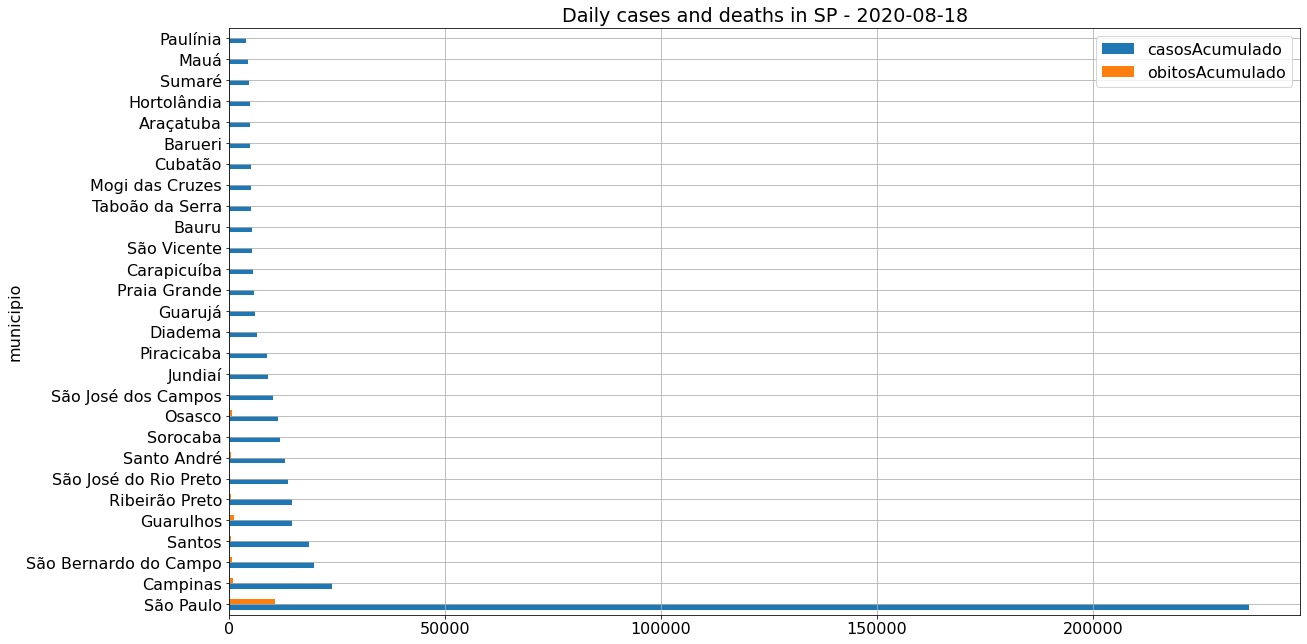

In [34]:
dfSP.plot.barh(x='municipio', y=['casosAcumulado','obitosAcumulado'], figsize=(19.20,10.80))
plt.title('Daily cases and deaths in SP - '+str(today))
plt.grid()

In [35]:
dfSP = dfSP.loc[:,['municipio','casosAcumulado','obitosAcumulado']]
dfSP = dfSP.set_index('municipio')
dfSP

casosAcumulado  obitosAcumulado
municipio                                             
São Paulo                      236163            10625
Campinas                        23825              882
São Bernardo do Campo           19628              711
Santos                          18420              533
Guarulhos                       14666             1149
...                               ...              ...
Araçatuba                        4872              106
Hortolândia                      4761               94
Sumaré                           4711              128
Mauá                             4349              250
Paulínia                         3868               58

[28 rows x 2 columns]

In [36]:
dfSP

casosAcumulado  obitosAcumulado
municipio                                             
São Paulo                      236163            10625
Campinas                        23825              882
São Bernardo do Campo           19628              711
Santos                          18420              533
Guarulhos                       14666             1149
...                               ...              ...
Araçatuba                        4872              106
Hortolândia                      4761               94
Sumaré                           4711              128
Mauá                             4349              250
Paulínia                         3868               58

[28 rows x 2 columns]

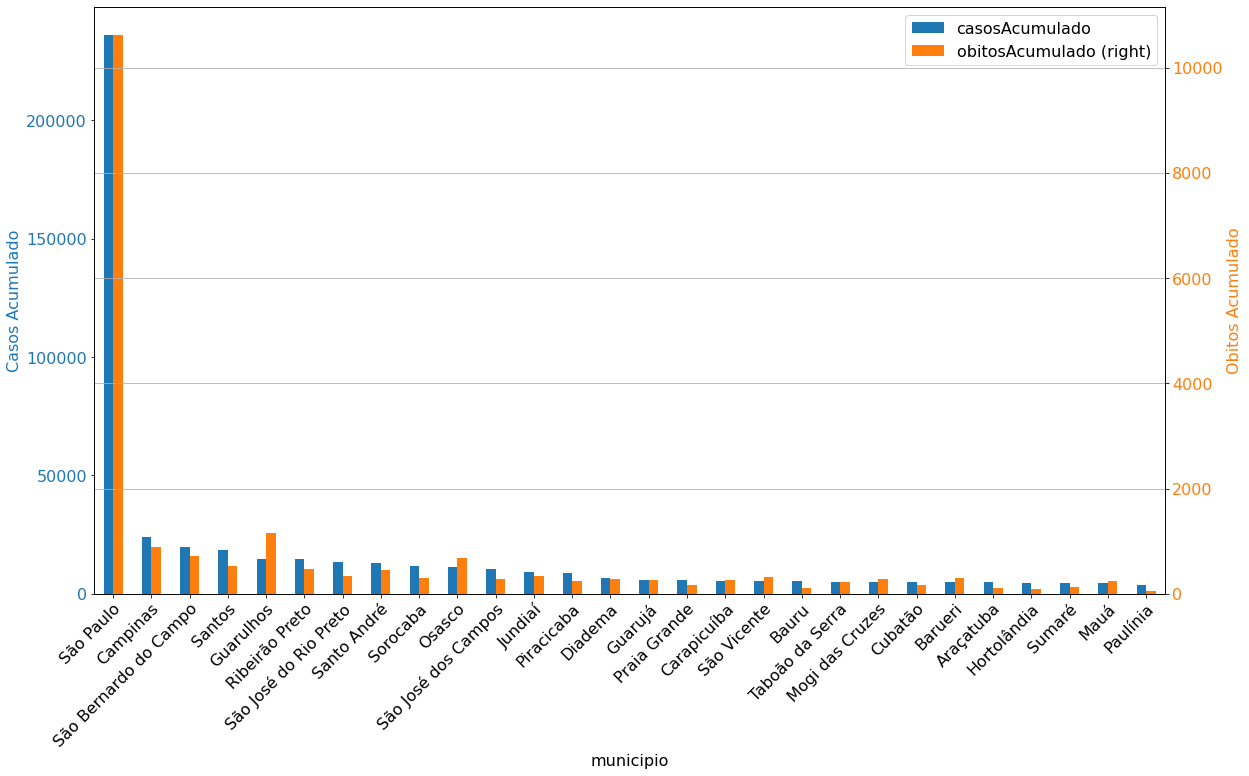

In [37]:
dfSP.plot.bar(figsize=(19.20,10.80), secondary_y= 'obitosAcumulado')

ax1, ax2 = plt.gcf().get_axes()
# ax1.tick_params(axis='x', labelrotation=55, ha='right')
# plt.xticks(rotation=15,ha='right')
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

color = 'tab:blue'
ax1.set_ylabel('Casos Acumulado', color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:orange'
ax2.set_ylabel('Obitos Acumulado', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# plt.title('Casos e obitos acumulados nos municipios de '+str(dfEstado[10]+' em '+str(today)))

plt.grid()
plt.show()

In [38]:
dfMSelect = dfMS.loc[:,['data','estado','municipio','casosNovos','obitosNovos']]
sumCases = dfMSelect.groupby(['estado']).sum()
sumCases.reset_index(level=0, inplace=True)
sumCases.loc[sumCases['casosNovos'] <= 120000, ['estado']] = 'Other_States'

In [39]:
sumCases = sumCases.groupby(['estado']).sum()
sumCases = sumCases.sort_values(by=['casosNovos'], ascending=False)
sumCases.reset_index(level=0, inplace=True)
sumCases

estado  casosNovos  obitosNovos
0  Other_States     1409945        38830
1            SP      702524        26899
2            BA      213564         4449
3            CE      196347         8163
4            RJ      194651        14566
5            PA      178375         5945
6            MG      175165         4180
7            DF      138735         2042
8            MA      137408         3277

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6beab9ac8>,
      dtype=object)

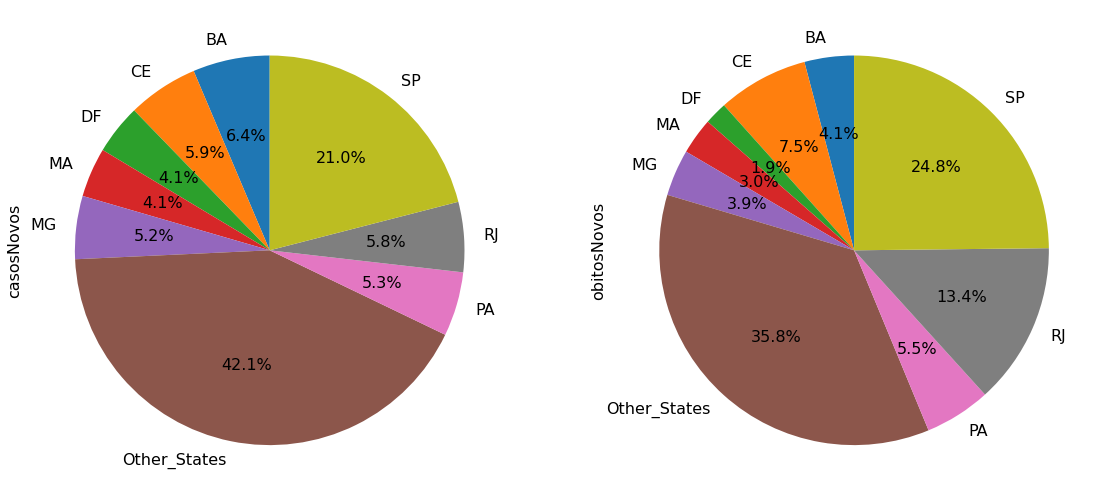

In [40]:
sumCases.groupby(['estado']).sum().plot(kind='pie', legend=None, subplots=True, startangle=90,
                                       figsize=(19.20,10.80), autopct='%1.1f%%')

In [41]:
# fig = plt.figure(figsize=(19.20,10.80)) # Create matplotlib figure
# ax = fig.add_subplot(111) # Create matplotlib axes



# width = 0.4
# dfSP.casosAcumulado.plot(kind='bar',color='red', ax=ax, width=width, position=1)
# ax.set_ylabel('Casos Acumulados')
# ax.set_xlabel('municipio')

# ax2 = ax.twinx() 


# dfSP.obitosAcumulado.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
# ax.set_ylabel('Obtidos Acumulados')

# ax2.set_ylabel('Price')

# plt.grid()
# plt.show()

In [42]:
# fig, ax1 = plt.subplots(figsize=(19.20,10.80))

# color = 'tab:blue'
# ax1.bar(dfSP.index, dfSP.casosAcumulado, color=color, label='Total Cases')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Total Cases', color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y')
# plt.grid()

# ax2 = ax1.twinx()

# color = 'tab:red'
# ax2.bar(dfSP.index, dfSP.obitosAcumulado, color=color, label = 'Total Deaths')
# ax2.set_xlabel('Date')
# ax2.set_ylabel('Total Deaths', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

# ax = plt.gca()
# # ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# # ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# # ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# plt.gcf().autofmt_xdate()

# fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

# plt.show()

In [25]:
# fig, ax1 = plt.subplots(figsize=(19.20,10.80))

# color = 'tab:blue'
# ax1.bar(dfSP.index, dfSP.casosAcumulado, color=color, label='Total Cases')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Total Cases', color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y')
# plt.grid()

# ax2 = ax1.twinx()

# color = 'tab:red'
# ax2.bar(dfSP.index, dfSP.obitosAcumulado, color=color, label = 'Total Deaths')
# ax2.set_xlabel('Date')
# ax2.set_ylabel('Total Deaths', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

# ax = plt.gca()
# # ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# # ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# # ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# plt.gcf().autofmt_xdate()

# fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

# plt.show()